In [1]:
import os
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from tqdm import tqdm

In [2]:
from code import model
from code.data import Dataset

In [3]:
root = os.getcwd()
batch = 8

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

# Model

In [4]:
encoder = model.Extractor(in_channels=1, out_channels=1)
decoder = model.Decoder(classes=1)


predictor = model.Model(encoder=encoder, decoder=decoder).to(device)
optimizer = torch.optim.Adam(predictor.parameters(), lr=1e-4)

In [5]:
dataset = Dataset(path=os.path.join(root, "training.csv"))

In [6]:
trainloader = DataLoader(dataset, batch_size=batch, shuffle=False, num_workers=2)

In [7]:
slot = 0
profit = 0

In [8]:
predictor.train()

for epoch in range(10000):

    epoch_loss = 0
    
    for index, data in tqdm(enumerate(trainloader)):

        optimizer.zero_grad()

        data, gt = data # batch, 100, 4
        gt = gt[:, :, 0].to(device, dtype=torch.float)

        data = torch.unsqueeze(data, 1) # batch, channels, 100, 4
        data = torch.transpose(data, 2, 3) # batch, channels, 4, 100

        data = data.to(device, dtype=torch.float)

        _, pr = predictor(data)

        loss = nn.MSELoss()(pr, gt)
        loss.backward()
        optimizer.step()
    
        epoch_loss += loss.item()
    
    print("\nEpoch: {}, mse= {:.3f}".format(epoch+1, epoch_loss))
    
    epoch_loss = 0

145it [00:09, 15.31it/s]


Epoch: 1, mse= 4425623.972



145it [00:09, 15.47it/s]


Epoch: 2, mse= 4420344.597



145it [00:09, 15.51it/s]


Epoch: 3, mse= 4409093.111



145it [00:09, 15.33it/s]


Epoch: 4, mse= 4397689.022



145it [00:09, 14.94it/s]


Epoch: 5, mse= 4388193.410



145it [00:09, 15.37it/s]


Epoch: 6, mse= 4378808.110



145it [00:09, 15.58it/s]


Epoch: 7, mse= 4369040.192



145it [00:11, 13.04it/s]


Epoch: 8, mse= 4358721.038



145it [00:10, 13.37it/s]


Epoch: 9, mse= 4347805.783



145it [00:09, 15.45it/s]


Epoch: 10, mse= 4336203.050



145it [00:09, 15.56it/s]


Epoch: 11, mse= 4323398.802



145it [00:09, 15.57it/s]


Epoch: 12, mse= 4310330.031



145it [00:10, 13.39it/s]


Epoch: 13, mse= 4297005.712



145it [00:10, 13.84it/s]


Epoch: 14, mse= 4283352.390



145it [00:10, 14.33it/s]


Epoch: 15, mse= 4269331.922



145it [00:09, 15.27it/s]


Epoch: 16, mse= 4254928.568



145it [00:10, 13.28it/s]


Epoch: 17, mse= 4240139.017



145it [00:10, 13.32it/s]


Epoch: 18, mse= 4224960.879



145it [00:09, 15.57it/s]


Epoch: 19, mse= 4209398.588



145it [00:09, 15.37it/s]


Epoch: 20, mse= 4193454.800



145it [00:09, 14.80it/s]


Epoch: 21, mse= 4177134.665



145it [00:10, 13.84it/s]


Epoch: 22, mse= 4160442.389



145it [00:10, 13.27it/s]


Epoch: 23, mse= 4143383.623



145it [00:10, 13.30it/s]


Epoch: 24, mse= 4125964.781



145it [00:09, 15.27it/s]


Epoch: 25, mse= 4108191.900



145it [00:09, 14.75it/s]


Epoch: 26, mse= 4090069.953



145it [00:11, 13.18it/s]


Epoch: 27, mse= 4071604.068



145it [00:10, 13.22it/s]


Epoch: 28, mse= 4052800.346



145it [00:10, 14.35it/s]


Epoch: 29, mse= 4033664.967



145it [00:09, 15.30it/s]


Epoch: 30, mse= 4014203.350



145it [00:09, 14.62it/s]


Epoch: 31, mse= 3994420.109



145it [00:10, 13.78it/s]


Epoch: 32, mse= 3974320.049



145it [00:09, 14.86it/s]


Epoch: 33, mse= 3953909.079



145it [00:09, 15.07it/s]


Epoch: 34, mse= 3933191.416



145it [00:09, 15.04it/s]


Epoch: 35, mse= 3912171.987



145it [00:09, 15.28it/s]


Epoch: 36, mse= 3890856.416



145it [00:10, 13.23it/s]


Epoch: 37, mse= 3869248.125



145it [00:09, 15.50it/s]


Epoch: 38, mse= 3847352.987



145it [00:09, 15.13it/s]


Epoch: 39, mse= 3825175.311



145it [00:10, 13.32it/s]


Epoch: 40, mse= 3802719.355



145it [00:11, 13.13it/s]


Epoch: 41, mse= 3779990.220



145it [00:10, 13.23it/s]


Epoch: 42, mse= 3756992.002



145it [00:09, 15.57it/s]


Epoch: 43, mse= 3733728.690



145it [00:09, 15.32it/s]


Epoch: 44, mse= 3710205.900



145it [00:11, 13.14it/s]


Epoch: 45, mse= 3686427.549



145it [00:10, 13.84it/s]


Epoch: 46, mse= 3662398.440



145it [00:10, 13.94it/s]


Epoch: 47, mse= 3638122.566



145it [00:11, 12.66it/s]


Epoch: 48, mse= 3613604.294



145it [00:11, 12.46it/s]



Epoch: 49, mse= 3588848.160


145it [00:09, 14.72it/s]


Epoch: 50, mse= 3563858.410



145it [00:09, 14.70it/s]


Epoch: 51, mse= 3538639.871



145it [00:09, 14.51it/s]


Epoch: 52, mse= 3513196.979



145it [00:09, 14.66it/s]


Epoch: 53, mse= 3487534.633



145it [00:09, 14.60it/s]


Epoch: 54, mse= 3461656.146



145it [00:09, 14.81it/s]


Epoch: 55, mse= 3435566.569



145it [00:09, 14.77it/s]


Epoch: 56, mse= 3409269.898



145it [00:09, 14.53it/s]


Epoch: 57, mse= 3382772.010



145it [00:10, 14.36it/s]


Epoch: 58, mse= 3356076.910



145it [00:09, 14.55it/s]


Epoch: 59, mse= 3329188.451



145it [00:08, 17.49it/s]


Epoch: 60, mse= 3302111.985



145it [00:10, 14.40it/s]


Epoch: 61, mse= 3274851.966



145it [00:09, 14.54it/s]


Epoch: 62, mse= 3247412.314



145it [00:11, 13.10it/s]


Epoch: 63, mse= 3219798.769



145it [00:10, 13.40it/s]


Epoch: 64, mse= 3192015.716



145it [00:09, 14.63it/s]


Epoch: 65, mse= 3164068.450



145it [00:09, 14.82it/s]


Epoch: 66, mse= 3135960.810



145it [00:09, 14.70it/s]


Epoch: 67, mse= 3107697.062



145it [00:11, 12.77it/s]


Epoch: 68, mse= 3079283.922



145it [00:11, 12.89it/s]


Epoch: 69, mse= 3050724.568



145it [00:09, 14.60it/s]


Epoch: 70, mse= 3022024.014



145it [00:11, 12.64it/s]


Epoch: 71, mse= 2993187.934



145it [00:11, 12.62it/s]


Epoch: 72, mse= 2964221.764



145it [00:11, 12.83it/s]


Epoch: 73, mse= 2935129.180



145it [00:11, 12.88it/s]


Epoch: 74, mse= 2905916.204



145it [00:11, 12.80it/s]


Epoch: 75, mse= 2876587.634



145it [00:10, 14.27it/s]


Epoch: 76, mse= 2847148.806



145it [00:09, 14.83it/s]


Epoch: 77, mse= 2817603.905



145it [00:11, 12.78it/s]


Epoch: 78, mse= 2787958.266



145it [00:11, 13.14it/s]


Epoch: 79, mse= 2758217.604



145it [00:11, 12.74it/s]


Epoch: 80, mse= 2728386.918



145it [00:11, 12.95it/s]


Epoch: 81, mse= 2698470.688



145it [00:09, 14.66it/s]


Epoch: 82, mse= 2668474.681



145it [00:09, 14.67it/s]


Epoch: 83, mse= 2638404.932



145it [00:10, 14.46it/s]


Epoch: 84, mse= 2608265.234



145it [00:09, 14.77it/s]


Epoch: 85, mse= 2578061.940



145it [00:09, 14.98it/s]


Epoch: 86, mse= 2547800.858



145it [00:09, 14.96it/s]


Epoch: 87, mse= 2517485.680



145it [00:10, 13.22it/s]


Epoch: 88, mse= 2487123.283



145it [00:09, 14.65it/s]


Epoch: 89, mse= 2456718.025



145it [00:10, 13.49it/s]


Epoch: 90, mse= 2426274.519



145it [00:10, 13.77it/s]


Epoch: 91, mse= 2395799.518



145it [00:09, 14.75it/s]


Epoch: 92, mse= 2365299.492



145it [00:09, 14.55it/s]


Epoch: 93, mse= 2334779.422



145it [00:09, 14.53it/s]


Epoch: 94, mse= 2304244.311



145it [00:09, 14.93it/s]


Epoch: 95, mse= 2273699.242



145it [00:11, 12.92it/s]


Epoch: 96, mse= 2243150.312



145it [00:09, 15.01it/s]


Epoch: 97, mse= 2212602.993



145it [00:09, 14.96it/s]


Epoch: 98, mse= 2182064.036



145it [00:11, 12.95it/s]


Epoch: 99, mse= 2151537.213



145it [00:09, 14.73it/s]


Epoch: 100, mse= 2121029.040



145it [00:10, 13.83it/s]


Epoch: 101, mse= 2090545.652



145it [00:09, 14.66it/s]


Epoch: 102, mse= 2060092.708



145it [00:09, 14.79it/s]


Epoch: 103, mse= 2029675.304



145it [00:09, 14.89it/s]


Epoch: 104, mse= 1999299.653



145it [00:09, 14.79it/s]


Epoch: 105, mse= 1968971.878



145it [00:09, 14.98it/s]


Epoch: 106, mse= 1938697.466



145it [00:09, 14.75it/s]


Epoch: 107, mse= 1908481.975



145it [00:11, 12.89it/s]


Epoch: 108, mse= 1878330.190



145it [00:11, 12.86it/s]


Epoch: 109, mse= 1848251.447



145it [00:11, 12.85it/s]


Epoch: 110, mse= 1818248.023



145it [00:10, 14.14it/s]


Epoch: 111, mse= 1788326.011



145it [00:09, 14.64it/s]


Epoch: 112, mse= 1758493.039



145it [00:09, 14.68it/s]


Epoch: 113, mse= 1728754.553



145it [00:11, 12.73it/s]


Epoch: 114, mse= 1699115.499



145it [00:11, 12.59it/s]


Epoch: 115, mse= 1669582.834



145it [00:10, 13.48it/s]


Epoch: 116, mse= 1640161.276



145it [00:11, 12.91it/s]


Epoch: 117, mse= 1610859.294



145it [00:10, 14.34it/s]


Epoch: 118, mse= 1581680.819



145it [00:09, 14.66it/s]


Epoch: 119, mse= 1552632.990



145it [00:09, 14.76it/s]


Epoch: 120, mse= 1523720.477



145it [00:09, 14.65it/s]


Epoch: 121, mse= 1494948.407



145it [00:11, 12.99it/s]


Epoch: 122, mse= 1466323.720



145it [00:11, 13.13it/s]


Epoch: 123, mse= 1437852.925



145it [00:10, 13.50it/s]


Epoch: 124, mse= 1409542.172



145it [00:10, 13.53it/s]


Epoch: 125, mse= 1381396.940



145it [00:10, 13.60it/s]


Epoch: 126, mse= 1353422.223



145it [00:09, 14.85it/s]


Epoch: 127, mse= 1325625.033



145it [00:10, 13.91it/s]


Epoch: 128, mse= 1298011.582



145it [00:10, 14.45it/s]


Epoch: 129, mse= 1270588.190



145it [00:09, 14.72it/s]


Epoch: 130, mse= 1243360.017



145it [00:10, 13.66it/s]


Epoch: 131, mse= 1216332.609



145it [00:09, 14.64it/s]


Epoch: 132, mse= 1189512.383



145it [00:10, 13.87it/s]


Epoch: 133, mse= 1162904.876



145it [00:10, 13.53it/s]


Epoch: 134, mse= 1136516.518



145it [00:09, 14.72it/s]


Epoch: 135, mse= 1110352.493



145it [00:09, 14.66it/s]


Epoch: 136, mse= 1084416.486



145it [00:10, 14.12it/s]


Epoch: 137, mse= 1058719.229



145it [00:10, 13.64it/s]


Epoch: 138, mse= 1033264.257



145it [00:10, 14.43it/s]


Epoch: 139, mse= 1008056.430



145it [00:11, 12.67it/s]


Epoch: 140, mse= 983104.112



145it [00:09, 14.77it/s]


Epoch: 141, mse= 958411.000



145it [00:10, 14.38it/s]


Epoch: 142, mse= 933983.712



145it [00:09, 14.55it/s]


Epoch: 143, mse= 909825.974



145it [00:09, 14.92it/s]


Epoch: 144, mse= 885944.318



145it [00:11, 12.70it/s]


Epoch: 145, mse= 862343.659



145it [00:09, 14.81it/s]


Epoch: 146, mse= 839028.722



145it [00:09, 14.88it/s]


Epoch: 147, mse= 816008.958



145it [00:09, 14.94it/s]


Epoch: 148, mse= 793286.884



145it [00:09, 14.91it/s]


Epoch: 149, mse= 770867.143



145it [00:09, 15.02it/s]


Epoch: 150, mse= 748757.918



145it [00:09, 15.12it/s]


Epoch: 151, mse= 726961.521



145it [00:09, 15.08it/s]


Epoch: 152, mse= 705483.212



145it [00:09, 14.94it/s]


Epoch: 153, mse= 684328.900



145it [00:11, 12.59it/s]


Epoch: 154, mse= 663504.632



145it [00:11, 12.81it/s]


Epoch: 155, mse= 643013.073



145it [00:11, 13.01it/s]


Epoch: 156, mse= 622860.608



145it [00:11, 12.93it/s]


Epoch: 157, mse= 603052.319



145it [00:11, 13.18it/s]


Epoch: 158, mse= 583590.649



145it [00:10, 13.20it/s]


Epoch: 159, mse= 564479.521



145it [00:11, 12.94it/s]


Epoch: 160, mse= 545725.172



145it [00:11, 12.74it/s]


Epoch: 161, mse= 527330.967



145it [00:11, 12.79it/s]


Epoch: 162, mse= 509301.480



145it [00:11, 12.72it/s]



Epoch: 163, mse= 491640.626


145it [00:11, 12.86it/s]


Epoch: 164, mse= 474351.526



145it [00:09, 14.72it/s]


Epoch: 165, mse= 457437.829



145it [00:10, 14.19it/s]


Epoch: 166, mse= 440904.120



145it [00:09, 14.84it/s]


Epoch: 167, mse= 424750.493



145it [00:09, 14.78it/s]


Epoch: 168, mse= 408981.842



145it [00:09, 14.56it/s]


Epoch: 169, mse= 393602.522



145it [00:11, 12.92it/s]


Epoch: 170, mse= 378612.375



145it [00:11, 13.14it/s]


Epoch: 171, mse= 364015.122



145it [00:09, 14.73it/s]


Epoch: 172, mse= 349812.312



145it [00:09, 14.62it/s]


Epoch: 173, mse= 336007.172



145it [00:09, 14.88it/s]


Epoch: 174, mse= 322598.327



145it [00:09, 14.78it/s]


Epoch: 175, mse= 309589.197



145it [00:10, 13.41it/s]


Epoch: 176, mse= 296979.692



145it [00:11, 12.90it/s]


Epoch: 177, mse= 284769.987



145it [00:10, 14.03it/s]


Epoch: 178, mse= 272960.561



145it [00:09, 14.93it/s]


Epoch: 179, mse= 261552.289



145it [00:09, 14.86it/s]


Epoch: 180, mse= 250542.894



145it [00:09, 14.65it/s]


Epoch: 181, mse= 239933.137



145it [00:10, 13.81it/s]


Epoch: 182, mse= 229720.797



145it [00:10, 13.98it/s]


Epoch: 183, mse= 219904.661



145it [00:10, 13.25it/s]


Epoch: 184, mse= 210482.135



145it [00:11, 13.16it/s]


Epoch: 185, mse= 201449.955



145it [00:09, 14.76it/s]


Epoch: 186, mse= 192804.802



145it [00:09, 14.83it/s]


Epoch: 187, mse= 184543.136



145it [00:09, 14.55it/s]


Epoch: 188, mse= 176661.923



145it [00:11, 12.88it/s]


Epoch: 189, mse= 169155.787



145it [00:10, 13.57it/s]


Epoch: 190, mse= 162019.040



145it [00:10, 14.26it/s]


Epoch: 191, mse= 155245.814



145it [00:10, 13.98it/s]


Epoch: 192, mse= 148829.709



145it [00:11, 12.86it/s]


Epoch: 193, mse= 142763.287



145it [00:10, 13.81it/s]


Epoch: 194, mse= 137039.398



145it [00:10, 14.15it/s]


Epoch: 195, mse= 131650.539



145it [00:11, 13.05it/s]


Epoch: 196, mse= 126586.678



145it [00:09, 14.86it/s]


Epoch: 197, mse= 121838.950



145it [00:09, 14.82it/s]


Epoch: 198, mse= 117398.512



145it [00:11, 12.80it/s]


Epoch: 199, mse= 113254.054



145it [00:10, 13.46it/s]


Epoch: 200, mse= 109396.354



145it [00:11, 12.65it/s]


Epoch: 201, mse= 105813.144



145it [00:09, 14.81it/s]


Epoch: 202, mse= 102493.670



145it [00:11, 12.71it/s]


Epoch: 203, mse= 99425.481



145it [00:09, 14.71it/s]


Epoch: 204, mse= 96597.404



145it [00:11, 12.89it/s]


Epoch: 205, mse= 93997.443



145it [00:09, 14.52it/s]


Epoch: 206, mse= 91612.759



145it [00:09, 14.59it/s]


Epoch: 207, mse= 89431.259



145it [00:09, 14.58it/s]


Epoch: 208, mse= 87440.592



145it [00:09, 14.75it/s]


Epoch: 209, mse= 85628.330



145it [00:09, 14.75it/s]


Epoch: 210, mse= 83983.299



145it [00:10, 14.32it/s]


Epoch: 211, mse= 82492.904



145it [00:09, 14.72it/s]


Epoch: 212, mse= 81146.442



145it [00:09, 14.52it/s]


Epoch: 213, mse= 79932.336



145it [00:09, 14.58it/s]


Epoch: 214, mse= 78840.114



145it [00:11, 12.61it/s]


Epoch: 215, mse= 77859.749



145it [00:10, 13.40it/s]


Epoch: 216, mse= 76982.065



145it [00:09, 14.88it/s]


Epoch: 217, mse= 76197.070



145it [00:07, 18.88it/s]


Epoch: 218, mse= 75496.589



145it [00:07, 18.89it/s]


Epoch: 219, mse= 74872.509



145it [00:07, 19.01it/s]


Epoch: 220, mse= 74317.089



145it [00:09, 14.76it/s]


Epoch: 221, mse= 73824.032



145it [00:11, 12.86it/s]


Epoch: 222, mse= 73386.308



145it [00:11, 12.78it/s]


Epoch: 223, mse= 72998.758



145it [00:10, 13.25it/s]


Epoch: 224, mse= 72655.890



145it [00:10, 14.14it/s]


Epoch: 225, mse= 72352.794



145it [00:09, 14.63it/s]


Epoch: 226, mse= 72084.888



145it [00:09, 14.55it/s]


Epoch: 227, mse= 71848.266



145it [00:09, 14.73it/s]


Epoch: 228, mse= 71639.511



145it [00:09, 14.69it/s]


Epoch: 229, mse= 71455.368



145it [00:09, 14.66it/s]


Epoch: 230, mse= 71292.996



145it [00:09, 14.77it/s]


Epoch: 231, mse= 71149.906



145it [00:09, 14.78it/s]


Epoch: 232, mse= 71023.996



145it [00:10, 13.28it/s]


Epoch: 233, mse= 70912.583



145it [00:09, 14.90it/s]


Epoch: 234, mse= 70814.733



145it [00:09, 14.67it/s]


Epoch: 235, mse= 70728.442



145it [00:10, 13.35it/s]


Epoch: 236, mse= 70652.508



145it [00:11, 12.69it/s]


Epoch: 237, mse= 70585.236



145it [00:09, 14.68it/s]


Epoch: 238, mse= 70526.124



145it [00:11, 13.17it/s]


Epoch: 239, mse= 70473.821



145it [00:10, 13.61it/s]


Epoch: 240, mse= 70427.532



145it [00:10, 13.60it/s]


Epoch: 241, mse= 70386.895



145it [00:10, 13.64it/s]


Epoch: 242, mse= 70350.695



145it [00:10, 13.53it/s]


Epoch: 243, mse= 70318.599



145it [00:10, 13.70it/s]


Epoch: 244, mse= 70290.328



145it [00:10, 13.78it/s]


Epoch: 245, mse= 70265.342



145it [00:10, 13.63it/s]


Epoch: 246, mse= 70242.814



145it [00:10, 13.67it/s]


Epoch: 247, mse= 70222.832



145it [00:10, 13.59it/s]


Epoch: 248, mse= 70205.108



145it [00:10, 13.64it/s]


Epoch: 249, mse= 70189.430



145it [00:10, 13.57it/s]


Epoch: 250, mse= 70175.791



145it [00:10, 13.55it/s]


Epoch: 251, mse= 70163.268



145it [00:10, 14.31it/s]


Epoch: 252, mse= 70151.885



145it [00:10, 14.47it/s]


Epoch: 253, mse= 70142.128



145it [00:09, 14.67it/s]


Epoch: 254, mse= 70133.171



145it [00:10, 14.08it/s]


Epoch: 255, mse= 70124.787



145it [00:09, 14.68it/s]


Epoch: 256, mse= 70117.960



145it [00:10, 13.20it/s]


Epoch: 257, mse= 70110.975



145it [00:10, 13.33it/s]


Epoch: 258, mse= 70105.549



145it [00:09, 14.78it/s]


Epoch: 259, mse= 70099.892



145it [00:11, 12.67it/s]



Epoch: 260, mse= 70095.567


145it [00:09, 14.67it/s]


Epoch: 261, mse= 70091.273



145it [00:09, 14.85it/s]


Epoch: 262, mse= 70087.201



145it [00:09, 14.79it/s]


Epoch: 263, mse= 70083.710



145it [00:09, 14.57it/s]


Epoch: 264, mse= 70080.594



145it [00:09, 14.72it/s]


Epoch: 265, mse= 70077.526



145it [00:09, 14.76it/s]


Epoch: 266, mse= 70075.089



145it [00:09, 14.83it/s]


Epoch: 267, mse= 70072.808



145it [00:09, 14.85it/s]


Epoch: 268, mse= 70070.324



145it [00:07, 19.11it/s]


Epoch: 269, mse= 70067.884



145it [00:07, 18.96it/s]


Epoch: 270, mse= 70069.713



145it [00:09, 14.79it/s]


Epoch: 271, mse= 70064.712



145it [00:09, 14.90it/s]


Epoch: 272, mse= 70063.140



145it [00:09, 14.74it/s]


Epoch: 273, mse= 70057.483



145it [00:09, 14.77it/s]


Epoch: 274, mse= 70078.974



145it [00:11, 12.93it/s]


Epoch: 275, mse= 70057.250



145it [00:10, 14.49it/s]


Epoch: 276, mse= 70056.747



145it [00:10, 14.39it/s]


Epoch: 277, mse= 70046.073



145it [00:10, 14.44it/s]


Epoch: 278, mse= 70048.081



145it [00:09, 14.63it/s]


Epoch: 279, mse= 70001.943



145it [00:09, 14.65it/s]


Epoch: 280, mse= 69973.319



145it [00:11, 12.87it/s]


Epoch: 281, mse= 69843.072



145it [00:11, 12.91it/s]


Epoch: 282, mse= 69473.454



145it [00:09, 14.70it/s]


Epoch: 283, mse= 69583.408



145it [00:09, 14.79it/s]


Epoch: 284, mse= 68926.617



145it [00:10, 13.98it/s]


Epoch: 285, mse= 68605.125



145it [00:10, 13.77it/s]


Epoch: 286, mse= 68054.310



145it [00:11, 12.76it/s]



Epoch: 287, mse= 67519.104


145it [00:10, 14.43it/s]


Epoch: 288, mse= 67002.515



145it [00:09, 14.78it/s]


Epoch: 289, mse= 66564.533



145it [00:09, 14.69it/s]


Epoch: 290, mse= 66196.215



145it [00:10, 14.45it/s]


Epoch: 291, mse= 65873.640



145it [00:11, 12.89it/s]


Epoch: 292, mse= 65596.462



145it [00:09, 14.51it/s]


Epoch: 293, mse= 65359.973



145it [00:11, 12.84it/s]


Epoch: 294, mse= 65159.406



145it [00:11, 13.01it/s]


Epoch: 295, mse= 64981.875



145it [00:09, 14.59it/s]


Epoch: 296, mse= 64824.166



145it [00:09, 14.72it/s]


Epoch: 297, mse= 64684.534



145it [00:11, 12.85it/s]


Epoch: 298, mse= 64559.802



145it [00:11, 12.91it/s]


Epoch: 299, mse= 64521.941



145it [00:09, 14.54it/s]


Epoch: 300, mse= 64357.914



145it [00:10, 14.34it/s]


Epoch: 301, mse= 64260.544



145it [00:09, 14.75it/s]


Epoch: 302, mse= 64169.651



145it [00:11, 12.83it/s]


Epoch: 303, mse= 64087.983



145it [00:10, 14.23it/s]


Epoch: 304, mse= 64006.770



145it [00:09, 14.75it/s]


Epoch: 305, mse= 63936.954



145it [00:09, 14.64it/s]


Epoch: 306, mse= 63864.024



145it [00:09, 14.70it/s]


Epoch: 307, mse= 63797.259



145it [00:09, 14.58it/s]


Epoch: 308, mse= 63732.047



145it [00:11, 12.86it/s]



Epoch: 309, mse= 63670.789


145it [00:11, 12.98it/s]


Epoch: 310, mse= 63610.637



145it [00:10, 14.13it/s]


Epoch: 311, mse= 63556.539



145it [00:10, 14.40it/s]


Epoch: 312, mse= 63496.924



145it [00:09, 14.67it/s]


Epoch: 313, mse= 63445.583



145it [00:09, 14.70it/s]


Epoch: 314, mse= 63387.704



145it [00:09, 14.81it/s]


Epoch: 315, mse= 63332.031



145it [00:10, 14.39it/s]


Epoch: 316, mse= 63276.969



145it [00:10, 13.69it/s]


Epoch: 317, mse= 63220.041



145it [00:10, 13.58it/s]


Epoch: 318, mse= 63162.695



145it [00:10, 13.54it/s]


Epoch: 319, mse= 63104.520



145it [00:10, 13.94it/s]


Epoch: 320, mse= 63045.119



145it [00:10, 14.14it/s]


Epoch: 321, mse= 62982.299



145it [00:09, 14.78it/s]


Epoch: 322, mse= 62913.783



145it [00:09, 14.90it/s]


Epoch: 323, mse= 62845.658



145it [00:10, 13.72it/s]


Epoch: 324, mse= 62776.504



145it [00:09, 14.53it/s]


Epoch: 325, mse= 62691.492



145it [00:09, 14.73it/s]


Epoch: 326, mse= 62603.822



145it [00:09, 14.69it/s]


Epoch: 327, mse= 62511.331



145it [00:11, 12.64it/s]


Epoch: 328, mse= 62403.562



145it [00:11, 12.74it/s]


Epoch: 329, mse= 62312.393



145it [00:11, 12.54it/s]


Epoch: 330, mse= 62243.337



145it [00:10, 13.64it/s]


Epoch: 331, mse= 62205.600



145it [00:11, 12.86it/s]


Epoch: 332, mse= 62172.470



145it [00:11, 12.83it/s]


Epoch: 333, mse= 62105.250



145it [00:10, 14.24it/s]


Epoch: 334, mse= 62025.931



145it [00:09, 14.90it/s]


Epoch: 335, mse= 61949.092



145it [00:10, 13.58it/s]


Epoch: 336, mse= 61876.658



145it [00:11, 12.87it/s]


Epoch: 337, mse= 61807.977



145it [00:11, 12.67it/s]



Epoch: 338, mse= 61742.172


145it [00:09, 14.64it/s]


Epoch: 339, mse= 61681.125



145it [00:10, 14.35it/s]


Epoch: 340, mse= 61625.182



145it [00:09, 14.75it/s]


Epoch: 341, mse= 61567.209



145it [00:10, 14.05it/s]


Epoch: 342, mse= 61509.853



145it [00:09, 14.71it/s]


Epoch: 343, mse= 61456.800



145it [00:09, 14.84it/s]


Epoch: 344, mse= 61399.899



145it [00:11, 12.73it/s]


Epoch: 345, mse= 61348.258



145it [00:11, 12.89it/s]


Epoch: 346, mse= 61285.062



145it [00:11, 13.14it/s]


Epoch: 347, mse= 61219.276



145it [00:08, 16.85it/s]


Epoch: 348, mse= 61153.038



145it [00:10, 14.38it/s]


Epoch: 349, mse= 61093.190



145it [00:10, 14.30it/s]


Epoch: 350, mse= 61034.597



145it [00:10, 14.02it/s]


Epoch: 351, mse= 60975.573



145it [00:10, 13.71it/s]


Epoch: 352, mse= 60918.014



145it [00:10, 14.31it/s]


Epoch: 353, mse= 60861.401



145it [00:10, 14.34it/s]


Epoch: 354, mse= 60804.280



145it [00:10, 13.76it/s]


Epoch: 355, mse= 60745.057



145it [00:11, 12.65it/s]


Epoch: 356, mse= 60690.942



145it [00:10, 14.25it/s]


Epoch: 357, mse= 60635.723



145it [00:10, 14.36it/s]


Epoch: 358, mse= 60578.739



145it [00:11, 12.53it/s]


Epoch: 359, mse= 60521.128



145it [00:11, 12.36it/s]


Epoch: 360, mse= 60465.154



145it [00:11, 12.45it/s]


Epoch: 361, mse= 60410.609



145it [00:11, 12.53it/s]



Epoch: 362, mse= 60355.181


145it [00:11, 12.50it/s]


Epoch: 363, mse= 60299.369



145it [00:10, 14.27it/s]


Epoch: 364, mse= 60242.506



145it [00:10, 14.37it/s]


Epoch: 365, mse= 60185.261



145it [00:10, 14.48it/s]


Epoch: 366, mse= 60128.107



145it [00:11, 12.56it/s]


Epoch: 367, mse= 60074.864



145it [00:11, 12.74it/s]


Epoch: 368, mse= 60019.520



145it [00:10, 14.41it/s]


Epoch: 369, mse= 59968.491



145it [00:10, 14.37it/s]


Epoch: 370, mse= 59908.319



145it [00:10, 13.69it/s]


Epoch: 371, mse= 59841.930



145it [00:10, 13.69it/s]


Epoch: 372, mse= 59783.673



145it [00:10, 14.07it/s]


Epoch: 373, mse= 59719.636



145it [00:11, 12.90it/s]


Epoch: 374, mse= 59646.285



145it [00:10, 13.85it/s]


Epoch: 375, mse= 59533.452



145it [00:10, 14.38it/s]


Epoch: 376, mse= 59454.251



145it [00:10, 14.17it/s]


Epoch: 377, mse= 59393.966



145it [00:10, 13.76it/s]


Epoch: 378, mse= 59281.036



145it [00:10, 14.06it/s]


Epoch: 379, mse= 59174.387



145it [00:10, 14.08it/s]


Epoch: 380, mse= 59093.663



145it [00:11, 12.43it/s]


Epoch: 381, mse= 59003.956



145it [00:10, 14.32it/s]


Epoch: 382, mse= 58925.608



145it [00:10, 14.17it/s]


Epoch: 383, mse= 58862.070



145it [00:11, 12.51it/s]


Epoch: 384, mse= 58863.635



145it [00:10, 13.56it/s]


Epoch: 385, mse= 58696.579



145it [00:11, 12.44it/s]


Epoch: 386, mse= 58750.047



145it [00:10, 14.35it/s]


Epoch: 387, mse= 58446.196



145it [00:11, 12.49it/s]


Epoch: 388, mse= 58298.448



145it [00:11, 12.61it/s]


Epoch: 389, mse= 58136.105



145it [00:10, 14.07it/s]


Epoch: 390, mse= 57986.278



145it [00:10, 13.91it/s]


Epoch: 391, mse= 57855.512



145it [00:11, 12.45it/s]


Epoch: 392, mse= 57735.828



145it [00:11, 12.44it/s]


Epoch: 393, mse= 57629.667



145it [00:11, 13.15it/s]


Epoch: 394, mse= 57529.740



145it [00:10, 14.21it/s]


Epoch: 395, mse= 57479.447



145it [00:10, 14.28it/s]


Epoch: 396, mse= 57350.088



145it [00:10, 14.33it/s]


Epoch: 397, mse= 57276.262



145it [00:10, 14.44it/s]


Epoch: 398, mse= 57204.061



145it [00:11, 12.60it/s]


Epoch: 399, mse= 57107.180



145it [00:09, 14.59it/s]


Epoch: 400, mse= 57029.162



145it [00:11, 12.44it/s]


Epoch: 401, mse= 56976.207



145it [00:10, 14.43it/s]


Epoch: 402, mse= 62150.409



145it [00:10, 14.24it/s]


Epoch: 403, mse= 57459.516



145it [00:10, 14.31it/s]


Epoch: 404, mse= 56550.079



145it [00:10, 14.23it/s]


Epoch: 405, mse= 56509.562



145it [00:11, 12.49it/s]


Epoch: 406, mse= 56416.986



145it [00:10, 14.01it/s]


Epoch: 407, mse= 56256.457



145it [00:10, 14.45it/s]


Epoch: 408, mse= 56238.829



145it [00:10, 14.39it/s]


Epoch: 409, mse= 56950.179



145it [00:10, 14.24it/s]


Epoch: 410, mse= 56262.245



145it [00:10, 14.35it/s]


Epoch: 411, mse= 56168.012



145it [00:10, 14.20it/s]


Epoch: 412, mse= 56108.587



145it [00:10, 14.30it/s]


Epoch: 413, mse= 56035.183



145it [00:10, 14.36it/s]


Epoch: 414, mse= 55935.712



145it [00:10, 14.32it/s]


Epoch: 415, mse= 55825.474



145it [00:10, 14.45it/s]


Epoch: 416, mse= 55738.529



145it [00:11, 12.53it/s]


Epoch: 417, mse= 55660.929



145it [00:11, 12.54it/s]


Epoch: 418, mse= 55576.513



145it [00:11, 12.68it/s]


Epoch: 419, mse= 55485.318



145it [00:11, 12.49it/s]


Epoch: 420, mse= 55398.941



145it [00:11, 12.26it/s]


Epoch: 421, mse= 55350.329



145it [00:10, 14.36it/s]


Epoch: 422, mse= 55309.609



145it [00:10, 13.56it/s]


Epoch: 423, mse= 55398.123



145it [00:10, 14.18it/s]


Epoch: 424, mse= 55698.675



145it [00:11, 12.51it/s]


Epoch: 425, mse= 55232.687



145it [00:11, 12.45it/s]


Epoch: 426, mse= 55098.924



145it [00:09, 15.72it/s]


Epoch: 427, mse= 54906.255



145it [00:11, 13.12it/s]


Epoch: 428, mse= 54817.471



145it [00:10, 14.36it/s]


Epoch: 429, mse= 55151.921



145it [00:10, 14.15it/s]


Epoch: 430, mse= 54834.196



145it [00:10, 14.37it/s]


Epoch: 431, mse= 54579.747



145it [00:11, 12.48it/s]


Epoch: 432, mse= 54393.067



145it [00:10, 13.98it/s]


Epoch: 433, mse= 54284.454



145it [00:10, 14.24it/s]


Epoch: 434, mse= 54635.900



145it [00:11, 12.40it/s]



Epoch: 435, mse= 54721.729


145it [00:10, 14.27it/s]


Epoch: 436, mse= 54897.469



145it [00:11, 13.11it/s]


Epoch: 437, mse= 55621.419



145it [00:10, 14.45it/s]


Epoch: 438, mse= 52918.160



145it [00:10, 14.29it/s]


Epoch: 439, mse= 53756.373



145it [00:10, 14.45it/s]


Epoch: 440, mse= 52876.968



145it [00:11, 12.50it/s]


Epoch: 441, mse= 53129.974



145it [00:10, 13.75it/s]


Epoch: 442, mse= 53694.059



145it [00:10, 13.56it/s]


Epoch: 443, mse= 53594.651



145it [00:10, 14.30it/s]


Epoch: 444, mse= 52677.332



145it [00:10, 14.25it/s]


Epoch: 445, mse= 52694.776



145it [00:10, 13.82it/s]


Epoch: 446, mse= 52497.639



145it [00:10, 14.35it/s]


Epoch: 447, mse= 52421.002



145it [00:10, 13.94it/s]


Epoch: 448, mse= 52208.065



145it [00:10, 14.44it/s]


Epoch: 449, mse= 52233.768



145it [00:11, 12.63it/s]


Epoch: 450, mse= 51790.986



145it [00:10, 14.36it/s]


Epoch: 451, mse= 51843.877



145it [00:11, 12.69it/s]


Epoch: 452, mse= 51624.663



145it [00:11, 13.05it/s]


Epoch: 453, mse= 51430.489



145it [00:11, 12.64it/s]


Epoch: 454, mse= 53113.242



145it [00:10, 13.55it/s]


Epoch: 455, mse= 53043.596



145it [00:10, 14.49it/s]


Epoch: 456, mse= 50843.735



145it [00:10, 14.34it/s]


Epoch: 457, mse= 50816.865



145it [00:10, 14.26it/s]


Epoch: 458, mse= 50759.306



145it [00:10, 14.45it/s]


Epoch: 459, mse= 50775.508



145it [00:10, 14.13it/s]


Epoch: 460, mse= 50922.163



145it [00:11, 13.07it/s]


Epoch: 461, mse= 50726.072



145it [00:10, 13.69it/s]


Epoch: 462, mse= 50443.154



145it [00:10, 14.31it/s]


Epoch: 463, mse= 50330.875



145it [00:10, 14.11it/s]


Epoch: 464, mse= 50252.832



145it [00:10, 14.23it/s]


Epoch: 465, mse= 50276.610



145it [00:10, 14.12it/s]


Epoch: 466, mse= 50343.061



145it [00:10, 14.24it/s]


Epoch: 467, mse= 50630.688



145it [00:10, 13.76it/s]


Epoch: 468, mse= 50747.678



145it [00:11, 12.53it/s]


Epoch: 469, mse= 51624.655



145it [00:10, 14.30it/s]


Epoch: 470, mse= 51917.246



145it [00:10, 14.30it/s]


Epoch: 471, mse= 50209.408



145it [00:10, 14.43it/s]


Epoch: 472, mse= 50085.463



145it [00:11, 12.72it/s]


Epoch: 473, mse= 49436.954



145it [00:10, 14.26it/s]


Epoch: 474, mse= 49186.413



145it [00:10, 14.29it/s]


Epoch: 475, mse= 49068.625



145it [00:10, 14.10it/s]


Epoch: 476, mse= 48950.813



145it [00:11, 12.52it/s]


Epoch: 477, mse= 48846.174



145it [00:10, 14.30it/s]


Epoch: 478, mse= 48755.341



145it [00:11, 12.48it/s]


Epoch: 479, mse= 48690.445



145it [00:11, 12.55it/s]


Epoch: 480, mse= 48657.389



145it [00:11, 12.31it/s]


Epoch: 481, mse= 48650.707



145it [00:10, 13.21it/s]


Epoch: 482, mse= 48797.487



145it [00:10, 14.27it/s]


Epoch: 483, mse= 48244.806



145it [00:10, 14.00it/s]


Epoch: 484, mse= 48607.149



145it [00:10, 14.13it/s]


Epoch: 485, mse= 48030.446



145it [00:10, 14.34it/s]


Epoch: 486, mse= 50129.633



145it [00:10, 14.20it/s]


Epoch: 487, mse= 50945.399



145it [00:10, 14.37it/s]


Epoch: 488, mse= 48935.448



145it [00:10, 14.18it/s]


Epoch: 489, mse= 49426.537



145it [00:10, 14.32it/s]


Epoch: 490, mse= 50392.396



145it [00:10, 14.17it/s]


Epoch: 491, mse= 48785.057



145it [00:09, 14.78it/s]


Epoch: 492, mse= 47690.252



145it [00:09, 14.74it/s]


Epoch: 493, mse= 47425.070



145it [00:09, 14.86it/s]


Epoch: 494, mse= 47780.374



145it [00:09, 14.80it/s]


Epoch: 495, mse= 47805.161



145it [00:09, 14.79it/s]


Epoch: 496, mse= 47584.240



145it [00:09, 14.97it/s]


Epoch: 497, mse= 47226.160



145it [00:10, 14.47it/s]


Epoch: 498, mse= 46866.626



145it [00:09, 14.52it/s]


Epoch: 499, mse= 46845.264



145it [00:09, 15.00it/s]


Epoch: 500, mse= 46273.667



145it [00:09, 14.69it/s]


Epoch: 501, mse= 46855.518



145it [00:09, 14.76it/s]


Epoch: 502, mse= 47109.270



145it [00:09, 14.72it/s]


Epoch: 503, mse= 46576.546



145it [00:09, 14.64it/s]


Epoch: 504, mse= 46148.044



145it [00:10, 13.90it/s]


Epoch: 505, mse= 47693.849



145it [00:11, 12.68it/s]


Epoch: 506, mse= 47566.298



145it [00:09, 14.83it/s]


Epoch: 507, mse= 46295.478



145it [00:09, 14.84it/s]


Epoch: 508, mse= 49987.209



145it [00:11, 12.86it/s]



Epoch: 509, mse= 46472.630


145it [00:09, 14.73it/s]


Epoch: 510, mse= 46179.020



145it [00:09, 14.62it/s]


Epoch: 511, mse= 46179.003



145it [00:09, 14.92it/s]


Epoch: 512, mse= 45527.583



145it [00:11, 12.97it/s]



Epoch: 513, mse= 46529.547


145it [00:11, 13.14it/s]


Epoch: 514, mse= 45137.009



145it [00:10, 14.17it/s]


Epoch: 515, mse= 45325.635



145it [00:11, 12.62it/s]


Epoch: 516, mse= 45573.393



145it [00:10, 13.71it/s]


Epoch: 517, mse= 45011.986



145it [00:11, 13.04it/s]


Epoch: 518, mse= 46102.206



145it [00:11, 12.92it/s]



Epoch: 519, mse= 44872.561


145it [00:10, 14.22it/s]


Epoch: 520, mse= 45292.044



145it [00:09, 15.09it/s]


Epoch: 521, mse= 46936.704



145it [00:09, 14.95it/s]


Epoch: 522, mse= 48783.573



145it [00:10, 14.48it/s]


Epoch: 523, mse= 50547.473



145it [00:11, 12.84it/s]


Epoch: 524, mse= 50783.082



145it [00:10, 14.36it/s]


Epoch: 525, mse= 47387.083



145it [00:11, 13.12it/s]


Epoch: 526, mse= 46894.899



145it [00:11, 13.00it/s]


Epoch: 527, mse= 47448.497



145it [00:11, 13.03it/s]


Epoch: 528, mse= 45957.011



145it [00:11, 13.02it/s]


Epoch: 529, mse= 45055.734



145it [00:10, 13.54it/s]


Epoch: 530, mse= 45146.397



145it [00:09, 14.53it/s]


Epoch: 531, mse= 44794.829



145it [00:09, 14.68it/s]


Epoch: 532, mse= 44782.036



145it [00:10, 14.42it/s]


Epoch: 533, mse= 44418.276



145it [00:09, 14.63it/s]


Epoch: 534, mse= 44228.285



145it [00:11, 12.83it/s]


Epoch: 535, mse= 44056.003



145it [00:11, 12.89it/s]


Epoch: 536, mse= 43770.820



145it [00:11, 12.91it/s]


Epoch: 537, mse= 43783.377



145it [00:09, 14.62it/s]


Epoch: 538, mse= 43951.227



145it [00:10, 14.12it/s]


Epoch: 539, mse= 43671.810



145it [00:10, 13.33it/s]


Epoch: 540, mse= 44932.628



145it [00:09, 14.62it/s]


Epoch: 541, mse= 43800.765



145it [00:10, 14.05it/s]


Epoch: 542, mse= 43405.294



145it [00:11, 13.04it/s]


Epoch: 543, mse= 45235.432



145it [00:11, 12.97it/s]



Epoch: 544, mse= 46818.891


145it [00:11, 12.84it/s]


Epoch: 545, mse= 44748.400



145it [00:09, 14.78it/s]


Epoch: 546, mse= 45617.522



145it [00:09, 14.57it/s]


Epoch: 547, mse= 43148.529



145it [00:09, 14.62it/s]


Epoch: 548, mse= 43033.085



145it [00:09, 14.84it/s]


Epoch: 549, mse= 42867.330



145it [00:09, 14.82it/s]


Epoch: 550, mse= 42964.853



145it [00:09, 14.64it/s]


Epoch: 551, mse= 42852.736



145it [00:09, 15.08it/s]


Epoch: 552, mse= 42880.541



145it [00:10, 14.32it/s]


Epoch: 553, mse= 42866.996



145it [00:11, 12.86it/s]


Epoch: 554, mse= 43016.806



145it [00:10, 14.05it/s]


Epoch: 555, mse= 43041.706



145it [00:09, 14.53it/s]


Epoch: 556, mse= 43038.351



145it [00:09, 14.66it/s]


Epoch: 557, mse= 43325.666



145it [00:10, 14.34it/s]


Epoch: 558, mse= 43079.277



145it [00:11, 12.83it/s]


Epoch: 559, mse= 42785.632



145it [00:09, 14.62it/s]


Epoch: 560, mse= 43051.130



145it [00:09, 14.77it/s]


Epoch: 561, mse= 42449.054



145it [00:09, 14.71it/s]


Epoch: 562, mse= 42403.348



145it [00:09, 14.90it/s]


Epoch: 563, mse= 42352.468



145it [00:10, 14.43it/s]


Epoch: 564, mse= 43166.791



145it [00:09, 14.60it/s]


Epoch: 565, mse= 43202.968



145it [00:09, 14.88it/s]


Epoch: 566, mse= 43469.585



145it [00:09, 14.69it/s]


Epoch: 567, mse= 41995.228



145it [00:09, 14.75it/s]


Epoch: 568, mse= 42312.247



145it [00:09, 14.54it/s]


Epoch: 569, mse= 41629.507



145it [00:10, 14.41it/s]


Epoch: 570, mse= 42225.449



145it [00:11, 12.50it/s]


Epoch: 571, mse= 42319.569



145it [00:11, 12.57it/s]



Epoch: 572, mse= 41733.044


145it [00:09, 14.85it/s]


Epoch: 573, mse= 41706.774



145it [00:09, 14.54it/s]


Epoch: 574, mse= 41456.295



145it [00:11, 12.47it/s]



Epoch: 575, mse= 41720.808


145it [00:11, 12.75it/s]


Epoch: 576, mse= 42064.395



145it [00:11, 12.85it/s]


Epoch: 577, mse= 41284.088



145it [00:10, 13.37it/s]


Epoch: 578, mse= 41935.350



145it [00:11, 12.65it/s]


Epoch: 579, mse= 40837.221



145it [00:10, 13.98it/s]


Epoch: 580, mse= 40837.545



145it [00:10, 14.25it/s]


Epoch: 581, mse= 40954.866



145it [00:10, 14.37it/s]


Epoch: 582, mse= 41390.907



145it [00:11, 12.45it/s]



Epoch: 583, mse= 40675.323


145it [00:09, 14.68it/s]


Epoch: 584, mse= 40754.331



145it [00:11, 13.13it/s]


Epoch: 585, mse= 41273.279



145it [00:09, 14.63it/s]


Epoch: 586, mse= 41413.827



145it [00:10, 14.40it/s]


Epoch: 587, mse= 40346.018



145it [00:10, 14.40it/s]


Epoch: 588, mse= 40153.277



145it [00:11, 12.85it/s]


Epoch: 589, mse= 40780.604



145it [00:11, 13.09it/s]


Epoch: 590, mse= 40519.477



145it [00:11, 12.60it/s]


Epoch: 591, mse= 40778.252



145it [00:11, 12.97it/s]


Epoch: 592, mse= 40521.845



145it [00:11, 13.05it/s]


Epoch: 593, mse= 40269.922



145it [00:09, 14.52it/s]


Epoch: 594, mse= 40832.562



145it [00:09, 14.90it/s]


Epoch: 595, mse= 40661.498



145it [00:10, 13.95it/s]


Epoch: 596, mse= 40552.606



145it [00:11, 13.12it/s]


Epoch: 597, mse= 40117.010



145it [00:11, 12.83it/s]


Epoch: 598, mse= 40244.287



145it [00:09, 14.60it/s]


Epoch: 599, mse= 40129.793



145it [00:10, 14.07it/s]


Epoch: 600, mse= 39838.803



145it [00:11, 12.58it/s]


Epoch: 601, mse= 41413.983



145it [00:10, 14.30it/s]


Epoch: 602, mse= 39668.525



145it [00:09, 14.61it/s]


Epoch: 603, mse= 39849.824



145it [00:10, 14.43it/s]


Epoch: 604, mse= 39740.078



145it [00:09, 15.00it/s]


Epoch: 605, mse= 40153.599



145it [00:07, 18.48it/s]


Epoch: 606, mse= 39583.413



145it [00:09, 14.86it/s]


Epoch: 607, mse= 39396.866



145it [00:10, 14.24it/s]


Epoch: 608, mse= 39422.923



145it [00:09, 14.93it/s]


Epoch: 609, mse= 41375.822



145it [00:11, 13.14it/s]


Epoch: 610, mse= 42047.220



145it [00:11, 13.00it/s]


Epoch: 611, mse= 41724.006



145it [00:11, 13.02it/s]


Epoch: 612, mse= 39278.272



145it [00:11, 12.69it/s]


Epoch: 613, mse= 39061.877



145it [00:11, 13.06it/s]


Epoch: 614, mse= 39574.336



145it [00:09, 14.77it/s]


Epoch: 615, mse= 39139.811



145it [00:10, 14.13it/s]


Epoch: 616, mse= 39276.718



145it [00:09, 14.80it/s]


Epoch: 617, mse= 38886.063



145it [00:09, 14.66it/s]


Epoch: 618, mse= 38951.157



145it [00:09, 14.76it/s]


Epoch: 619, mse= 38824.604



145it [00:09, 14.60it/s]


Epoch: 620, mse= 38902.380



145it [00:10, 14.45it/s]


Epoch: 621, mse= 38650.248



145it [00:09, 14.67it/s]


Epoch: 622, mse= 38734.155



145it [00:09, 14.92it/s]


Epoch: 623, mse= 38753.562



145it [00:09, 14.62it/s]


Epoch: 624, mse= 39182.725



145it [00:10, 14.45it/s]


Epoch: 625, mse= 38833.130



145it [00:10, 14.17it/s]


Epoch: 626, mse= 38851.978



145it [00:10, 14.37it/s]


Epoch: 627, mse= 38490.233



145it [00:10, 14.45it/s]


Epoch: 628, mse= 38845.886



145it [00:10, 14.35it/s]


Epoch: 629, mse= 38583.019



145it [00:09, 14.70it/s]


Epoch: 630, mse= 38934.815



145it [00:09, 14.65it/s]


Epoch: 631, mse= 38351.958



145it [00:08, 16.25it/s]


Epoch: 632, mse= 38291.168



145it [00:09, 14.71it/s]


Epoch: 633, mse= 38272.480



145it [00:11, 12.70it/s]


Epoch: 634, mse= 38245.375



145it [00:09, 14.68it/s]


Epoch: 635, mse= 38583.891



145it [00:09, 14.52it/s]


Epoch: 636, mse= 38556.170



145it [00:10, 13.79it/s]


Epoch: 637, mse= 38661.900



145it [00:09, 14.98it/s]


Epoch: 638, mse= 38486.092



145it [00:09, 14.93it/s]


Epoch: 639, mse= 37904.252



145it [00:09, 14.89it/s]


Epoch: 640, mse= 37771.820



145it [00:09, 14.98it/s]


Epoch: 641, mse= 37807.895



145it [00:09, 14.59it/s]


Epoch: 642, mse= 37925.655



145it [00:09, 14.87it/s]


Epoch: 643, mse= 38315.606



145it [00:09, 14.89it/s]


Epoch: 644, mse= 38600.826



145it [00:10, 14.45it/s]


Epoch: 645, mse= 39028.988



145it [00:09, 14.92it/s]


Epoch: 646, mse= 39648.105



145it [00:10, 13.21it/s]


Epoch: 647, mse= 40331.041



145it [00:11, 13.02it/s]


Epoch: 648, mse= 40460.158



145it [00:09, 14.74it/s]


Epoch: 649, mse= 40132.963



145it [00:11, 12.72it/s]


Epoch: 650, mse= 38319.720



145it [00:11, 12.45it/s]


Epoch: 651, mse= 37671.282



145it [00:09, 14.82it/s]


Epoch: 652, mse= 37523.378



145it [00:10, 14.42it/s]


Epoch: 653, mse= 37413.500



145it [00:09, 14.71it/s]


Epoch: 654, mse= 37281.425



145it [00:09, 14.51it/s]


Epoch: 655, mse= 37202.208



145it [00:11, 12.95it/s]


Epoch: 656, mse= 37191.362



145it [00:10, 14.28it/s]


Epoch: 657, mse= 37225.101



145it [00:09, 15.12it/s]


Epoch: 658, mse= 37312.323



145it [00:09, 15.00it/s]


Epoch: 659, mse= 37179.434



145it [00:09, 14.95it/s]


Epoch: 660, mse= 37101.238



145it [00:09, 14.63it/s]


Epoch: 661, mse= 37042.166



145it [00:11, 12.69it/s]


Epoch: 662, mse= 37073.079



145it [00:09, 14.81it/s]


Epoch: 663, mse= 37078.748



145it [00:10, 13.55it/s]


Epoch: 664, mse= 37030.028



145it [00:11, 12.78it/s]


Epoch: 665, mse= 36955.510



145it [00:10, 13.40it/s]


Epoch: 666, mse= 37056.693



145it [00:10, 14.32it/s]


Epoch: 667, mse= 38011.658



145it [00:11, 12.89it/s]


Epoch: 668, mse= 37780.972



145it [00:10, 13.62it/s]


Epoch: 669, mse= 38813.965



145it [00:09, 15.05it/s]


Epoch: 670, mse= 37973.171



145it [00:09, 14.61it/s]


Epoch: 671, mse= 36979.310



145it [00:09, 14.90it/s]


Epoch: 672, mse= 36910.078



145it [00:11, 12.68it/s]


Epoch: 673, mse= 36780.590



145it [00:10, 14.27it/s]


Epoch: 674, mse= 36757.663



145it [00:09, 14.78it/s]


Epoch: 675, mse= 36682.105



145it [00:10, 14.41it/s]


Epoch: 676, mse= 36687.520



145it [00:09, 14.59it/s]


Epoch: 677, mse= 36554.085



145it [00:09, 14.83it/s]


Epoch: 678, mse= 36588.644



145it [00:11, 13.01it/s]


Epoch: 679, mse= 36617.578



145it [00:11, 12.83it/s]


Epoch: 680, mse= 37879.465



145it [00:11, 13.07it/s]


Epoch: 681, mse= 39170.000



145it [00:10, 14.43it/s]


Epoch: 682, mse= 37229.687



145it [00:11, 12.82it/s]



Epoch: 683, mse= 36528.167


145it [00:10, 14.46it/s]


Epoch: 684, mse= 36512.943



145it [00:10, 13.90it/s]


Epoch: 685, mse= 36444.470



145it [00:09, 14.67it/s]


Epoch: 686, mse= 36433.716



145it [00:11, 12.84it/s]


Epoch: 687, mse= 36446.727



145it [00:10, 14.27it/s]


Epoch: 688, mse= 36183.316



145it [00:09, 14.58it/s]


Epoch: 689, mse= 36335.262



145it [00:10, 13.19it/s]


Epoch: 690, mse= 37177.789



145it [00:10, 13.75it/s]


Epoch: 691, mse= 38061.126



145it [00:09, 14.83it/s]


Epoch: 692, mse= 36577.918



145it [00:09, 14.71it/s]


Epoch: 693, mse= 36330.335



145it [00:09, 14.91it/s]


Epoch: 694, mse= 36230.704



145it [00:10, 13.49it/s]


Epoch: 695, mse= 36145.104



145it [00:11, 12.67it/s]


Epoch: 696, mse= 36140.919



145it [00:11, 12.64it/s]


Epoch: 697, mse= 36064.825



145it [00:09, 14.53it/s]


Epoch: 698, mse= 36027.996



145it [00:11, 12.69it/s]


Epoch: 699, mse= 36113.924



145it [00:11, 13.04it/s]


Epoch: 700, mse= 35961.447



145it [00:11, 12.59it/s]


Epoch: 701, mse= 35997.777



145it [00:10, 14.24it/s]


Epoch: 702, mse= 37211.284



145it [00:11, 12.88it/s]


Epoch: 703, mse= 40718.755



145it [00:09, 14.59it/s]


Epoch: 704, mse= 50847.727



145it [00:11, 12.78it/s]


Epoch: 705, mse= 46472.393



145it [00:11, 12.89it/s]


Epoch: 706, mse= 50913.401



145it [00:11, 12.93it/s]


Epoch: 707, mse= 42728.247



145it [00:09, 14.68it/s]


Epoch: 708, mse= 46827.494



145it [00:11, 12.78it/s]


Epoch: 709, mse= 42256.968



145it [00:10, 14.14it/s]


Epoch: 710, mse= 40468.796



145it [00:10, 14.30it/s]


Epoch: 711, mse= 37689.816



145it [00:11, 13.09it/s]


Epoch: 712, mse= 37674.248



145it [00:10, 13.65it/s]


Epoch: 713, mse= 37380.331



145it [00:09, 14.81it/s]


Epoch: 714, mse= 37436.170



145it [00:11, 13.06it/s]


Epoch: 715, mse= 36860.854



145it [00:10, 14.18it/s]


Epoch: 716, mse= 36072.393



145it [00:10, 14.35it/s]


Epoch: 717, mse= 36045.434



145it [00:11, 13.07it/s]


Epoch: 718, mse= 35832.378



145it [00:11, 13.02it/s]


Epoch: 719, mse= 35813.127



145it [00:09, 14.65it/s]


Epoch: 720, mse= 35696.155



145it [00:10, 13.87it/s]


Epoch: 721, mse= 35767.366



145it [00:09, 14.65it/s]


Epoch: 722, mse= 35832.724



145it [00:09, 14.65it/s]


Epoch: 723, mse= 35741.205



145it [00:11, 12.81it/s]



Epoch: 724, mse= 35567.545


145it [00:10, 14.38it/s]


Epoch: 725, mse= 35793.576



145it [00:09, 14.77it/s]


Epoch: 726, mse= 36191.578



145it [00:09, 14.51it/s]


Epoch: 727, mse= 35457.287



145it [00:09, 14.54it/s]


Epoch: 728, mse= 35379.946



145it [00:09, 14.84it/s]


Epoch: 729, mse= 35352.683



145it [00:11, 12.81it/s]


Epoch: 730, mse= 35374.947



145it [00:09, 14.77it/s]


Epoch: 731, mse= 35457.028



145it [00:11, 12.90it/s]


Epoch: 732, mse= 35570.171



145it [00:10, 14.47it/s]


Epoch: 733, mse= 35582.713



145it [00:10, 13.53it/s]


Epoch: 734, mse= 35354.468



145it [00:11, 12.99it/s]


Epoch: 735, mse= 35448.935



145it [00:10, 13.84it/s]


Epoch: 736, mse= 35201.526



145it [00:11, 13.00it/s]


Epoch: 737, mse= 35136.520



145it [00:09, 14.87it/s]


Epoch: 738, mse= 35358.184



145it [00:09, 14.90it/s]


Epoch: 739, mse= 35467.371



145it [00:09, 14.51it/s]


Epoch: 740, mse= 36006.343



145it [00:11, 12.44it/s]



Epoch: 741, mse= 35498.514


145it [00:10, 13.92it/s]


Epoch: 742, mse= 38621.707



145it [00:10, 14.24it/s]


Epoch: 743, mse= 48128.469



145it [00:09, 14.80it/s]


Epoch: 744, mse= 46400.708



145it [00:09, 14.82it/s]


Epoch: 745, mse= 39904.005



145it [00:11, 12.96it/s]


Epoch: 746, mse= 37893.294



145it [00:11, 12.98it/s]


Epoch: 747, mse= 37761.772



145it [00:10, 13.45it/s]


Epoch: 748, mse= 35653.135



145it [00:09, 14.84it/s]


Epoch: 749, mse= 35979.762



145it [00:10, 13.93it/s]


Epoch: 750, mse= 35423.746



145it [00:11, 12.95it/s]


Epoch: 751, mse= 34932.856



145it [00:11, 12.88it/s]


Epoch: 752, mse= 34902.512



145it [00:09, 14.77it/s]


Epoch: 753, mse= 34729.396



145it [00:10, 14.44it/s]


Epoch: 754, mse= 34755.309



145it [00:10, 14.43it/s]


Epoch: 755, mse= 34730.576



145it [00:09, 14.82it/s]


Epoch: 756, mse= 34722.342



145it [00:11, 13.07it/s]


Epoch: 757, mse= 34584.303



145it [00:09, 14.69it/s]


Epoch: 758, mse= 34711.027



145it [00:11, 13.04it/s]


Epoch: 759, mse= 36332.239



145it [00:11, 12.95it/s]


Epoch: 760, mse= 35612.539



145it [00:11, 12.89it/s]


Epoch: 761, mse= 34812.595



145it [00:11, 12.89it/s]


Epoch: 762, mse= 34717.843



145it [00:11, 12.75it/s]


Epoch: 763, mse= 34417.338



145it [00:10, 14.35it/s]


Epoch: 764, mse= 34508.426



145it [00:11, 12.59it/s]


Epoch: 765, mse= 34383.431



145it [00:10, 14.00it/s]


Epoch: 766, mse= 34414.273



145it [00:10, 14.22it/s]


Epoch: 767, mse= 34351.997



145it [00:11, 12.63it/s]


Epoch: 768, mse= 34273.955



145it [00:10, 13.93it/s]


Epoch: 769, mse= 34327.017



145it [00:11, 12.38it/s]


Epoch: 770, mse= 34693.844



145it [00:10, 14.09it/s]


Epoch: 771, mse= 34832.177



145it [00:11, 13.15it/s]


Epoch: 772, mse= 34742.114



145it [00:10, 14.30it/s]


Epoch: 773, mse= 34480.463



145it [00:10, 14.50it/s]


Epoch: 774, mse= 34316.566



145it [00:11, 12.84it/s]


Epoch: 775, mse= 34381.396



145it [00:11, 12.92it/s]


Epoch: 776, mse= 34673.318



145it [00:11, 13.06it/s]


Epoch: 777, mse= 34242.840



145it [00:10, 13.24it/s]


Epoch: 778, mse= 33992.113



145it [00:11, 13.04it/s]


Epoch: 779, mse= 33962.836



145it [00:11, 12.96it/s]


Epoch: 780, mse= 33821.547



145it [00:10, 13.53it/s]


Epoch: 781, mse= 34537.485



145it [00:10, 13.59it/s]


Epoch: 782, mse= 37107.026



145it [00:09, 14.81it/s]


Epoch: 783, mse= 36565.507



145it [00:09, 14.90it/s]


Epoch: 784, mse= 34612.077



145it [00:09, 14.84it/s]


Epoch: 785, mse= 34692.360



145it [00:09, 14.76it/s]


Epoch: 786, mse= 34292.680



145it [00:10, 14.50it/s]


Epoch: 787, mse= 33811.337



145it [00:09, 14.59it/s]


Epoch: 788, mse= 33423.168



145it [00:09, 14.80it/s]


Epoch: 789, mse= 33397.864



145it [00:09, 14.62it/s]


Epoch: 790, mse= 33287.622



145it [00:10, 14.23it/s]


Epoch: 791, mse= 33340.546



145it [00:10, 14.00it/s]


Epoch: 792, mse= 33427.783



145it [00:11, 12.54it/s]


Epoch: 793, mse= 33240.755



145it [00:11, 12.51it/s]



Epoch: 794, mse= 33139.170


145it [00:09, 14.75it/s]


Epoch: 795, mse= 33349.238



145it [00:10, 14.47it/s]


Epoch: 796, mse= 34317.162



145it [00:09, 14.80it/s]


Epoch: 797, mse= 33251.217



145it [00:11, 13.17it/s]


Epoch: 798, mse= 34148.379



145it [00:09, 14.92it/s]


Epoch: 799, mse= 34973.880



145it [00:09, 14.77it/s]


Epoch: 800, mse= 32921.849



145it [00:10, 14.46it/s]


Epoch: 801, mse= 32967.067



145it [00:09, 14.69it/s]


Epoch: 802, mse= 32973.569



145it [00:11, 12.91it/s]


Epoch: 803, mse= 32738.267



145it [00:11, 12.66it/s]


Epoch: 804, mse= 32807.826



145it [00:11, 12.63it/s]


Epoch: 805, mse= 32614.528



145it [00:10, 14.37it/s]


Epoch: 806, mse= 33335.349



145it [00:10, 14.29it/s]


Epoch: 807, mse= 32532.018



145it [00:09, 14.59it/s]


Epoch: 808, mse= 32895.576



145it [00:09, 14.68it/s]


Epoch: 809, mse= 32449.504



145it [00:10, 14.43it/s]


Epoch: 810, mse= 32491.896



145it [00:11, 12.86it/s]


Epoch: 811, mse= 31952.524



145it [00:11, 12.88it/s]


Epoch: 812, mse= 32721.828



145it [00:11, 12.98it/s]


Epoch: 813, mse= 31877.117



145it [00:10, 14.00it/s]


Epoch: 814, mse= 32158.521



145it [00:11, 12.84it/s]


Epoch: 815, mse= 36433.608



145it [00:11, 13.05it/s]


Epoch: 816, mse= 35772.350



145it [00:11, 12.85it/s]


Epoch: 817, mse= 37761.804



145it [00:09, 14.78it/s]


Epoch: 818, mse= 32408.106



145it [00:09, 14.54it/s]


Epoch: 819, mse= 32186.797



145it [00:09, 15.03it/s]


Epoch: 820, mse= 31482.404



145it [00:09, 14.92it/s]


Epoch: 821, mse= 31392.950



145it [00:10, 14.44it/s]


Epoch: 822, mse= 31218.398



145it [00:09, 15.05it/s]


Epoch: 823, mse= 31433.052



145it [00:09, 14.79it/s]


Epoch: 824, mse= 31222.599



145it [00:09, 14.76it/s]


Epoch: 825, mse= 30927.707



145it [00:09, 14.91it/s]


Epoch: 826, mse= 30781.708



145it [00:09, 14.69it/s]


Epoch: 827, mse= 30683.917



145it [00:09, 14.79it/s]


Epoch: 828, mse= 30569.952



145it [00:09, 14.58it/s]


Epoch: 829, mse= 30540.699



145it [00:10, 13.90it/s]


Epoch: 830, mse= 30408.129



145it [00:11, 12.51it/s]


Epoch: 831, mse= 30340.261



145it [00:11, 13.03it/s]


Epoch: 832, mse= 30254.482



145it [00:09, 14.52it/s]


Epoch: 833, mse= 30141.877



145it [00:09, 14.57it/s]


Epoch: 834, mse= 30289.779



145it [00:10, 14.41it/s]


Epoch: 835, mse= 30291.310



145it [00:09, 14.84it/s]


Epoch: 836, mse= 33386.844



145it [00:10, 13.65it/s]


Epoch: 837, mse= 33306.412



145it [00:10, 14.36it/s]


Epoch: 838, mse= 30890.622



145it [00:10, 14.32it/s]


Epoch: 839, mse= 30774.448



145it [00:09, 14.70it/s]


Epoch: 840, mse= 31425.237



145it [00:09, 14.83it/s]


Epoch: 841, mse= 30469.221



145it [00:09, 14.79it/s]


Epoch: 842, mse= 29561.117



145it [00:11, 12.84it/s]


Epoch: 843, mse= 29633.085



145it [00:11, 12.87it/s]


Epoch: 844, mse= 29668.510



145it [00:10, 13.42it/s]


Epoch: 845, mse= 29585.367



145it [00:10, 13.60it/s]


Epoch: 846, mse= 29249.550



145it [00:10, 14.36it/s]


Epoch: 847, mse= 29071.878



145it [00:09, 14.78it/s]


Epoch: 848, mse= 29046.406



145it [00:11, 13.06it/s]


Epoch: 849, mse= 29283.831



145it [00:09, 14.66it/s]


Epoch: 850, mse= 30069.115



145it [00:09, 14.51it/s]


Epoch: 851, mse= 29466.451



145it [00:09, 14.67it/s]


Epoch: 852, mse= 29564.714



145it [00:10, 14.23it/s]


Epoch: 853, mse= 29262.417



145it [00:10, 14.29it/s]


Epoch: 854, mse= 30705.216



145it [00:10, 14.19it/s]


Epoch: 855, mse= 30093.787



145it [00:10, 14.35it/s]


Epoch: 856, mse= 29401.293



145it [00:09, 14.72it/s]


Epoch: 857, mse= 29204.383



145it [00:09, 14.70it/s]


Epoch: 858, mse= 29862.297



145it [00:10, 14.35it/s]


Epoch: 859, mse= 28462.905



145it [00:09, 14.54it/s]


Epoch: 860, mse= 28285.227



145it [00:09, 14.84it/s]


Epoch: 861, mse= 28410.545



145it [00:11, 13.09it/s]


Epoch: 862, mse= 27870.436



145it [00:11, 12.92it/s]


Epoch: 863, mse= 27745.877



145it [00:09, 14.84it/s]


Epoch: 864, mse= 27487.569



145it [00:09, 14.78it/s]


Epoch: 865, mse= 27498.223



145it [00:09, 15.00it/s]


Epoch: 866, mse= 27219.787



145it [00:09, 14.58it/s]


Epoch: 867, mse= 28027.249



145it [00:09, 14.91it/s]


Epoch: 868, mse= 35433.117



145it [00:09, 14.80it/s]


Epoch: 869, mse= 30597.018



145it [00:09, 14.73it/s]


Epoch: 870, mse= 35634.988



145it [00:11, 12.79it/s]


Epoch: 871, mse= 33952.273



145it [00:09, 15.42it/s]


Epoch: 872, mse= 28002.883



145it [00:11, 12.99it/s]


Epoch: 873, mse= 27445.302



145it [00:08, 17.85it/s]


Epoch: 874, mse= 26928.999



145it [00:09, 14.82it/s]


Epoch: 875, mse= 26521.580



145it [00:09, 14.66it/s]


Epoch: 876, mse= 27397.348



145it [00:11, 13.10it/s]


Epoch: 877, mse= 26484.555



145it [00:10, 13.79it/s]


Epoch: 878, mse= 26541.656



145it [00:11, 12.71it/s]


Epoch: 879, mse= 27014.841



145it [00:11, 12.64it/s]


Epoch: 880, mse= 29515.591



145it [00:11, 12.91it/s]


Epoch: 881, mse= 29029.705



145it [00:10, 14.47it/s]


Epoch: 882, mse= 26221.617



145it [00:11, 12.76it/s]


Epoch: 883, mse= 26438.750



145it [00:11, 12.80it/s]



Epoch: 884, mse= 26059.590


145it [00:11, 12.76it/s]


Epoch: 885, mse= 25821.640



145it [00:09, 14.77it/s]


Epoch: 886, mse= 27007.210



145it [00:09, 16.02it/s]


Epoch: 887, mse= 25798.660



145it [00:09, 14.74it/s]


Epoch: 888, mse= 25673.889



145it [00:11, 13.06it/s]


Epoch: 889, mse= 25442.580



145it [00:09, 14.94it/s]


Epoch: 890, mse= 25366.699



145it [00:10, 14.49it/s]


Epoch: 891, mse= 25337.289



145it [00:09, 14.87it/s]


Epoch: 892, mse= 24926.361



145it [00:09, 14.56it/s]


Epoch: 893, mse= 24885.644



145it [00:09, 15.00it/s]


Epoch: 894, mse= 25266.421



145it [00:09, 14.65it/s]


Epoch: 895, mse= 26660.049



145it [00:11, 13.14it/s]


Epoch: 896, mse= 26624.002



145it [00:09, 14.89it/s]


Epoch: 897, mse= 28134.643



145it [00:11, 13.10it/s]


Epoch: 898, mse= 25458.178



145it [00:11, 13.10it/s]


Epoch: 899, mse= 24882.833



145it [00:11, 13.03it/s]


Epoch: 900, mse= 26115.274



145it [00:11, 12.81it/s]


Epoch: 901, mse= 25001.213



145it [00:11, 12.95it/s]


Epoch: 902, mse= 24663.499



145it [00:11, 13.08it/s]


Epoch: 903, mse= 24647.416



145it [00:09, 14.79it/s]


Epoch: 904, mse= 25153.095



145it [00:10, 14.42it/s]


Epoch: 905, mse= 25303.846



145it [00:09, 14.73it/s]


Epoch: 906, mse= 25581.252



145it [00:09, 14.73it/s]


Epoch: 907, mse= 24787.656



145it [00:10, 14.35it/s]


Epoch: 908, mse= 25232.032



145it [00:10, 14.29it/s]


Epoch: 909, mse= 24976.779



145it [00:09, 14.81it/s]


Epoch: 910, mse= 27439.834



145it [00:11, 13.18it/s]


Epoch: 911, mse= 25499.838



145it [00:10, 14.39it/s]


Epoch: 912, mse= 24594.232



145it [00:11, 12.85it/s]


Epoch: 913, mse= 24636.066



145it [00:09, 14.58it/s]


Epoch: 914, mse= 24927.471



145it [00:09, 14.98it/s]


Epoch: 915, mse= 24019.036



145it [00:11, 12.84it/s]


Epoch: 916, mse= 24121.626



145it [00:11, 13.09it/s]



Epoch: 917, mse= 23729.159


145it [00:09, 14.72it/s]


Epoch: 918, mse= 23632.267



145it [00:09, 14.64it/s]


Epoch: 919, mse= 25317.159



145it [00:10, 13.74it/s]


Epoch: 920, mse= 24310.062



145it [00:09, 14.85it/s]


Epoch: 921, mse= 24987.490



145it [00:10, 13.38it/s]


Epoch: 922, mse= 23551.871



145it [00:09, 14.92it/s]


Epoch: 923, mse= 23156.615



145it [00:11, 12.78it/s]


Epoch: 924, mse= 23004.512



145it [00:10, 13.25it/s]


Epoch: 925, mse= 25465.368



145it [00:10, 13.18it/s]


Epoch: 926, mse= 23564.260



145it [00:10, 13.39it/s]


Epoch: 927, mse= 22974.996



145it [00:11, 13.07it/s]


Epoch: 928, mse= 26212.383



145it [00:10, 13.93it/s]


Epoch: 929, mse= 24826.529



145it [00:09, 14.97it/s]


Epoch: 930, mse= 23906.265



145it [00:09, 14.58it/s]


Epoch: 931, mse= 23651.321



145it [00:10, 14.41it/s]


Epoch: 932, mse= 22677.834



145it [00:09, 14.96it/s]


Epoch: 933, mse= 23309.791



145it [00:09, 14.81it/s]


Epoch: 934, mse= 23056.197



145it [00:09, 15.04it/s]


Epoch: 935, mse= 22408.709



145it [00:09, 14.85it/s]


Epoch: 936, mse= 23344.025



145it [00:10, 13.23it/s]


Epoch: 937, mse= 24606.471



145it [00:11, 13.13it/s]


Epoch: 938, mse= 22836.414



145it [00:10, 14.47it/s]


Epoch: 939, mse= 22680.200



145it [00:10, 13.24it/s]


Epoch: 940, mse= 22672.352



145it [00:09, 14.60it/s]


Epoch: 941, mse= 22846.503



145it [00:11, 12.98it/s]


Epoch: 942, mse= 21888.563



145it [00:11, 12.92it/s]


Epoch: 943, mse= 21734.755



145it [00:11, 12.81it/s]


Epoch: 944, mse= 22622.622



145it [00:09, 14.58it/s]


Epoch: 945, mse= 26171.998



145it [00:11, 12.84it/s]


Epoch: 946, mse= 24247.407



145it [00:11, 12.66it/s]


Epoch: 947, mse= 23798.790



145it [00:09, 14.86it/s]


Epoch: 948, mse= 25373.023



145it [00:09, 14.58it/s]


Epoch: 949, mse= 25884.715



145it [00:09, 14.75it/s]


Epoch: 950, mse= 22498.454



145it [00:09, 14.70it/s]


Epoch: 951, mse= 21828.624



145it [00:11, 13.08it/s]


Epoch: 952, mse= 21376.705



145it [00:09, 14.79it/s]


Epoch: 953, mse= 21671.231



145it [00:11, 13.10it/s]


Epoch: 954, mse= 23328.215



145it [00:11, 13.16it/s]


Epoch: 955, mse= 22308.104



145it [00:11, 13.00it/s]


Epoch: 956, mse= 21305.948



145it [00:11, 13.03it/s]


Epoch: 957, mse= 21833.043



145it [00:11, 12.79it/s]


Epoch: 958, mse= 21017.751



145it [00:11, 12.49it/s]


Epoch: 959, mse= 21468.190



145it [00:11, 12.46it/s]


Epoch: 960, mse= 20843.814



145it [00:10, 14.40it/s]


Epoch: 961, mse= 21457.182



145it [00:11, 12.86it/s]


Epoch: 962, mse= 22977.643



145it [00:11, 12.95it/s]


Epoch: 963, mse= 20984.733



145it [00:09, 14.80it/s]


Epoch: 964, mse= 20703.194



145it [00:09, 14.53it/s]


Epoch: 965, mse= 21720.732



145it [00:09, 14.99it/s]


Epoch: 966, mse= 34852.681



145it [00:09, 14.93it/s]


Epoch: 967, mse= 26098.362



145it [00:09, 14.85it/s]


Epoch: 968, mse= 22274.101



145it [00:09, 14.88it/s]


Epoch: 969, mse= 22435.685



145it [00:09, 14.65it/s]


Epoch: 970, mse= 20814.023



145it [00:11, 12.92it/s]


Epoch: 971, mse= 20829.673



145it [00:09, 14.85it/s]


Epoch: 972, mse= 20763.543



145it [00:10, 14.50it/s]


Epoch: 973, mse= 20859.608



145it [00:11, 13.04it/s]


Epoch: 974, mse= 20655.865



145it [00:10, 13.93it/s]


Epoch: 975, mse= 20674.191



145it [00:10, 13.77it/s]


Epoch: 976, mse= 20452.013



145it [00:11, 12.76it/s]


Epoch: 977, mse= 20675.779



145it [00:09, 14.82it/s]


Epoch: 978, mse= 21705.567



145it [00:09, 14.71it/s]


Epoch: 979, mse= 21694.972



145it [00:09, 14.81it/s]


Epoch: 980, mse= 20786.564



145it [00:10, 14.16it/s]


Epoch: 981, mse= 20572.980



145it [00:10, 13.85it/s]


Epoch: 982, mse= 21024.420



145it [00:09, 15.07it/s]


Epoch: 983, mse= 20508.219



145it [00:10, 13.49it/s]


Epoch: 984, mse= 20951.846



145it [00:10, 13.77it/s]


Epoch: 985, mse= 20558.299



145it [00:10, 14.05it/s]


Epoch: 986, mse= 21621.165



145it [00:09, 14.92it/s]


Epoch: 987, mse= 20786.455



145it [00:09, 14.73it/s]


Epoch: 988, mse= 20116.919



145it [00:09, 14.66it/s]


Epoch: 989, mse= 21438.744



145it [00:10, 14.35it/s]


Epoch: 990, mse= 20443.057



145it [00:11, 12.86it/s]


Epoch: 991, mse= 19966.388



145it [00:11, 12.87it/s]


Epoch: 992, mse= 20018.829



145it [00:10, 14.15it/s]


Epoch: 993, mse= 20140.506



145it [00:09, 14.83it/s]


Epoch: 994, mse= 20288.938



145it [00:10, 14.49it/s]


Epoch: 995, mse= 19960.568



145it [00:09, 14.77it/s]


Epoch: 996, mse= 23292.306



145it [00:10, 14.04it/s]


Epoch: 997, mse= 22859.067



145it [00:09, 14.93it/s]


Epoch: 998, mse= 20479.630



145it [00:11, 13.12it/s]


Epoch: 999, mse= 19694.535



145it [00:11, 13.06it/s]


Epoch: 1000, mse= 20986.469



145it [00:10, 13.27it/s]


Epoch: 1001, mse= 20144.523



145it [00:09, 14.82it/s]


Epoch: 1002, mse= 20084.134



145it [00:09, 15.06it/s]


Epoch: 1003, mse= 19896.678



145it [00:09, 14.60it/s]


Epoch: 1004, mse= 20723.287



145it [00:09, 14.95it/s]


Epoch: 1005, mse= 20653.483



145it [00:09, 15.10it/s]


Epoch: 1006, mse= 24039.641



145it [00:09, 14.88it/s]


Epoch: 1007, mse= 22085.932



145it [00:11, 13.12it/s]


Epoch: 1008, mse= 21923.344



145it [00:11, 13.01it/s]


Epoch: 1009, mse= 20408.070



145it [00:09, 15.02it/s]


Epoch: 1010, mse= 19990.040



145it [00:11, 13.12it/s]


Epoch: 1011, mse= 20087.817



145it [00:11, 12.90it/s]


Epoch: 1012, mse= 19637.966



145it [00:09, 14.55it/s]


Epoch: 1013, mse= 19762.330



145it [00:09, 14.96it/s]


Epoch: 1014, mse= 19345.536



145it [00:09, 14.72it/s]


Epoch: 1015, mse= 19566.904



145it [00:09, 14.99it/s]


Epoch: 1016, mse= 19464.110



145it [00:09, 14.52it/s]


Epoch: 1017, mse= 19588.892



145it [00:09, 14.60it/s]


Epoch: 1018, mse= 19300.922



145it [00:09, 14.51it/s]


Epoch: 1019, mse= 19326.633



145it [00:10, 14.26it/s]


Epoch: 1020, mse= 19332.330



145it [00:09, 14.50it/s]


Epoch: 1021, mse= 20506.444



145it [00:09, 14.86it/s]


Epoch: 1022, mse= 19290.648



145it [00:09, 14.67it/s]


Epoch: 1023, mse= 19192.186



145it [00:09, 14.92it/s]


Epoch: 1024, mse= 19324.067



145it [00:11, 13.01it/s]


Epoch: 1025, mse= 21386.069



145it [00:09, 14.85it/s]


Epoch: 1026, mse= 22344.047



145it [00:09, 14.73it/s]


Epoch: 1027, mse= 19840.014



145it [00:10, 14.44it/s]


Epoch: 1028, mse= 22946.603



145it [00:10, 13.23it/s]


Epoch: 1029, mse= 23939.200



145it [00:10, 13.37it/s]


Epoch: 1030, mse= 21386.426



145it [00:11, 12.78it/s]


Epoch: 1031, mse= 20287.324



145it [00:09, 14.81it/s]


Epoch: 1032, mse= 19679.405



145it [00:09, 14.79it/s]


Epoch: 1033, mse= 19165.993



145it [00:11, 13.03it/s]


Epoch: 1034, mse= 21018.388



145it [00:11, 13.07it/s]


Epoch: 1035, mse= 20630.591



145it [00:10, 13.39it/s]


Epoch: 1036, mse= 19410.429



145it [00:09, 14.69it/s]


Epoch: 1037, mse= 19013.446



145it [00:09, 14.70it/s]


Epoch: 1038, mse= 18775.514



145it [00:11, 12.96it/s]


Epoch: 1039, mse= 18808.231



145it [00:10, 14.48it/s]


Epoch: 1040, mse= 18535.619



145it [00:10, 14.18it/s]


Epoch: 1041, mse= 18610.410



145it [00:11, 12.84it/s]


Epoch: 1042, mse= 18426.075



145it [00:11, 12.87it/s]



Epoch: 1043, mse= 18447.151


145it [00:11, 12.84it/s]


Epoch: 1044, mse= 18602.496



145it [00:10, 14.34it/s]


Epoch: 1045, mse= 18386.150



145it [00:09, 14.56it/s]


Epoch: 1046, mse= 21204.766



145it [00:10, 14.45it/s]


Epoch: 1047, mse= 19224.046



145it [00:09, 14.64it/s]


Epoch: 1048, mse= 19019.958



145it [00:10, 14.48it/s]


Epoch: 1049, mse= 20611.418



145it [00:10, 14.44it/s]


Epoch: 1050, mse= 19584.349



145it [00:10, 14.29it/s]


Epoch: 1051, mse= 19213.632



145it [00:11, 13.07it/s]


Epoch: 1052, mse= 21544.299



145it [00:10, 14.44it/s]


Epoch: 1053, mse= 19065.295



145it [00:10, 14.19it/s]


Epoch: 1054, mse= 18173.526



145it [00:11, 12.93it/s]


Epoch: 1055, mse= 20044.712



145it [00:11, 13.08it/s]


Epoch: 1056, mse= 19044.825



145it [00:09, 14.85it/s]


Epoch: 1057, mse= 19475.840



145it [00:11, 12.89it/s]



Epoch: 1058, mse= 18118.842


145it [00:11, 12.71it/s]


Epoch: 1059, mse= 18080.961



145it [00:11, 12.96it/s]


Epoch: 1060, mse= 18353.127



145it [00:09, 14.73it/s]


Epoch: 1061, mse= 21584.398



145it [00:10, 13.88it/s]


Epoch: 1062, mse= 22218.007



145it [00:11, 12.68it/s]


Epoch: 1063, mse= 18823.596



145it [00:11, 13.11it/s]


Epoch: 1064, mse= 18889.341



145it [00:09, 14.81it/s]


Epoch: 1065, mse= 17933.390



145it [00:10, 13.20it/s]


Epoch: 1066, mse= 17838.888



145it [00:11, 13.07it/s]


Epoch: 1067, mse= 17751.627



145it [00:10, 13.59it/s]


Epoch: 1068, mse= 17932.780



145it [00:11, 12.81it/s]


Epoch: 1069, mse= 18050.529



145it [00:11, 13.08it/s]


Epoch: 1070, mse= 18760.324



145it [00:11, 12.96it/s]


Epoch: 1071, mse= 21330.050



145it [00:11, 12.90it/s]


Epoch: 1072, mse= 18277.702



145it [00:10, 13.89it/s]


Epoch: 1073, mse= 18248.528



145it [00:11, 12.85it/s]


Epoch: 1074, mse= 17962.624



145it [00:11, 13.00it/s]


Epoch: 1075, mse= 17875.988



145it [00:10, 13.56it/s]


Epoch: 1076, mse= 17917.441



145it [00:09, 14.83it/s]


Epoch: 1077, mse= 17911.859



145it [00:10, 13.21it/s]


Epoch: 1078, mse= 17831.468



145it [00:09, 14.63it/s]


Epoch: 1079, mse= 17989.270



145it [00:09, 14.91it/s]


Epoch: 1080, mse= 17708.530



145it [00:09, 14.59it/s]


Epoch: 1081, mse= 19785.676



145it [00:09, 14.80it/s]


Epoch: 1082, mse= 20178.426



145it [00:09, 15.04it/s]


Epoch: 1083, mse= 20300.207



145it [00:09, 14.59it/s]


Epoch: 1084, mse= 21266.129



145it [00:09, 14.87it/s]


Epoch: 1085, mse= 23711.091



145it [00:10, 14.04it/s]


Epoch: 1086, mse= 20525.647



145it [00:09, 14.91it/s]


Epoch: 1087, mse= 19104.711



145it [00:11, 13.05it/s]


Epoch: 1088, mse= 18409.642



145it [00:09, 15.00it/s]


Epoch: 1089, mse= 18491.983



145it [00:10, 13.20it/s]


Epoch: 1090, mse= 17820.414



145it [00:09, 14.93it/s]


Epoch: 1091, mse= 17653.807



145it [00:11, 12.78it/s]


Epoch: 1092, mse= 17463.627



145it [00:10, 14.15it/s]


Epoch: 1093, mse= 17899.119



145it [00:11, 12.88it/s]


Epoch: 1094, mse= 19097.019



145it [00:09, 14.57it/s]


Epoch: 1095, mse= 19066.217



145it [00:09, 14.92it/s]


Epoch: 1096, mse= 18761.657



145it [00:10, 13.56it/s]


Epoch: 1097, mse= 18131.331



145it [00:09, 14.88it/s]


Epoch: 1098, mse= 17639.963



145it [00:10, 13.23it/s]


Epoch: 1099, mse= 17671.861



145it [00:08, 17.64it/s]


Epoch: 1100, mse= 18024.347



145it [00:10, 14.32it/s]


Epoch: 1101, mse= 17633.182



145it [00:10, 14.40it/s]


Epoch: 1102, mse= 17514.661



145it [00:09, 14.58it/s]


Epoch: 1103, mse= 17379.777



145it [00:09, 14.53it/s]


Epoch: 1104, mse= 17363.398



145it [00:09, 14.75it/s]


Epoch: 1105, mse= 17337.715



145it [00:09, 14.78it/s]


Epoch: 1106, mse= 17294.617



145it [00:09, 15.00it/s]


Epoch: 1107, mse= 17291.885



145it [00:09, 14.58it/s]


Epoch: 1108, mse= 17366.833



145it [00:09, 14.52it/s]


Epoch: 1109, mse= 17187.687



145it [00:09, 14.73it/s]


Epoch: 1110, mse= 18028.672



145it [00:11, 12.83it/s]


Epoch: 1111, mse= 20903.040



145it [00:09, 14.85it/s]


Epoch: 1112, mse= 20060.016



145it [00:10, 14.35it/s]


Epoch: 1113, mse= 20881.134



145it [00:09, 14.83it/s]


Epoch: 1114, mse= 18100.340



145it [00:10, 13.47it/s]


Epoch: 1115, mse= 17477.753



145it [00:10, 13.28it/s]


Epoch: 1116, mse= 17505.196



145it [00:09, 14.96it/s]


Epoch: 1117, mse= 17209.834



145it [00:09, 14.63it/s]


Epoch: 1118, mse= 17182.586



145it [00:11, 13.03it/s]


Epoch: 1119, mse= 17435.125



145it [00:09, 14.57it/s]


Epoch: 1120, mse= 18269.493



145it [00:09, 14.57it/s]


Epoch: 1121, mse= 17570.606



145it [00:09, 14.87it/s]


Epoch: 1122, mse= 17444.388



145it [00:09, 14.81it/s]


Epoch: 1123, mse= 17076.439



145it [00:09, 15.95it/s]


Epoch: 1124, mse= 18337.763



145it [00:09, 14.68it/s]


Epoch: 1125, mse= 17739.449



145it [00:09, 14.77it/s]


Epoch: 1126, mse= 17090.874



145it [00:09, 14.82it/s]


Epoch: 1127, mse= 17005.519



145it [00:11, 12.93it/s]



Epoch: 1128, mse= 17323.726


145it [00:09, 14.66it/s]


Epoch: 1129, mse= 17597.706



145it [00:10, 13.24it/s]


Epoch: 1130, mse= 17514.879



145it [00:11, 13.11it/s]


Epoch: 1131, mse= 18618.935



145it [00:11, 13.10it/s]


Epoch: 1132, mse= 19171.252



145it [00:09, 14.80it/s]


Epoch: 1133, mse= 17019.288



145it [00:09, 15.03it/s]


Epoch: 1134, mse= 18498.236



145it [00:09, 14.97it/s]


Epoch: 1135, mse= 17399.241



145it [00:11, 12.99it/s]


Epoch: 1136, mse= 16910.549



145it [00:10, 14.40it/s]


Epoch: 1137, mse= 17360.260



145it [00:10, 13.29it/s]


Epoch: 1138, mse= 17982.826



145it [00:11, 12.99it/s]


Epoch: 1139, mse= 20969.992



145it [00:09, 14.69it/s]


Epoch: 1140, mse= 23082.225



145it [00:09, 14.85it/s]


Epoch: 1141, mse= 22330.919



145it [00:09, 14.73it/s]


Epoch: 1142, mse= 17493.682



145it [00:11, 12.96it/s]


Epoch: 1143, mse= 17256.847



145it [00:11, 13.03it/s]


Epoch: 1144, mse= 16995.005



145it [00:09, 14.93it/s]


Epoch: 1145, mse= 21745.651



145it [00:09, 15.01it/s]


Epoch: 1146, mse= 21135.839



145it [00:09, 14.80it/s]


Epoch: 1147, mse= 17792.276



145it [00:10, 13.87it/s]


Epoch: 1148, mse= 17272.916



145it [00:10, 13.69it/s]


Epoch: 1149, mse= 17069.449



145it [00:11, 12.68it/s]


Epoch: 1150, mse= 16835.619



145it [00:11, 12.78it/s]



Epoch: 1151, mse= 17081.569


145it [00:09, 14.50it/s]


Epoch: 1152, mse= 16763.691



145it [00:09, 14.52it/s]


Epoch: 1153, mse= 16629.647



145it [00:10, 13.33it/s]


Epoch: 1154, mse= 16816.779



145it [00:09, 14.61it/s]


Epoch: 1155, mse= 17033.777



145it [00:09, 14.71it/s]


Epoch: 1156, mse= 17205.464



145it [00:09, 14.70it/s]


Epoch: 1157, mse= 17222.742



145it [00:10, 14.41it/s]


Epoch: 1158, mse= 16984.086



145it [00:10, 14.31it/s]


Epoch: 1159, mse= 16789.297



145it [00:09, 14.97it/s]


Epoch: 1160, mse= 17896.561



145it [00:10, 14.33it/s]


Epoch: 1161, mse= 19031.551



145it [00:11, 13.07it/s]


Epoch: 1162, mse= 20163.611



145it [00:11, 12.90it/s]


Epoch: 1163, mse= 18796.762



145it [00:09, 14.68it/s]


Epoch: 1164, mse= 17551.518



145it [00:09, 14.62it/s]


Epoch: 1165, mse= 17852.953



145it [00:10, 14.21it/s]


Epoch: 1166, mse= 18266.762



145it [00:11, 13.01it/s]



Epoch: 1167, mse= 17897.189


145it [00:11, 13.06it/s]


Epoch: 1168, mse= 17314.870



145it [00:09, 14.70it/s]


Epoch: 1169, mse= 16587.011



145it [00:09, 14.60it/s]


Epoch: 1170, mse= 16505.466



145it [00:10, 14.50it/s]


Epoch: 1171, mse= 16425.214



145it [00:09, 14.58it/s]


Epoch: 1172, mse= 16457.191



145it [00:11, 13.11it/s]


Epoch: 1173, mse= 17219.099



145it [00:09, 14.58it/s]


Epoch: 1174, mse= 19267.892



145it [00:10, 13.44it/s]


Epoch: 1175, mse= 18582.036



145it [00:09, 14.69it/s]


Epoch: 1176, mse= 16764.708



145it [00:11, 13.00it/s]


Epoch: 1177, mse= 16585.469



145it [00:11, 12.86it/s]


Epoch: 1178, mse= 16498.812



145it [00:11, 13.01it/s]


Epoch: 1179, mse= 34560.957



145it [00:10, 13.95it/s]


Epoch: 1180, mse= 59747.197



145it [00:09, 14.62it/s]


Epoch: 1181, mse= 40855.273



145it [00:09, 14.61it/s]


Epoch: 1182, mse= 36637.904



145it [00:09, 14.69it/s]


Epoch: 1183, mse= 31402.498



145it [00:10, 14.47it/s]


Epoch: 1184, mse= 29301.500



145it [00:09, 14.75it/s]


Epoch: 1185, mse= 28198.699



145it [00:09, 14.74it/s]


Epoch: 1186, mse= 27462.464



145it [00:09, 14.51it/s]


Epoch: 1187, mse= 26608.304



145it [00:09, 16.06it/s]


Epoch: 1188, mse= 26765.480



145it [00:10, 13.63it/s]


Epoch: 1189, mse= 24765.742



145it [00:08, 16.80it/s]


Epoch: 1190, mse= 23943.049



145it [00:11, 12.98it/s]


Epoch: 1191, mse= 23308.737



145it [00:10, 13.27it/s]


Epoch: 1192, mse= 23344.700



145it [00:09, 14.61it/s]


Epoch: 1193, mse= 23255.197



145it [00:09, 14.66it/s]


Epoch: 1194, mse= 24052.574



145it [00:09, 14.61it/s]


Epoch: 1195, mse= 23626.529



145it [00:09, 14.54it/s]


Epoch: 1196, mse= 25769.417



145it [00:10, 13.43it/s]


Epoch: 1197, mse= 24407.759



145it [00:09, 14.73it/s]


Epoch: 1198, mse= 23118.377



145it [00:11, 12.87it/s]


Epoch: 1199, mse= 22364.130



145it [00:11, 12.40it/s]



Epoch: 1200, mse= 22756.978


145it [00:09, 14.76it/s]


Epoch: 1201, mse= 22959.413



145it [00:09, 14.83it/s]


Epoch: 1202, mse= 21550.040



145it [00:11, 12.94it/s]


Epoch: 1203, mse= 21530.792



145it [00:11, 13.00it/s]


Epoch: 1204, mse= 21356.164



145it [00:09, 14.52it/s]


Epoch: 1205, mse= 22096.601



145it [00:10, 14.49it/s]


Epoch: 1206, mse= 21706.133



145it [00:09, 14.61it/s]


Epoch: 1207, mse= 21003.874



145it [00:10, 14.21it/s]


Epoch: 1208, mse= 22162.395



145it [00:09, 14.82it/s]


Epoch: 1209, mse= 21146.675



145it [00:09, 14.71it/s]


Epoch: 1210, mse= 21106.969



145it [00:09, 14.84it/s]


Epoch: 1211, mse= 21114.425



145it [00:10, 13.58it/s]


Epoch: 1212, mse= 20072.416



145it [00:09, 14.57it/s]


Epoch: 1213, mse= 21972.589



145it [00:09, 14.71it/s]


Epoch: 1214, mse= 20204.248



145it [00:11, 12.90it/s]


Epoch: 1215, mse= 19486.763



145it [00:10, 14.17it/s]


Epoch: 1216, mse= 19716.979



145it [00:10, 14.03it/s]


Epoch: 1217, mse= 19813.919



145it [00:09, 14.79it/s]


Epoch: 1218, mse= 19753.014



145it [00:09, 14.77it/s]


Epoch: 1219, mse= 20758.286



145it [00:09, 14.82it/s]


Epoch: 1220, mse= 20651.656



145it [00:09, 14.91it/s]


Epoch: 1221, mse= 19371.121



145it [00:10, 13.61it/s]


Epoch: 1222, mse= 19323.821



145it [00:10, 13.55it/s]


Epoch: 1223, mse= 19809.480



145it [00:10, 13.79it/s]


Epoch: 1224, mse= 19629.605



145it [00:10, 14.46it/s]


Epoch: 1225, mse= 18870.750



145it [00:09, 14.93it/s]


Epoch: 1226, mse= 19075.273



145it [00:09, 14.86it/s]


Epoch: 1227, mse= 20530.909



145it [00:11, 13.04it/s]



Epoch: 1228, mse= 19285.811


145it [00:09, 14.92it/s]


Epoch: 1229, mse= 19500.822



145it [00:09, 14.79it/s]


Epoch: 1230, mse= 19034.137



145it [00:09, 14.55it/s]


Epoch: 1231, mse= 19204.395



145it [00:09, 14.66it/s]


Epoch: 1232, mse= 18847.905



145it [00:09, 14.67it/s]


Epoch: 1233, mse= 17995.465



145it [00:10, 13.89it/s]


Epoch: 1234, mse= 18380.983



145it [00:10, 14.11it/s]


Epoch: 1235, mse= 21530.416



145it [00:09, 14.88it/s]


Epoch: 1236, mse= 18812.967



145it [00:11, 12.94it/s]


Epoch: 1237, mse= 18478.414



145it [00:09, 14.97it/s]


Epoch: 1238, mse= 18694.949



145it [00:09, 14.91it/s]


Epoch: 1239, mse= 17767.236



145it [00:09, 14.70it/s]


Epoch: 1240, mse= 17889.287



145it [00:09, 14.82it/s]


Epoch: 1241, mse= 17558.893



145it [00:11, 13.03it/s]


Epoch: 1242, mse= 24437.261



145it [00:09, 14.67it/s]


Epoch: 1243, mse= 21706.134



145it [00:09, 14.85it/s]


Epoch: 1244, mse= 17696.219



145it [00:09, 14.69it/s]


Epoch: 1245, mse= 18599.918



145it [00:11, 13.08it/s]


Epoch: 1246, mse= 17596.212



145it [00:10, 13.20it/s]


Epoch: 1247, mse= 17649.323



145it [00:10, 13.46it/s]


Epoch: 1248, mse= 17136.238



145it [00:11, 12.99it/s]


Epoch: 1249, mse= 17814.791



145it [00:11, 13.05it/s]


Epoch: 1250, mse= 18172.870



145it [00:09, 14.81it/s]


Epoch: 1251, mse= 17619.517



145it [00:11, 13.14it/s]


Epoch: 1252, mse= 17543.481



145it [00:11, 12.89it/s]


Epoch: 1253, mse= 17858.890



145it [00:11, 13.16it/s]


Epoch: 1254, mse= 17170.507



145it [00:10, 13.29it/s]


Epoch: 1255, mse= 18227.099



145it [00:10, 13.20it/s]


Epoch: 1256, mse= 18459.266



145it [00:10, 13.52it/s]


Epoch: 1257, mse= 18004.727



145it [00:10, 13.37it/s]


Epoch: 1258, mse= 17440.780



145it [00:09, 15.11it/s]


Epoch: 1259, mse= 17435.611



145it [00:10, 13.68it/s]


Epoch: 1260, mse= 17436.391



145it [00:09, 14.54it/s]


Epoch: 1261, mse= 19597.330



145it [00:10, 14.47it/s]


Epoch: 1262, mse= 17420.604



145it [00:09, 14.69it/s]


Epoch: 1263, mse= 16977.848



145it [00:10, 13.70it/s]


Epoch: 1264, mse= 16888.769



145it [00:11, 12.68it/s]


Epoch: 1265, mse= 17105.139



145it [00:11, 12.98it/s]


Epoch: 1266, mse= 17265.620



145it [00:11, 12.76it/s]


Epoch: 1267, mse= 16630.586



145it [00:11, 12.53it/s]


Epoch: 1268, mse= 17062.665



145it [00:11, 12.76it/s]


Epoch: 1269, mse= 17944.537



145it [00:10, 14.38it/s]


Epoch: 1270, mse= 22123.043



145it [00:11, 12.87it/s]


Epoch: 1271, mse= 18774.341



145it [00:11, 12.95it/s]


Epoch: 1272, mse= 16906.450



145it [00:09, 15.10it/s]


Epoch: 1273, mse= 17921.502



145it [00:11, 12.92it/s]


Epoch: 1274, mse= 16569.614



145it [00:11, 12.76it/s]


Epoch: 1275, mse= 16390.091



145it [00:10, 14.16it/s]


Epoch: 1276, mse= 16530.124



145it [00:11, 12.51it/s]


Epoch: 1277, mse= 16302.520



145it [00:11, 12.67it/s]


Epoch: 1278, mse= 16188.529



145it [00:11, 12.67it/s]


Epoch: 1279, mse= 16747.914



145it [00:10, 14.33it/s]


Epoch: 1280, mse= 16094.936



145it [00:11, 12.83it/s]


Epoch: 1281, mse= 16712.547



145it [00:11, 12.77it/s]


Epoch: 1282, mse= 17341.260



145it [00:09, 14.77it/s]


Epoch: 1283, mse= 17188.735



145it [00:11, 12.54it/s]



Epoch: 1284, mse= 17157.226


145it [00:10, 14.11it/s]


Epoch: 1285, mse= 19823.155



145it [00:10, 13.91it/s]


Epoch: 1286, mse= 21740.789



145it [00:09, 14.76it/s]


Epoch: 1287, mse= 17888.525



145it [00:11, 13.03it/s]


Epoch: 1288, mse= 20747.531



145it [00:09, 14.91it/s]


Epoch: 1289, mse= 18307.623



145it [00:10, 13.48it/s]


Epoch: 1290, mse= 17071.181



145it [00:09, 14.56it/s]


Epoch: 1291, mse= 17292.511



145it [00:09, 14.56it/s]


Epoch: 1292, mse= 16867.575



145it [00:10, 14.28it/s]


Epoch: 1293, mse= 16251.915



145it [00:09, 14.59it/s]


Epoch: 1294, mse= 16570.481



145it [00:09, 14.67it/s]


Epoch: 1295, mse= 15802.365



145it [00:09, 14.53it/s]


Epoch: 1296, mse= 16069.611



145it [00:09, 14.55it/s]


Epoch: 1297, mse= 16285.317



145it [00:09, 14.62it/s]


Epoch: 1298, mse= 15577.382



145it [00:11, 12.63it/s]


Epoch: 1299, mse= 15669.436



145it [00:10, 14.25it/s]


Epoch: 1300, mse= 16146.612



145it [00:10, 14.36it/s]


Epoch: 1301, mse= 16093.150



145it [00:09, 14.68it/s]


Epoch: 1302, mse= 16439.537



145it [00:09, 14.65it/s]


Epoch: 1303, mse= 15486.143



145it [00:09, 14.75it/s]


Epoch: 1304, mse= 15430.089



145it [00:10, 13.92it/s]


Epoch: 1305, mse= 15193.887



145it [00:11, 12.82it/s]


Epoch: 1306, mse= 16274.487



145it [00:11, 13.14it/s]


Epoch: 1307, mse= 16927.945



145it [00:11, 12.93it/s]


Epoch: 1308, mse= 15629.534



145it [00:09, 14.66it/s]


Epoch: 1309, mse= 15657.994



145it [00:09, 14.92it/s]


Epoch: 1310, mse= 15807.040



145it [00:09, 14.94it/s]


Epoch: 1311, mse= 16065.026



145it [00:09, 14.86it/s]


Epoch: 1312, mse= 15888.981



145it [00:09, 14.78it/s]


Epoch: 1313, mse= 15548.943



145it [00:11, 12.83it/s]


Epoch: 1314, mse= 16434.036



145it [00:10, 13.74it/s]


Epoch: 1315, mse= 15494.301



145it [00:09, 14.74it/s]


Epoch: 1316, mse= 15083.926



145it [00:09, 15.06it/s]


Epoch: 1317, mse= 14976.871



145it [00:10, 14.01it/s]


Epoch: 1318, mse= 15526.940



145it [00:09, 14.65it/s]


Epoch: 1319, mse= 18185.199



145it [00:10, 14.01it/s]


Epoch: 1320, mse= 17356.092



145it [00:10, 13.71it/s]


Epoch: 1321, mse= 15972.288



145it [00:09, 14.76it/s]


Epoch: 1322, mse= 16480.974



145it [00:11, 13.02it/s]


Epoch: 1323, mse= 25567.267



145it [00:10, 13.27it/s]


Epoch: 1324, mse= 25724.246



145it [00:09, 14.67it/s]


Epoch: 1325, mse= 18657.607



145it [00:09, 14.72it/s]


Epoch: 1326, mse= 17597.081



145it [00:09, 14.62it/s]


Epoch: 1327, mse= 17275.577



145it [00:10, 13.54it/s]


Epoch: 1328, mse= 17399.421



145it [00:09, 14.65it/s]


Epoch: 1329, mse= 17254.623



145it [00:10, 14.25it/s]


Epoch: 1330, mse= 18260.990



145it [00:10, 14.16it/s]


Epoch: 1331, mse= 17301.633



145it [00:09, 14.64it/s]


Epoch: 1332, mse= 16916.662



145it [00:10, 14.16it/s]


Epoch: 1333, mse= 16931.135



145it [00:09, 14.60it/s]


Epoch: 1334, mse= 16738.710



145it [00:09, 14.72it/s]


Epoch: 1335, mse= 16614.280



145it [00:09, 14.56it/s]


Epoch: 1336, mse= 16577.988



145it [00:09, 14.62it/s]


Epoch: 1337, mse= 16381.648



145it [00:09, 14.66it/s]


Epoch: 1338, mse= 16842.875



145it [00:10, 14.47it/s]


Epoch: 1339, mse= 16354.151



145it [00:10, 14.42it/s]


Epoch: 1340, mse= 16322.427



145it [00:09, 14.62it/s]


Epoch: 1341, mse= 16580.954



145it [00:09, 14.56it/s]


Epoch: 1342, mse= 16278.928



145it [00:09, 14.74it/s]


Epoch: 1343, mse= 16273.218



145it [00:09, 14.97it/s]


Epoch: 1344, mse= 16204.654



145it [00:09, 14.82it/s]


Epoch: 1345, mse= 16254.227



145it [00:11, 13.07it/s]



Epoch: 1346, mse= 16007.689


145it [00:10, 14.40it/s]


Epoch: 1347, mse= 16107.516



145it [00:11, 12.69it/s]


Epoch: 1348, mse= 16244.677



145it [00:10, 14.49it/s]


Epoch: 1349, mse= 18717.198



145it [00:11, 12.99it/s]


Epoch: 1350, mse= 21886.277



145it [00:11, 13.02it/s]


Epoch: 1351, mse= 17564.349



145it [00:09, 14.63it/s]


Epoch: 1352, mse= 16488.151



145it [00:10, 14.12it/s]


Epoch: 1353, mse= 16236.913



145it [00:11, 13.07it/s]


Epoch: 1354, mse= 16065.258



145it [00:09, 14.58it/s]


Epoch: 1355, mse= 16478.335



145it [00:09, 14.78it/s]


Epoch: 1356, mse= 15740.089



145it [00:10, 14.40it/s]


Epoch: 1357, mse= 15562.649



145it [00:09, 14.66it/s]


Epoch: 1358, mse= 15530.723



145it [00:09, 14.80it/s]


Epoch: 1359, mse= 16165.283



145it [00:11, 12.80it/s]


Epoch: 1360, mse= 18471.185



145it [00:09, 14.66it/s]


Epoch: 1361, mse= 24145.004



145it [00:11, 12.88it/s]



Epoch: 1362, mse= 18458.405


145it [00:09, 14.91it/s]


Epoch: 1363, mse= 16248.241



145it [00:10, 14.26it/s]


Epoch: 1364, mse= 15693.263



145it [00:09, 14.88it/s]


Epoch: 1365, mse= 21949.043



145it [00:10, 13.68it/s]


Epoch: 1366, mse= 18055.495



145it [00:09, 14.52it/s]


Epoch: 1367, mse= 15838.300



145it [00:09, 14.97it/s]


Epoch: 1368, mse= 15963.886



145it [00:09, 14.58it/s]


Epoch: 1369, mse= 15429.089



145it [00:10, 14.04it/s]


Epoch: 1370, mse= 15315.773



145it [00:09, 14.86it/s]


Epoch: 1371, mse= 16783.747



145it [00:11, 13.09it/s]


Epoch: 1372, mse= 15448.277



145it [00:09, 14.74it/s]


Epoch: 1373, mse= 15064.889



145it [00:09, 14.86it/s]


Epoch: 1374, mse= 15139.888



145it [00:09, 14.62it/s]


Epoch: 1375, mse= 15573.294



145it [00:11, 12.69it/s]


Epoch: 1376, mse= 15442.672



145it [00:10, 14.49it/s]


Epoch: 1377, mse= 15012.704



145it [00:10, 14.05it/s]


Epoch: 1378, mse= 15668.895



145it [00:09, 14.86it/s]


Epoch: 1379, mse= 15430.260



145it [00:09, 14.77it/s]


Epoch: 1380, mse= 14929.616



145it [00:09, 14.81it/s]


Epoch: 1381, mse= 14722.701



145it [00:09, 14.84it/s]


Epoch: 1382, mse= 14626.031



145it [00:09, 14.80it/s]


Epoch: 1383, mse= 14732.948



145it [00:09, 14.95it/s]


Epoch: 1384, mse= 14545.411



145it [00:10, 14.46it/s]


Epoch: 1385, mse= 14413.448



145it [00:11, 12.72it/s]


Epoch: 1386, mse= 14386.197



145it [00:10, 13.82it/s]


Epoch: 1387, mse= 14386.869



145it [00:11, 12.96it/s]


Epoch: 1388, mse= 14273.108



145it [00:09, 14.79it/s]


Epoch: 1389, mse= 16053.139



145it [00:09, 14.61it/s]


Epoch: 1390, mse= 16618.283



145it [00:09, 14.79it/s]


Epoch: 1391, mse= 15607.113



145it [00:09, 14.73it/s]


Epoch: 1392, mse= 14858.766



145it [00:09, 14.85it/s]


Epoch: 1393, mse= 14642.973



145it [00:10, 14.18it/s]


Epoch: 1394, mse= 16444.200



145it [00:10, 14.05it/s]


Epoch: 1395, mse= 18009.325



145it [00:10, 14.12it/s]


Epoch: 1396, mse= 15670.488



145it [00:09, 14.67it/s]


Epoch: 1397, mse= 14752.992



145it [00:09, 14.90it/s]


Epoch: 1398, mse= 14443.388



145it [00:09, 14.81it/s]


Epoch: 1399, mse= 14062.577



145it [00:09, 14.81it/s]


Epoch: 1400, mse= 14541.357



145it [00:10, 14.25it/s]


Epoch: 1401, mse= 14525.878



145it [00:10, 14.31it/s]


Epoch: 1402, mse= 15273.483



145it [00:10, 14.19it/s]


Epoch: 1403, mse= 14767.736



145it [00:11, 12.76it/s]


Epoch: 1404, mse= 14070.903



145it [00:11, 12.89it/s]


Epoch: 1405, mse= 15380.367



145it [00:10, 14.37it/s]


Epoch: 1406, mse= 14754.959



145it [00:09, 14.86it/s]


Epoch: 1407, mse= 14212.644



145it [00:09, 14.66it/s]


Epoch: 1408, mse= 13985.856



145it [00:10, 13.93it/s]


Epoch: 1409, mse= 13977.832



145it [00:10, 14.10it/s]


Epoch: 1410, mse= 14192.543



145it [00:10, 14.25it/s]


Epoch: 1411, mse= 13977.266



145it [00:11, 12.90it/s]


Epoch: 1412, mse= 14151.266



145it [00:10, 14.11it/s]


Epoch: 1413, mse= 14041.438



145it [00:09, 14.96it/s]


Epoch: 1414, mse= 13878.190



145it [00:09, 14.94it/s]


Epoch: 1415, mse= 14232.923



145it [00:11, 13.11it/s]


Epoch: 1416, mse= 13959.071



145it [00:10, 14.44it/s]


Epoch: 1417, mse= 14725.255



145it [00:11, 12.76it/s]


Epoch: 1418, mse= 16455.604



145it [00:07, 18.20it/s]


Epoch: 1419, mse= 18126.849



145it [00:10, 14.37it/s]


Epoch: 1420, mse= 19065.066



145it [00:09, 14.55it/s]


Epoch: 1421, mse= 16206.324



145it [00:10, 13.20it/s]


Epoch: 1422, mse= 14139.567



145it [00:09, 14.92it/s]


Epoch: 1423, mse= 13770.713



145it [00:09, 14.69it/s]


Epoch: 1424, mse= 13800.955



145it [00:09, 14.79it/s]


Epoch: 1425, mse= 13678.608



145it [00:10, 14.37it/s]


Epoch: 1426, mse= 13617.819



145it [00:10, 14.32it/s]


Epoch: 1427, mse= 13969.639



145it [00:09, 14.72it/s]


Epoch: 1428, mse= 13667.883



145it [00:10, 13.23it/s]


Epoch: 1429, mse= 13764.879



145it [00:11, 12.72it/s]


Epoch: 1430, mse= 13778.809



145it [00:10, 13.83it/s]


Epoch: 1431, mse= 13900.176



145it [00:11, 12.67it/s]


Epoch: 1432, mse= 13743.849



145it [00:09, 14.55it/s]


Epoch: 1433, mse= 13466.716



145it [00:09, 14.54it/s]


Epoch: 1434, mse= 13582.820



145it [00:10, 14.15it/s]


Epoch: 1435, mse= 13333.251



145it [00:10, 14.46it/s]


Epoch: 1436, mse= 13816.761



145it [00:10, 14.42it/s]


Epoch: 1437, mse= 14037.290



145it [00:10, 14.41it/s]


Epoch: 1438, mse= 14307.585



145it [00:09, 14.53it/s]


Epoch: 1439, mse= 13910.506



145it [00:09, 14.63it/s]


Epoch: 1440, mse= 13652.857



145it [00:09, 15.11it/s]


Epoch: 1441, mse= 13651.198



145it [00:09, 14.95it/s]


Epoch: 1442, mse= 14976.803



145it [00:09, 14.96it/s]


Epoch: 1443, mse= 14295.810



145it [00:09, 14.87it/s]


Epoch: 1444, mse= 16064.250



145it [00:09, 14.50it/s]


Epoch: 1445, mse= 14076.944



145it [00:07, 18.45it/s]


Epoch: 1446, mse= 15115.506



145it [00:11, 13.17it/s]


Epoch: 1447, mse= 15814.645



145it [00:09, 14.89it/s]


Epoch: 1448, mse= 14275.523



145it [00:10, 13.24it/s]


Epoch: 1449, mse= 14090.895



145it [00:09, 14.69it/s]


Epoch: 1450, mse= 13549.545



145it [00:09, 15.08it/s]


Epoch: 1451, mse= 13186.887



145it [00:10, 14.31it/s]


Epoch: 1452, mse= 13337.659



145it [00:09, 14.65it/s]


Epoch: 1453, mse= 13107.869



145it [00:10, 14.30it/s]


Epoch: 1454, mse= 13149.352



145it [00:11, 13.06it/s]


Epoch: 1455, mse= 13086.278



145it [00:11, 12.96it/s]


Epoch: 1456, mse= 13095.121



145it [00:11, 12.98it/s]


Epoch: 1457, mse= 13061.052



145it [00:11, 13.17it/s]


Epoch: 1458, mse= 12989.989



145it [00:09, 14.84it/s]


Epoch: 1459, mse= 13724.615



145it [00:11, 12.91it/s]


Epoch: 1460, mse= 13605.162



145it [00:09, 14.83it/s]


Epoch: 1461, mse= 12900.335



145it [00:11, 12.89it/s]


Epoch: 1462, mse= 13254.747



145it [00:10, 14.45it/s]


Epoch: 1463, mse= 13298.343



145it [00:09, 14.89it/s]


Epoch: 1464, mse= 14457.480



145it [00:09, 15.05it/s]


Epoch: 1465, mse= 18666.690



145it [00:09, 14.94it/s]


Epoch: 1466, mse= 17295.421



145it [00:11, 12.94it/s]


Epoch: 1467, mse= 16660.955



145it [00:10, 13.54it/s]


Epoch: 1468, mse= 13956.867



145it [00:11, 12.94it/s]


Epoch: 1469, mse= 14887.092



145it [00:11, 12.94it/s]


Epoch: 1470, mse= 13824.836



145it [00:09, 14.75it/s]


Epoch: 1471, mse= 13319.217



145it [00:10, 14.41it/s]


Epoch: 1472, mse= 13013.332



145it [00:11, 12.98it/s]


Epoch: 1473, mse= 12853.626



145it [00:11, 13.18it/s]


Epoch: 1474, mse= 12904.948



145it [00:10, 13.48it/s]


Epoch: 1475, mse= 12654.114



145it [00:09, 14.82it/s]


Epoch: 1476, mse= 12750.420



145it [00:09, 14.97it/s]


Epoch: 1477, mse= 13117.908



145it [00:10, 14.25it/s]


Epoch: 1478, mse= 12819.567



145it [00:09, 14.99it/s]


Epoch: 1479, mse= 12575.763



145it [00:09, 14.74it/s]


Epoch: 1480, mse= 12883.502



145it [00:09, 14.67it/s]


Epoch: 1481, mse= 13382.882



145it [00:11, 12.87it/s]


Epoch: 1482, mse= 13756.432



145it [00:10, 13.80it/s]


Epoch: 1483, mse= 13558.412



145it [00:11, 12.59it/s]


Epoch: 1484, mse= 12966.397



145it [00:09, 14.82it/s]


Epoch: 1485, mse= 12734.076



145it [00:09, 14.68it/s]


Epoch: 1486, mse= 12475.340



145it [00:09, 14.60it/s]


Epoch: 1487, mse= 12370.892



145it [00:11, 13.07it/s]



Epoch: 1488, mse= 12523.480


145it [00:09, 14.79it/s]


Epoch: 1489, mse= 12423.241



145it [00:09, 14.63it/s]


Epoch: 1490, mse= 12346.365



145it [00:11, 13.13it/s]


Epoch: 1491, mse= 12307.975



145it [00:09, 15.00it/s]


Epoch: 1492, mse= 12964.040



145it [00:10, 14.41it/s]


Epoch: 1493, mse= 14069.259



145it [00:09, 14.91it/s]


Epoch: 1494, mse= 14163.700



145it [00:09, 14.61it/s]


Epoch: 1495, mse= 16485.000



145it [00:09, 14.90it/s]


Epoch: 1496, mse= 16817.951



145it [00:09, 15.05it/s]


Epoch: 1497, mse= 15788.254



145it [00:09, 14.68it/s]


Epoch: 1498, mse= 13127.252



145it [00:09, 14.69it/s]


Epoch: 1499, mse= 12589.383



145it [00:09, 14.66it/s]


Epoch: 1500, mse= 12436.832



145it [00:10, 13.23it/s]


Epoch: 1501, mse= 12207.739



145it [00:11, 13.03it/s]


Epoch: 1502, mse= 12180.776



145it [00:11, 12.41it/s]


Epoch: 1503, mse= 12156.331



145it [00:09, 14.52it/s]


Epoch: 1504, mse= 12339.381



145it [00:11, 12.81it/s]


Epoch: 1505, mse= 12082.717



145it [00:10, 13.29it/s]


Epoch: 1506, mse= 12003.534



145it [00:11, 12.99it/s]


Epoch: 1507, mse= 11910.881



145it [00:09, 14.67it/s]


Epoch: 1508, mse= 11886.198



145it [00:11, 12.69it/s]



Epoch: 1509, mse= 12023.973


145it [00:11, 12.74it/s]


Epoch: 1510, mse= 11961.633



145it [00:11, 12.52it/s]


Epoch: 1511, mse= 11913.749



145it [00:11, 12.78it/s]


Epoch: 1512, mse= 13495.157



145it [00:09, 14.52it/s]


Epoch: 1513, mse= 13782.706



145it [00:09, 14.79it/s]


Epoch: 1514, mse= 13816.894



145it [00:09, 14.74it/s]


Epoch: 1515, mse= 12889.284



145it [00:09, 14.67it/s]


Epoch: 1516, mse= 12228.876



145it [00:09, 14.51it/s]


Epoch: 1517, mse= 11954.753



145it [00:10, 14.42it/s]


Epoch: 1518, mse= 12328.187



145it [00:10, 13.39it/s]


Epoch: 1519, mse= 12674.367



145it [00:10, 14.28it/s]


Epoch: 1520, mse= 12237.160



145it [00:09, 14.91it/s]


Epoch: 1521, mse= 11879.284



145it [00:09, 14.57it/s]


Epoch: 1522, mse= 11834.157



145it [00:11, 13.07it/s]


Epoch: 1523, mse= 11661.515



145it [00:11, 13.01it/s]


Epoch: 1524, mse= 11670.403



145it [00:11, 12.98it/s]


Epoch: 1525, mse= 11643.564



145it [00:10, 14.16it/s]


Epoch: 1526, mse= 11646.817



145it [00:11, 12.82it/s]


Epoch: 1527, mse= 11613.643



145it [00:11, 12.54it/s]


Epoch: 1528, mse= 11652.271



145it [00:11, 12.81it/s]


Epoch: 1529, mse= 13049.810



145it [00:11, 12.75it/s]


Epoch: 1530, mse= 17238.830



145it [00:09, 14.61it/s]


Epoch: 1531, mse= 28014.933



145it [00:09, 14.71it/s]


Epoch: 1532, mse= 14354.976



145it [00:10, 13.22it/s]


Epoch: 1533, mse= 11968.081



145it [00:09, 14.70it/s]


Epoch: 1534, mse= 11925.592



145it [00:09, 14.51it/s]


Epoch: 1535, mse= 11774.845



145it [00:09, 14.55it/s]


Epoch: 1536, mse= 11728.742



145it [00:11, 13.12it/s]


Epoch: 1537, mse= 11671.722



145it [00:09, 14.57it/s]


Epoch: 1538, mse= 11599.902



145it [00:10, 14.39it/s]


Epoch: 1539, mse= 11514.508



145it [00:11, 12.66it/s]


Epoch: 1540, mse= 11509.351



145it [00:10, 13.72it/s]


Epoch: 1541, mse= 11526.744



145it [00:10, 14.48it/s]


Epoch: 1542, mse= 11506.194



145it [00:11, 12.62it/s]


Epoch: 1543, mse= 11573.192



145it [00:10, 14.40it/s]


Epoch: 1544, mse= 11746.032



145it [00:10, 14.39it/s]


Epoch: 1545, mse= 11604.094



145it [00:10, 13.92it/s]


Epoch: 1546, mse= 11634.251



145it [00:10, 14.17it/s]


Epoch: 1547, mse= 11746.795



145it [00:10, 13.34it/s]


Epoch: 1548, mse= 11872.975



145it [00:10, 13.42it/s]


Epoch: 1549, mse= 11714.349



145it [00:10, 14.39it/s]


Epoch: 1550, mse= 11452.009



145it [00:09, 14.51it/s]


Epoch: 1551, mse= 11473.383



145it [00:10, 14.45it/s]


Epoch: 1552, mse= 13763.314



145it [00:10, 14.36it/s]


Epoch: 1553, mse= 17055.318



145it [00:09, 15.19it/s]


Epoch: 1554, mse= 13994.406



145it [00:10, 14.31it/s]


Epoch: 1555, mse= 12097.795



145it [00:10, 14.42it/s]


Epoch: 1556, mse= 11601.039



145it [00:11, 12.40it/s]


Epoch: 1557, mse= 11398.825



145it [00:11, 12.64it/s]


Epoch: 1558, mse= 11466.599



145it [00:10, 14.30it/s]


Epoch: 1559, mse= 11278.287



145it [00:10, 14.38it/s]


Epoch: 1560, mse= 11236.297



145it [00:10, 14.46it/s]


Epoch: 1561, mse= 11192.651



145it [00:09, 14.59it/s]


Epoch: 1562, mse= 11226.440



145it [00:10, 14.45it/s]


Epoch: 1563, mse= 11230.713



145it [00:11, 12.72it/s]


Epoch: 1564, mse= 11752.467



145it [00:10, 14.48it/s]


Epoch: 1565, mse= 11810.658



145it [00:10, 13.84it/s]


Epoch: 1566, mse= 11612.207



145it [00:10, 13.92it/s]


Epoch: 1567, mse= 16279.170



145it [00:11, 12.68it/s]


Epoch: 1568, mse= 13125.477



145it [00:11, 12.64it/s]


Epoch: 1569, mse= 11790.034



145it [00:10, 14.38it/s]


Epoch: 1570, mse= 11366.825



145it [00:09, 14.55it/s]


Epoch: 1571, mse= 11370.979



145it [00:11, 12.93it/s]


Epoch: 1572, mse= 11224.595



145it [00:11, 12.73it/s]


Epoch: 1573, mse= 12076.678



145it [00:10, 14.31it/s]


Epoch: 1574, mse= 11379.488



145it [00:10, 14.45it/s]


Epoch: 1575, mse= 11262.220



145it [00:09, 14.57it/s]


Epoch: 1576, mse= 11170.298



145it [00:11, 12.67it/s]


Epoch: 1577, mse= 11100.469



145it [00:11, 12.72it/s]


Epoch: 1578, mse= 11172.917



145it [00:09, 14.88it/s]


Epoch: 1579, mse= 11116.020



145it [00:09, 14.72it/s]


Epoch: 1580, mse= 11269.541



145it [00:09, 14.52it/s]


Epoch: 1581, mse= 11163.039



145it [00:09, 14.60it/s]


Epoch: 1582, mse= 11393.603



145it [00:11, 12.76it/s]



Epoch: 1583, mse= 11223.479


145it [00:10, 14.29it/s]


Epoch: 1584, mse= 13549.301



145it [00:11, 12.84it/s]


Epoch: 1585, mse= 24055.042



145it [00:11, 13.05it/s]


Epoch: 1586, mse= 12540.638



145it [00:09, 14.57it/s]


Epoch: 1587, mse= 11779.031



145it [00:10, 14.40it/s]


Epoch: 1588, mse= 11354.103



145it [00:11, 12.98it/s]


Epoch: 1589, mse= 11281.440



145it [00:10, 13.20it/s]


Epoch: 1590, mse= 11127.224



145it [00:11, 13.04it/s]


Epoch: 1591, mse= 11169.834



145it [00:10, 13.69it/s]


Epoch: 1592, mse= 11100.418



145it [00:10, 14.42it/s]


Epoch: 1593, mse= 10970.250



145it [00:10, 14.48it/s]


Epoch: 1594, mse= 10918.240



145it [00:10, 13.84it/s]


Epoch: 1595, mse= 11079.448



145it [00:10, 14.00it/s]


Epoch: 1596, mse= 10887.593



145it [00:10, 13.53it/s]


Epoch: 1597, mse= 11162.772



145it [00:11, 12.83it/s]


Epoch: 1598, mse= 11188.304



145it [00:09, 14.87it/s]


Epoch: 1599, mse= 11050.592



145it [00:11, 13.01it/s]


Epoch: 1600, mse= 11214.611



145it [00:11, 12.76it/s]



Epoch: 1601, mse= 11123.396


145it [00:09, 14.63it/s]


Epoch: 1602, mse= 11118.932



145it [00:10, 13.25it/s]


Epoch: 1603, mse= 11924.563



145it [00:11, 13.15it/s]


Epoch: 1604, mse= 12232.489



145it [00:10, 13.71it/s]


Epoch: 1605, mse= 11136.230



145it [00:09, 15.04it/s]


Epoch: 1606, mse= 10903.958



145it [00:11, 12.99it/s]


Epoch: 1607, mse= 10969.047



145it [00:10, 14.13it/s]


Epoch: 1608, mse= 10965.154



145it [00:09, 14.89it/s]


Epoch: 1609, mse= 12987.240



145it [00:09, 14.61it/s]


Epoch: 1610, mse= 15846.208



145it [00:10, 14.37it/s]


Epoch: 1611, mse= 12558.945



145it [00:08, 16.82it/s]


Epoch: 1612, mse= 11718.535



145it [00:08, 17.59it/s]


Epoch: 1613, mse= 11466.623



145it [00:10, 14.42it/s]


Epoch: 1614, mse= 11141.891



145it [00:10, 14.29it/s]


Epoch: 1615, mse= 11283.626



145it [00:10, 13.89it/s]


Epoch: 1616, mse= 11425.237



145it [00:10, 14.49it/s]


Epoch: 1617, mse= 11082.111



145it [00:11, 13.12it/s]


Epoch: 1618, mse= 12491.925



145it [00:10, 13.56it/s]


Epoch: 1619, mse= 11588.096



145it [00:09, 14.73it/s]


Epoch: 1620, mse= 11168.421



145it [00:09, 14.70it/s]


Epoch: 1621, mse= 10894.361



145it [00:09, 14.62it/s]


Epoch: 1622, mse= 10837.553



145it [00:10, 13.57it/s]


Epoch: 1623, mse= 10865.198



145it [00:09, 14.80it/s]


Epoch: 1624, mse= 10641.040



145it [00:09, 14.73it/s]


Epoch: 1625, mse= 11432.621



145it [00:09, 14.70it/s]


Epoch: 1626, mse= 10763.221



145it [00:09, 14.69it/s]


Epoch: 1627, mse= 10608.510



145it [00:09, 14.83it/s]


Epoch: 1628, mse= 10648.441



145it [00:09, 15.01it/s]


Epoch: 1629, mse= 10635.585



145it [00:09, 14.89it/s]


Epoch: 1630, mse= 10595.853



145it [00:10, 14.30it/s]


Epoch: 1631, mse= 10613.761



145it [00:11, 12.66it/s]


Epoch: 1632, mse= 10570.015



145it [00:09, 14.57it/s]


Epoch: 1633, mse= 10562.036



145it [00:10, 14.26it/s]


Epoch: 1634, mse= 10673.049



145it [00:11, 13.11it/s]


Epoch: 1635, mse= 10875.103



145it [00:09, 14.92it/s]


Epoch: 1636, mse= 11130.007



145it [00:10, 13.64it/s]


Epoch: 1637, mse= 11328.343



145it [00:11, 13.01it/s]


Epoch: 1638, mse= 14553.997



145it [00:11, 13.13it/s]


Epoch: 1639, mse= 13120.138



145it [00:10, 14.35it/s]


Epoch: 1640, mse= 11333.574



145it [00:10, 14.39it/s]


Epoch: 1641, mse= 11237.864



145it [00:11, 12.69it/s]


Epoch: 1642, mse= 10832.195



145it [00:09, 14.51it/s]


Epoch: 1643, mse= 10676.095



145it [00:11, 12.68it/s]


Epoch: 1644, mse= 10551.055



145it [00:11, 12.96it/s]


Epoch: 1645, mse= 10487.803



145it [00:10, 13.69it/s]


Epoch: 1646, mse= 10506.014



145it [00:10, 13.35it/s]


Epoch: 1647, mse= 10443.269



145it [00:09, 14.73it/s]


Epoch: 1648, mse= 10488.499



145it [00:11, 13.01it/s]


Epoch: 1649, mse= 10460.710



145it [00:11, 12.72it/s]


Epoch: 1650, mse= 10484.443



145it [00:11, 12.78it/s]


Epoch: 1651, mse= 10510.270



145it [00:09, 14.75it/s]


Epoch: 1652, mse= 10472.039



145it [00:10, 14.46it/s]


Epoch: 1653, mse= 10421.143



145it [00:11, 13.10it/s]


Epoch: 1654, mse= 10423.581



145it [00:11, 12.88it/s]


Epoch: 1655, mse= 10387.890



145it [00:11, 12.87it/s]


Epoch: 1656, mse= 10440.658



145it [00:09, 14.61it/s]


Epoch: 1657, mse= 10518.115



145it [00:10, 14.44it/s]


Epoch: 1658, mse= 10731.300



145it [00:10, 14.10it/s]


Epoch: 1659, mse= 10756.322



145it [00:10, 14.47it/s]


Epoch: 1660, mse= 10435.754



145it [00:11, 13.04it/s]


Epoch: 1661, mse= 18813.526



145it [00:11, 12.95it/s]



Epoch: 1662, mse= 17813.120


145it [00:10, 13.92it/s]


Epoch: 1663, mse= 14861.589



145it [00:10, 13.22it/s]


Epoch: 1664, mse= 12438.890



145it [00:11, 13.00it/s]


Epoch: 1665, mse= 11289.557



145it [00:11, 12.93it/s]


Epoch: 1666, mse= 10934.320



145it [00:11, 12.85it/s]


Epoch: 1667, mse= 10705.710



145it [00:10, 13.88it/s]


Epoch: 1668, mse= 10519.062



145it [00:10, 13.79it/s]


Epoch: 1669, mse= 10422.895



145it [00:10, 13.73it/s]


Epoch: 1670, mse= 10384.693



145it [00:09, 14.72it/s]


Epoch: 1671, mse= 10334.445



145it [00:09, 15.01it/s]


Epoch: 1672, mse= 10286.702



145it [00:10, 13.70it/s]


Epoch: 1673, mse= 10270.284



145it [00:10, 13.69it/s]


Epoch: 1674, mse= 10251.602



145it [00:10, 14.02it/s]


Epoch: 1675, mse= 10232.649



145it [00:10, 14.20it/s]


Epoch: 1676, mse= 10268.856



145it [00:10, 14.36it/s]


Epoch: 1677, mse= 12022.015



145it [00:09, 14.65it/s]


Epoch: 1678, mse= 31250.264



145it [00:09, 14.99it/s]


Epoch: 1679, mse= 23261.319



145it [00:09, 14.78it/s]


Epoch: 1680, mse= 13026.335



145it [00:09, 14.86it/s]


Epoch: 1681, mse= 11082.781



145it [00:09, 14.76it/s]


Epoch: 1682, mse= 10795.162



145it [00:10, 14.30it/s]


Epoch: 1683, mse= 10630.509



145it [00:10, 14.37it/s]


Epoch: 1684, mse= 10464.006



145it [00:10, 14.43it/s]


Epoch: 1685, mse= 10373.485



145it [00:10, 14.16it/s]


Epoch: 1686, mse= 10297.009



145it [00:11, 13.18it/s]


Epoch: 1687, mse= 10284.564



145it [00:11, 13.17it/s]


Epoch: 1688, mse= 10227.732



145it [00:09, 14.92it/s]


Epoch: 1689, mse= 10251.116



145it [00:09, 14.97it/s]


Epoch: 1690, mse= 10151.887



145it [00:09, 14.79it/s]


Epoch: 1691, mse= 10139.168



145it [00:09, 14.85it/s]


Epoch: 1692, mse= 10134.978



145it [00:10, 13.77it/s]


Epoch: 1693, mse= 10020.278



145it [00:09, 14.68it/s]


Epoch: 1694, mse= 10127.552



145it [00:11, 12.82it/s]


Epoch: 1695, mse= 10018.667



145it [00:10, 13.97it/s]


Epoch: 1696, mse= 10010.830



145it [00:10, 14.18it/s]


Epoch: 1697, mse= 10026.788



145it [00:11, 13.08it/s]


Epoch: 1698, mse= 10023.841



145it [00:11, 12.66it/s]


Epoch: 1699, mse= 10028.016



145it [00:11, 12.48it/s]


Epoch: 1700, mse= 10271.629



145it [00:11, 12.91it/s]


Epoch: 1701, mse= 10183.353



145it [00:11, 13.16it/s]


Epoch: 1702, mse= 10082.026



145it [00:09, 14.68it/s]


Epoch: 1703, mse= 11125.424



145it [00:10, 14.47it/s]


Epoch: 1704, mse= 13010.435



145it [00:11, 12.82it/s]



Epoch: 1705, mse= 12309.512


145it [00:10, 14.41it/s]


Epoch: 1706, mse= 10588.533



145it [00:11, 12.84it/s]


Epoch: 1707, mse= 10315.857



145it [00:11, 12.94it/s]


Epoch: 1708, mse= 10091.066



145it [00:10, 14.12it/s]


Epoch: 1709, mse= 9895.963



145it [00:11, 12.88it/s]


Epoch: 1710, mse= 9882.954



145it [00:11, 12.95it/s]


Epoch: 1711, mse= 9805.269



145it [00:10, 14.17it/s]


Epoch: 1712, mse= 10070.191



145it [00:10, 13.52it/s]


Epoch: 1713, mse= 9718.323



145it [00:11, 12.91it/s]


Epoch: 1714, mse= 9679.445



145it [00:11, 12.62it/s]



Epoch: 1715, mse= 9656.775


145it [00:10, 13.66it/s]


Epoch: 1716, mse= 9698.177



145it [00:09, 14.51it/s]


Epoch: 1717, mse= 9724.588



145it [00:10, 13.92it/s]


Epoch: 1718, mse= 12263.695



145it [00:10, 13.52it/s]


Epoch: 1719, mse= 11511.628



145it [00:09, 14.83it/s]


Epoch: 1720, mse= 10214.838



145it [00:11, 12.57it/s]


Epoch: 1721, mse= 11751.078



145it [00:11, 12.69it/s]


Epoch: 1722, mse= 10212.849



145it [00:11, 12.74it/s]


Epoch: 1723, mse= 9782.078



145it [00:08, 17.74it/s]


Epoch: 1724, mse= 9576.092



145it [00:09, 14.80it/s]


Epoch: 1725, mse= 9563.449



145it [00:09, 14.60it/s]


Epoch: 1726, mse= 9545.503



145it [00:09, 14.81it/s]


Epoch: 1727, mse= 9582.844



145it [00:10, 13.25it/s]


Epoch: 1728, mse= 9525.373



145it [00:10, 14.08it/s]


Epoch: 1729, mse= 9541.472



145it [00:11, 12.85it/s]


Epoch: 1730, mse= 9535.500



145it [00:10, 13.26it/s]


Epoch: 1731, mse= 9512.970



145it [00:11, 12.59it/s]


Epoch: 1732, mse= 9522.930



145it [00:11, 12.48it/s]


Epoch: 1733, mse= 9678.136



145it [00:09, 14.56it/s]


Epoch: 1734, mse= 10509.540



145it [00:11, 13.15it/s]


Epoch: 1735, mse= 11403.049



145it [00:09, 14.55it/s]


Epoch: 1736, mse= 17404.795



145it [00:09, 14.75it/s]


Epoch: 1737, mse= 12605.285



145it [00:09, 14.79it/s]


Epoch: 1738, mse= 10644.527



145it [00:09, 14.92it/s]


Epoch: 1739, mse= 10289.817



145it [00:09, 14.63it/s]


Epoch: 1740, mse= 9947.989



145it [00:09, 14.64it/s]


Epoch: 1741, mse= 9794.241



145it [00:09, 14.63it/s]


Epoch: 1742, mse= 9628.128



145it [00:09, 14.62it/s]


Epoch: 1743, mse= 9555.000



145it [00:07, 18.42it/s]


Epoch: 1744, mse= 9502.533



145it [00:09, 14.78it/s]


Epoch: 1745, mse= 9449.864



145it [00:10, 14.21it/s]


Epoch: 1746, mse= 9408.230



145it [00:11, 12.60it/s]


Epoch: 1747, mse= 9369.516



145it [00:10, 14.39it/s]


Epoch: 1748, mse= 10407.915



145it [00:10, 14.38it/s]


Epoch: 1749, mse= 12575.242



145it [00:11, 12.79it/s]


Epoch: 1750, mse= 10067.993



145it [00:07, 18.43it/s]


Epoch: 1751, mse= 9550.309



145it [00:10, 13.94it/s]


Epoch: 1752, mse= 9412.126



145it [00:09, 14.81it/s]


Epoch: 1753, mse= 9319.260



145it [00:09, 14.98it/s]


Epoch: 1754, mse= 9261.609



145it [00:09, 14.70it/s]


Epoch: 1755, mse= 9689.681



145it [00:09, 14.71it/s]


Epoch: 1756, mse= 9359.882



145it [00:10, 14.49it/s]


Epoch: 1757, mse= 9249.807



145it [00:09, 14.76it/s]


Epoch: 1758, mse= 9203.601



145it [00:09, 14.65it/s]


Epoch: 1759, mse= 9154.061



145it [00:10, 14.49it/s]


Epoch: 1760, mse= 9186.913



145it [00:11, 12.81it/s]



Epoch: 1761, mse= 9268.470


145it [00:11, 13.07it/s]


Epoch: 1762, mse= 9234.081



145it [00:11, 13.16it/s]


Epoch: 1763, mse= 9429.547



145it [00:11, 12.80it/s]


Epoch: 1764, mse= 10042.340



145it [00:10, 13.18it/s]



Epoch: 1765, mse= 10688.970


145it [00:09, 14.63it/s]


Epoch: 1766, mse= 10317.607



145it [00:09, 14.91it/s]


Epoch: 1767, mse= 9744.489



145it [00:10, 14.01it/s]


Epoch: 1768, mse= 9652.046



145it [00:10, 13.84it/s]


Epoch: 1769, mse= 9849.848



145it [00:11, 12.67it/s]


Epoch: 1770, mse= 9271.675



145it [00:11, 12.66it/s]


Epoch: 1771, mse= 9169.217



145it [00:11, 12.47it/s]


Epoch: 1772, mse= 9045.930



145it [00:09, 14.81it/s]


Epoch: 1773, mse= 9004.224



145it [00:09, 14.79it/s]


Epoch: 1774, mse= 9089.458



145it [00:09, 14.59it/s]


Epoch: 1775, mse= 9117.111



145it [00:09, 14.61it/s]


Epoch: 1776, mse= 9295.711



145it [00:09, 14.67it/s]


Epoch: 1777, mse= 12253.802



145it [00:11, 12.77it/s]


Epoch: 1778, mse= 11970.275



145it [00:11, 12.38it/s]



Epoch: 1779, mse= 13364.056


145it [00:09, 14.62it/s]


Epoch: 1780, mse= 10834.232



145it [00:09, 14.85it/s]


Epoch: 1781, mse= 10271.155



145it [00:09, 14.65it/s]


Epoch: 1782, mse= 9174.658



145it [00:11, 12.98it/s]


Epoch: 1783, mse= 9075.199



145it [00:09, 14.73it/s]


Epoch: 1784, mse= 8933.652



145it [00:09, 14.64it/s]


Epoch: 1785, mse= 8864.996



145it [00:10, 14.50it/s]


Epoch: 1786, mse= 8790.365



145it [00:10, 13.83it/s]


Epoch: 1787, mse= 8746.675



145it [00:09, 14.51it/s]


Epoch: 1788, mse= 8741.826



145it [00:09, 14.61it/s]


Epoch: 1789, mse= 8730.855



145it [00:10, 13.47it/s]


Epoch: 1790, mse= 8777.890



145it [00:09, 14.75it/s]


Epoch: 1791, mse= 8679.967



145it [00:09, 14.69it/s]


Epoch: 1792, mse= 8687.910



145it [00:09, 14.95it/s]


Epoch: 1793, mse= 8851.262



145it [00:09, 14.85it/s]


Epoch: 1794, mse= 8941.021



145it [00:09, 14.97it/s]


Epoch: 1795, mse= 8853.870



145it [00:09, 14.90it/s]


Epoch: 1796, mse= 8946.078



145it [00:10, 14.48it/s]


Epoch: 1797, mse= 8802.147



145it [00:09, 14.62it/s]


Epoch: 1798, mse= 11421.540



145it [00:09, 15.00it/s]


Epoch: 1799, mse= 13870.271



145it [00:10, 13.97it/s]


Epoch: 1800, mse= 10044.585



145it [00:10, 14.26it/s]


Epoch: 1801, mse= 9091.400



145it [00:10, 14.30it/s]


Epoch: 1802, mse= 9109.379



145it [00:11, 12.96it/s]


Epoch: 1803, mse= 8814.411



145it [00:10, 13.86it/s]


Epoch: 1804, mse= 8807.099



145it [00:09, 14.81it/s]


Epoch: 1805, mse= 8687.218



145it [00:09, 14.67it/s]


Epoch: 1806, mse= 8658.356



145it [00:10, 14.40it/s]


Epoch: 1807, mse= 8616.286



145it [00:09, 14.88it/s]


Epoch: 1808, mse= 8586.829



145it [00:09, 14.79it/s]


Epoch: 1809, mse= 8595.297



145it [00:09, 14.76it/s]


Epoch: 1810, mse= 8561.012



145it [00:08, 16.79it/s]


Epoch: 1811, mse= 8592.543



145it [00:09, 14.76it/s]


Epoch: 1812, mse= 8547.138



145it [00:10, 14.33it/s]


Epoch: 1813, mse= 8702.935



145it [00:11, 13.07it/s]


Epoch: 1814, mse= 8546.443



145it [00:11, 13.01it/s]


Epoch: 1815, mse= 8641.168



145it [00:10, 13.78it/s]


Epoch: 1816, mse= 8504.486



145it [00:09, 14.75it/s]


Epoch: 1817, mse= 8903.377



145it [00:11, 12.89it/s]



Epoch: 1818, mse= 9070.928


145it [00:09, 14.98it/s]


Epoch: 1819, mse= 9774.195



145it [00:09, 15.09it/s]


Epoch: 1820, mse= 9122.979



145it [00:09, 14.74it/s]


Epoch: 1821, mse= 8752.215



145it [00:10, 14.46it/s]


Epoch: 1822, mse= 8611.833



145it [00:09, 15.12it/s]


Epoch: 1823, mse= 8681.095



145it [00:09, 14.95it/s]


Epoch: 1824, mse= 8464.359



145it [00:09, 14.98it/s]


Epoch: 1825, mse= 8525.184



145it [00:09, 14.67it/s]


Epoch: 1826, mse= 8553.253



145it [00:09, 14.75it/s]


Epoch: 1827, mse= 8740.410



145it [00:09, 14.85it/s]


Epoch: 1828, mse= 8702.370



145it [00:09, 14.75it/s]


Epoch: 1829, mse= 8852.300



145it [00:09, 14.89it/s]


Epoch: 1830, mse= 13604.465



145it [00:09, 14.80it/s]


Epoch: 1831, mse= 18871.825



145it [00:09, 14.79it/s]


Epoch: 1832, mse= 11375.251



145it [00:09, 15.05it/s]


Epoch: 1833, mse= 9664.104



145it [00:09, 14.90it/s]


Epoch: 1834, mse= 8839.385



145it [00:09, 14.93it/s]


Epoch: 1835, mse= 8669.911



145it [00:09, 14.95it/s]


Epoch: 1836, mse= 8550.314



145it [00:09, 14.70it/s]


Epoch: 1837, mse= 8491.549



145it [00:09, 14.58it/s]


Epoch: 1838, mse= 8399.522



145it [00:10, 14.36it/s]


Epoch: 1839, mse= 8370.005



145it [00:10, 13.74it/s]


Epoch: 1840, mse= 8309.222



145it [00:09, 14.86it/s]


Epoch: 1841, mse= 8292.127



145it [00:10, 13.27it/s]


Epoch: 1842, mse= 8253.082



145it [00:10, 13.27it/s]


Epoch: 1843, mse= 8252.601



145it [00:11, 12.76it/s]


Epoch: 1844, mse= 8242.151



145it [00:10, 14.20it/s]


Epoch: 1845, mse= 8210.696



145it [00:10, 13.85it/s]


Epoch: 1846, mse= 8250.138



145it [00:09, 14.70it/s]


Epoch: 1847, mse= 8386.688



145it [00:10, 14.17it/s]


Epoch: 1848, mse= 8445.207



145it [00:10, 13.94it/s]


Epoch: 1849, mse= 8467.602



145it [00:10, 14.47it/s]


Epoch: 1850, mse= 8470.487



145it [00:11, 12.83it/s]


Epoch: 1851, mse= 8610.395



145it [00:09, 14.73it/s]


Epoch: 1852, mse= 8444.641



145it [00:09, 14.71it/s]


Epoch: 1853, mse= 8488.725



145it [00:11, 12.84it/s]


Epoch: 1854, mse= 8410.632



145it [00:09, 14.86it/s]


Epoch: 1855, mse= 8383.481



145it [00:09, 14.67it/s]


Epoch: 1856, mse= 8533.691



145it [00:10, 14.46it/s]


Epoch: 1857, mse= 8276.195



145it [00:09, 14.54it/s]


Epoch: 1858, mse= 8288.916



145it [00:09, 14.58it/s]


Epoch: 1859, mse= 8280.067



145it [00:09, 14.83it/s]


Epoch: 1860, mse= 8127.542



145it [00:09, 14.81it/s]


Epoch: 1861, mse= 8129.441



145it [00:09, 14.76it/s]


Epoch: 1862, mse= 8329.487



145it [00:09, 14.62it/s]


Epoch: 1863, mse= 8899.206



145it [00:11, 12.74it/s]


Epoch: 1864, mse= 8665.178



145it [00:09, 14.87it/s]


Epoch: 1865, mse= 8870.739



145it [00:10, 13.81it/s]


Epoch: 1866, mse= 9821.085



145it [00:11, 12.74it/s]


Epoch: 1867, mse= 9992.754



145it [00:11, 12.84it/s]


Epoch: 1868, mse= 10504.041



145it [00:10, 13.26it/s]


Epoch: 1869, mse= 9248.216



145it [00:10, 14.48it/s]


Epoch: 1870, mse= 8851.416



145it [00:11, 12.90it/s]


Epoch: 1871, mse= 8303.501



145it [00:10, 13.69it/s]


Epoch: 1872, mse= 8092.768



145it [00:11, 12.83it/s]



Epoch: 1873, mse= 7998.783


145it [00:11, 12.76it/s]


Epoch: 1874, mse= 7946.023



145it [00:11, 13.07it/s]


Epoch: 1875, mse= 7907.656



145it [00:11, 12.93it/s]


Epoch: 1876, mse= 7895.296



145it [00:11, 12.97it/s]


Epoch: 1877, mse= 7890.860



145it [00:09, 14.51it/s]


Epoch: 1878, mse= 7974.029



145it [00:09, 14.63it/s]


Epoch: 1879, mse= 7994.533



145it [00:09, 14.86it/s]


Epoch: 1880, mse= 8086.915



145it [00:09, 14.89it/s]


Epoch: 1881, mse= 7922.345



145it [00:09, 14.89it/s]


Epoch: 1882, mse= 8068.082



145it [00:09, 14.83it/s]


Epoch: 1883, mse= 8075.517



145it [00:10, 14.18it/s]


Epoch: 1884, mse= 7938.009



145it [00:09, 14.59it/s]


Epoch: 1885, mse= 8155.919



145it [00:11, 12.76it/s]


Epoch: 1886, mse= 8127.642



145it [00:11, 12.87it/s]


Epoch: 1887, mse= 11440.625



145it [00:10, 14.25it/s]


Epoch: 1888, mse= 10105.188



145it [00:11, 12.88it/s]


Epoch: 1889, mse= 8752.536



145it [00:11, 13.14it/s]


Epoch: 1890, mse= 8310.420



145it [00:10, 13.87it/s]


Epoch: 1891, mse= 8109.988



145it [00:10, 13.54it/s]


Epoch: 1892, mse= 7838.098



145it [00:09, 14.66it/s]


Epoch: 1893, mse= 7970.379



145it [00:10, 14.42it/s]


Epoch: 1894, mse= 7808.335



145it [00:09, 14.97it/s]


Epoch: 1895, mse= 7742.852



145it [00:10, 13.65it/s]


Epoch: 1896, mse= 7716.717



145it [00:10, 14.18it/s]


Epoch: 1897, mse= 7722.857



145it [00:10, 13.53it/s]


Epoch: 1898, mse= 7699.889



145it [00:10, 13.63it/s]


Epoch: 1899, mse= 7672.876



145it [00:10, 13.44it/s]


Epoch: 1900, mse= 7670.829



145it [00:10, 13.39it/s]


Epoch: 1901, mse= 7739.153



145it [00:09, 14.64it/s]


Epoch: 1902, mse= 7651.070



145it [00:10, 13.53it/s]


Epoch: 1903, mse= 9326.328



145it [00:09, 14.74it/s]


Epoch: 1904, mse= 14385.805



145it [00:10, 14.35it/s]


Epoch: 1905, mse= 18011.496



145it [00:09, 14.53it/s]


Epoch: 1906, mse= 11677.026



145it [00:10, 14.33it/s]


Epoch: 1907, mse= 8734.046



145it [00:10, 13.19it/s]


Epoch: 1908, mse= 8182.175



145it [00:09, 14.62it/s]


Epoch: 1909, mse= 8051.160



145it [00:09, 14.50it/s]


Epoch: 1910, mse= 7952.551



145it [00:10, 14.34it/s]


Epoch: 1911, mse= 7911.956



145it [00:11, 12.67it/s]


Epoch: 1912, mse= 7841.775



145it [00:10, 13.75it/s]


Epoch: 1913, mse= 7807.102



145it [00:09, 14.85it/s]


Epoch: 1914, mse= 8384.593



145it [00:09, 14.81it/s]


Epoch: 1915, mse= 8159.418



145it [00:10, 13.52it/s]


Epoch: 1916, mse= 8364.553



145it [00:09, 14.85it/s]


Epoch: 1917, mse= 7756.916



145it [00:09, 14.80it/s]


Epoch: 1918, mse= 7701.919



145it [00:09, 14.68it/s]


Epoch: 1919, mse= 7673.367



145it [00:09, 14.61it/s]


Epoch: 1920, mse= 7629.763



145it [00:11, 12.89it/s]


Epoch: 1921, mse= 7610.715



145it [00:10, 14.47it/s]


Epoch: 1922, mse= 7660.074



145it [00:10, 13.22it/s]


Epoch: 1923, mse= 7640.530



145it [00:10, 14.38it/s]


Epoch: 1924, mse= 7608.995



145it [00:10, 14.39it/s]


Epoch: 1925, mse= 7561.157



145it [00:11, 12.99it/s]


Epoch: 1926, mse= 7663.919



145it [00:09, 14.73it/s]


Epoch: 1927, mse= 8399.932



145it [00:10, 14.14it/s]


Epoch: 1928, mse= 22548.176



145it [00:09, 14.55it/s]


Epoch: 1929, mse= 20840.141



145it [00:10, 14.36it/s]


Epoch: 1930, mse= 13434.856



145it [00:11, 12.79it/s]


Epoch: 1931, mse= 11813.573



145it [00:11, 12.95it/s]


Epoch: 1932, mse= 11864.925



145it [00:11, 13.07it/s]


Epoch: 1933, mse= 10620.394



145it [00:09, 14.77it/s]


Epoch: 1934, mse= 10360.697



145it [00:11, 13.08it/s]


Epoch: 1935, mse= 10293.005



145it [00:10, 13.18it/s]


Epoch: 1936, mse= 10214.449



145it [00:10, 14.17it/s]


Epoch: 1937, mse= 10168.638



145it [00:09, 14.79it/s]


Epoch: 1938, mse= 10127.375



145it [00:09, 14.82it/s]


Epoch: 1939, mse= 10168.696



145it [00:10, 13.66it/s]


Epoch: 1940, mse= 10228.854



145it [00:09, 14.68it/s]


Epoch: 1941, mse= 10082.718



145it [00:11, 12.74it/s]


Epoch: 1942, mse= 10034.971



145it [00:09, 14.77it/s]


Epoch: 1943, mse= 10003.163



145it [00:09, 14.85it/s]


Epoch: 1944, mse= 9985.520



145it [00:11, 12.93it/s]


Epoch: 1945, mse= 9937.753



145it [00:09, 14.68it/s]


Epoch: 1946, mse= 9927.135



145it [00:09, 14.61it/s]


Epoch: 1947, mse= 10034.133



145it [00:10, 13.67it/s]


Epoch: 1948, mse= 9139.569



145it [00:10, 13.40it/s]


Epoch: 1949, mse= 8675.412



145it [00:10, 13.50it/s]


Epoch: 1950, mse= 7824.623



145it [00:11, 12.67it/s]


Epoch: 1951, mse= 7763.557



145it [00:09, 14.55it/s]


Epoch: 1952, mse= 8097.027



145it [00:09, 14.53it/s]


Epoch: 1953, mse= 8077.509



145it [00:11, 12.65it/s]



Epoch: 1954, mse= 7563.062


145it [00:09, 14.55it/s]


Epoch: 1955, mse= 7708.537



145it [00:09, 14.67it/s]


Epoch: 1956, mse= 7492.171



145it [00:10, 14.46it/s]


Epoch: 1957, mse= 7544.200



145it [00:11, 12.82it/s]


Epoch: 1958, mse= 7567.336



145it [00:10, 14.24it/s]


Epoch: 1959, mse= 7519.861



145it [00:11, 13.00it/s]


Epoch: 1960, mse= 7408.225



145it [00:10, 13.80it/s]


Epoch: 1961, mse= 7389.770



145it [00:11, 12.69it/s]



Epoch: 1962, mse= 7339.771


145it [00:11, 13.08it/s]


Epoch: 1963, mse= 7262.959



145it [00:10, 14.41it/s]


Epoch: 1964, mse= 7333.750



145it [00:10, 14.05it/s]


Epoch: 1965, mse= 7470.761



145it [00:11, 12.73it/s]


Epoch: 1966, mse= 7752.770



145it [00:10, 14.30it/s]


Epoch: 1967, mse= 7621.202



145it [00:09, 14.89it/s]


Epoch: 1968, mse= 7424.154



145it [00:08, 17.18it/s]


Epoch: 1969, mse= 8235.390



145it [00:09, 14.68it/s]


Epoch: 1970, mse= 9083.157



145it [00:09, 14.72it/s]


Epoch: 1971, mse= 7901.817



145it [00:09, 14.70it/s]


Epoch: 1972, mse= 7533.790



145it [00:09, 14.81it/s]


Epoch: 1973, mse= 7444.138



145it [00:09, 14.72it/s]


Epoch: 1974, mse= 7320.297



145it [00:11, 12.92it/s]


Epoch: 1975, mse= 7304.355



145it [00:10, 14.01it/s]


Epoch: 1976, mse= 7264.859



145it [00:09, 14.98it/s]


Epoch: 1977, mse= 7237.682



145it [00:11, 12.93it/s]


Epoch: 1978, mse= 7244.289



145it [00:11, 13.18it/s]


Epoch: 1979, mse= 7268.923



145it [00:09, 14.60it/s]


Epoch: 1980, mse= 7205.754



145it [00:09, 14.86it/s]


Epoch: 1981, mse= 7220.262



145it [00:10, 13.37it/s]


Epoch: 1982, mse= 7345.353



145it [00:10, 14.23it/s]


Epoch: 1983, mse= 8034.973



145it [00:11, 12.89it/s]


Epoch: 1984, mse= 9519.449



145it [00:09, 14.64it/s]


Epoch: 1985, mse= 8336.210



145it [00:11, 12.77it/s]


Epoch: 1986, mse= 8801.808



145it [00:10, 14.15it/s]


Epoch: 1987, mse= 9252.473



145it [00:10, 14.25it/s]


Epoch: 1988, mse= 12598.460



145it [00:09, 14.83it/s]


Epoch: 1989, mse= 8648.065



145it [00:09, 15.01it/s]


Epoch: 1990, mse= 8202.094



145it [00:09, 15.04it/s]


Epoch: 1991, mse= 7601.352



145it [00:09, 14.80it/s]


Epoch: 1992, mse= 7223.285



145it [00:09, 14.85it/s]


Epoch: 1993, mse= 7256.029



145it [00:09, 14.89it/s]


Epoch: 1994, mse= 7208.527



145it [00:09, 14.54it/s]


Epoch: 1995, mse= 7203.630



145it [00:11, 12.53it/s]


Epoch: 1996, mse= 7139.201



145it [00:09, 14.52it/s]


Epoch: 1997, mse= 7189.832



145it [00:10, 13.68it/s]


Epoch: 1998, mse= 7118.178



145it [00:09, 14.83it/s]


Epoch: 1999, mse= 7165.564



145it [00:09, 14.74it/s]


Epoch: 2000, mse= 7093.007



145it [00:09, 14.87it/s]


Epoch: 2001, mse= 7226.230



145it [00:09, 14.84it/s]


Epoch: 2002, mse= 7097.851



145it [00:11, 13.15it/s]


Epoch: 2003, mse= 7249.351



145it [00:10, 13.18it/s]


Epoch: 2004, mse= 7145.059



145it [00:11, 12.98it/s]


Epoch: 2005, mse= 7087.829



145it [00:09, 14.58it/s]


Epoch: 2006, mse= 7087.489



145it [00:09, 15.00it/s]


Epoch: 2007, mse= 7076.129



145it [00:09, 14.56it/s]


Epoch: 2008, mse= 7769.477



145it [00:11, 12.98it/s]


Epoch: 2009, mse= 7376.946



145it [00:10, 13.48it/s]


Epoch: 2010, mse= 7140.666



145it [00:09, 14.76it/s]


Epoch: 2011, mse= 8186.810



145it [00:11, 12.97it/s]


Epoch: 2012, mse= 15095.502



145it [00:09, 14.60it/s]


Epoch: 2013, mse= 13651.887



145it [00:09, 14.55it/s]


Epoch: 2014, mse= 8320.285



145it [00:11, 13.05it/s]


Epoch: 2015, mse= 8142.505



145it [00:09, 14.82it/s]


Epoch: 2016, mse= 7399.553



145it [00:09, 14.68it/s]


Epoch: 2017, mse= 7249.865



145it [00:09, 14.99it/s]


Epoch: 2018, mse= 7111.003



145it [00:09, 14.95it/s]


Epoch: 2019, mse= 7092.791



145it [00:09, 14.94it/s]


Epoch: 2020, mse= 7042.478



145it [00:09, 14.88it/s]


Epoch: 2021, mse= 6999.786



145it [00:09, 14.88it/s]


Epoch: 2022, mse= 6958.863



145it [00:09, 15.03it/s]


Epoch: 2023, mse= 6950.775



145it [00:09, 14.55it/s]


Epoch: 2024, mse= 6930.692



145it [00:09, 14.60it/s]


Epoch: 2025, mse= 6908.237



145it [00:09, 14.68it/s]


Epoch: 2026, mse= 6895.279



145it [00:09, 14.75it/s]


Epoch: 2027, mse= 6894.610



145it [00:10, 14.44it/s]


Epoch: 2028, mse= 6917.161



145it [00:10, 14.15it/s]


Epoch: 2029, mse= 7242.377



145it [00:09, 14.64it/s]


Epoch: 2030, mse= 7393.207



145it [00:09, 14.81it/s]


Epoch: 2031, mse= 7527.667



145it [00:11, 13.13it/s]


Epoch: 2032, mse= 6984.077



145it [00:09, 14.92it/s]


Epoch: 2033, mse= 7052.541



145it [00:09, 14.75it/s]


Epoch: 2034, mse= 6968.092



145it [00:10, 13.39it/s]


Epoch: 2035, mse= 6889.319



145it [00:10, 13.28it/s]


Epoch: 2036, mse= 6877.936



145it [00:08, 17.37it/s]


Epoch: 2037, mse= 6821.690



145it [00:11, 13.05it/s]


Epoch: 2038, mse= 6837.134



145it [00:09, 14.70it/s]


Epoch: 2039, mse= 6926.367



145it [00:11, 13.16it/s]


Epoch: 2040, mse= 6916.607



145it [00:09, 14.92it/s]


Epoch: 2041, mse= 7004.487



145it [00:09, 14.76it/s]


Epoch: 2042, mse= 7129.613



145it [00:11, 13.01it/s]


Epoch: 2043, mse= 6891.700



145it [00:11, 13.11it/s]


Epoch: 2044, mse= 7100.108



145it [00:10, 14.19it/s]


Epoch: 2045, mse= 9739.673



145it [00:10, 14.35it/s]


Epoch: 2046, mse= 8868.276



145it [00:09, 14.78it/s]


Epoch: 2047, mse= 8081.469



145it [00:10, 13.92it/s]


Epoch: 2048, mse= 7313.092



145it [00:11, 12.89it/s]


Epoch: 2049, mse= 6968.323



145it [00:11, 12.97it/s]


Epoch: 2050, mse= 6932.141



145it [00:11, 12.91it/s]


Epoch: 2051, mse= 6761.156



145it [00:09, 14.85it/s]


Epoch: 2052, mse= 6744.347



145it [00:09, 14.77it/s]


Epoch: 2053, mse= 6702.115



145it [00:09, 14.88it/s]


Epoch: 2054, mse= 6681.765



145it [00:10, 14.50it/s]


Epoch: 2055, mse= 6986.908



145it [00:11, 13.03it/s]


Epoch: 2056, mse= 6870.700



145it [00:10, 14.50it/s]


Epoch: 2057, mse= 6756.680



145it [00:11, 12.87it/s]


Epoch: 2058, mse= 6652.777



145it [00:11, 13.06it/s]


Epoch: 2059, mse= 6791.702



145it [00:09, 14.57it/s]


Epoch: 2060, mse= 6891.477



145it [00:11, 12.70it/s]



Epoch: 2061, mse= 6732.789


145it [00:10, 13.84it/s]


Epoch: 2062, mse= 6842.440



145it [00:10, 13.47it/s]


Epoch: 2063, mse= 7714.516



145it [00:10, 14.45it/s]


Epoch: 2064, mse= 7968.890



145it [00:10, 13.23it/s]


Epoch: 2065, mse= 6937.546



145it [00:10, 14.30it/s]


Epoch: 2066, mse= 6712.760



145it [00:11, 12.50it/s]



Epoch: 2067, mse= 6828.021


145it [00:10, 14.28it/s]


Epoch: 2068, mse= 6625.173



145it [00:10, 13.57it/s]


Epoch: 2069, mse= 6666.807



145it [00:10, 13.26it/s]


Epoch: 2070, mse= 6807.240



145it [00:09, 14.62it/s]


Epoch: 2071, mse= 6741.359



145it [00:10, 13.27it/s]


Epoch: 2072, mse= 6695.916



145it [00:11, 12.99it/s]


Epoch: 2073, mse= 6680.517



145it [00:11, 12.88it/s]


Epoch: 2074, mse= 6621.240



145it [00:10, 13.22it/s]


Epoch: 2075, mse= 6564.244



145it [00:11, 13.18it/s]


Epoch: 2076, mse= 6639.822



145it [00:09, 14.83it/s]


Epoch: 2077, mse= 7316.090



145it [00:10, 13.21it/s]


Epoch: 2078, mse= 7081.932



145it [00:11, 13.03it/s]


Epoch: 2079, mse= 22925.002



145it [00:09, 14.97it/s]


Epoch: 2080, mse= 10405.381



145it [00:11, 12.65it/s]


Epoch: 2081, mse= 7408.972



145it [00:10, 13.95it/s]


Epoch: 2082, mse= 6977.798



145it [00:11, 13.07it/s]


Epoch: 2083, mse= 6794.823



145it [00:09, 14.77it/s]


Epoch: 2084, mse= 6686.177



145it [00:11, 13.07it/s]



Epoch: 2085, mse= 6697.707


145it [00:11, 13.05it/s]


Epoch: 2086, mse= 6628.214



145it [00:11, 12.97it/s]


Epoch: 2087, mse= 6561.263



145it [00:10, 14.34it/s]


Epoch: 2088, mse= 6522.549



145it [00:09, 14.64it/s]


Epoch: 2089, mse= 6567.631



145it [00:10, 13.22it/s]


Epoch: 2090, mse= 6545.476



145it [00:09, 14.70it/s]


Epoch: 2091, mse= 6508.200



145it [00:09, 14.93it/s]


Epoch: 2092, mse= 6522.719



145it [00:09, 14.90it/s]


Epoch: 2093, mse= 6421.424



145it [00:09, 14.72it/s]


Epoch: 2094, mse= 6371.543



145it [00:10, 13.99it/s]


Epoch: 2095, mse= 6378.238



145it [00:11, 12.98it/s]


Epoch: 2096, mse= 6402.982



145it [00:10, 14.47it/s]


Epoch: 2097, mse= 6461.361



145it [00:09, 14.85it/s]


Epoch: 2098, mse= 6544.838



145it [00:11, 12.82it/s]


Epoch: 2099, mse= 6454.865



145it [00:10, 14.29it/s]


Epoch: 2100, mse= 6415.423



145it [00:09, 14.93it/s]


Epoch: 2101, mse= 6426.593



145it [00:10, 13.22it/s]


Epoch: 2102, mse= 6432.816



145it [00:11, 12.99it/s]


Epoch: 2103, mse= 6403.637



145it [00:10, 13.28it/s]


Epoch: 2104, mse= 6444.354



145it [00:09, 14.65it/s]


Epoch: 2105, mse= 10010.584



145it [00:09, 14.85it/s]


Epoch: 2106, mse= 9026.502



145it [00:09, 14.93it/s]


Epoch: 2107, mse= 6934.394



145it [00:10, 14.07it/s]


Epoch: 2108, mse= 6572.538



145it [00:09, 14.50it/s]


Epoch: 2109, mse= 6467.995



145it [00:11, 13.10it/s]


Epoch: 2110, mse= 6373.976



145it [00:09, 14.77it/s]


Epoch: 2111, mse= 6333.237



145it [00:09, 14.59it/s]


Epoch: 2112, mse= 6342.343



145it [00:10, 13.67it/s]


Epoch: 2113, mse= 6296.591



145it [00:10, 13.61it/s]


Epoch: 2114, mse= 6229.004



145it [00:09, 14.99it/s]


Epoch: 2115, mse= 6246.837



145it [00:09, 15.05it/s]


Epoch: 2116, mse= 6233.001



145it [00:09, 15.02it/s]


Epoch: 2117, mse= 6323.765



145it [00:09, 14.55it/s]


Epoch: 2118, mse= 6283.314



145it [00:10, 13.63it/s]


Epoch: 2119, mse= 6349.799



145it [00:09, 14.99it/s]


Epoch: 2120, mse= 6917.763



145it [00:09, 14.51it/s]


Epoch: 2121, mse= 7403.246



145it [00:10, 13.52it/s]


Epoch: 2122, mse= 6665.660



145it [00:10, 13.76it/s]


Epoch: 2123, mse= 7584.660



145it [00:09, 14.81it/s]


Epoch: 2124, mse= 6594.797



145it [00:10, 13.60it/s]


Epoch: 2125, mse= 6514.547



145it [00:10, 13.70it/s]


Epoch: 2126, mse= 6318.727



145it [00:10, 13.41it/s]


Epoch: 2127, mse= 6300.584



145it [00:10, 13.62it/s]


Epoch: 2128, mse= 6260.751



145it [00:10, 13.47it/s]


Epoch: 2129, mse= 6199.864



145it [00:09, 14.59it/s]


Epoch: 2130, mse= 6127.232



145it [00:09, 14.83it/s]


Epoch: 2131, mse= 6146.005



145it [00:09, 14.73it/s]


Epoch: 2132, mse= 6171.125



145it [00:10, 13.81it/s]


Epoch: 2133, mse= 6175.368



145it [00:10, 13.89it/s]


Epoch: 2134, mse= 8181.399



145it [00:09, 14.78it/s]


Epoch: 2135, mse= 11958.721



145it [00:10, 14.42it/s]


Epoch: 2136, mse= 9190.115



145it [00:11, 13.03it/s]


Epoch: 2137, mse= 18723.323



145it [00:09, 14.68it/s]


Epoch: 2138, mse= 11166.406



145it [00:09, 15.05it/s]


Epoch: 2139, mse= 8140.422



145it [00:09, 14.83it/s]


Epoch: 2140, mse= 6693.627



145it [00:09, 14.70it/s]


Epoch: 2141, mse= 6487.608



145it [00:11, 12.96it/s]


Epoch: 2142, mse= 6348.893



145it [00:11, 13.11it/s]


Epoch: 2143, mse= 6248.612



145it [00:11, 13.12it/s]


Epoch: 2144, mse= 6194.500



145it [00:09, 14.82it/s]


Epoch: 2145, mse= 6150.917



145it [00:10, 13.40it/s]


Epoch: 2146, mse= 6124.403



145it [00:09, 14.81it/s]


Epoch: 2147, mse= 6091.302



145it [00:08, 17.12it/s]


Epoch: 2148, mse= 6081.165



145it [00:11, 12.78it/s]


Epoch: 2149, mse= 6349.187



145it [00:09, 15.01it/s]


Epoch: 2150, mse= 6282.332



145it [00:09, 14.89it/s]


Epoch: 2151, mse= 6101.369



145it [00:09, 15.03it/s]


Epoch: 2152, mse= 6020.377



145it [00:09, 15.18it/s]


Epoch: 2153, mse= 6042.629



145it [00:09, 14.79it/s]


Epoch: 2154, mse= 6019.097



145it [00:09, 14.98it/s]


Epoch: 2155, mse= 8589.942



145it [00:09, 15.03it/s]


Epoch: 2156, mse= 6247.946



145it [00:11, 13.06it/s]


Epoch: 2157, mse= 6063.046



145it [00:09, 14.59it/s]


Epoch: 2158, mse= 6113.055



145it [00:09, 14.96it/s]


Epoch: 2159, mse= 6109.330



145it [00:09, 14.78it/s]


Epoch: 2160, mse= 6120.634



145it [00:10, 13.77it/s]


Epoch: 2161, mse= 6100.641



145it [00:09, 14.82it/s]


Epoch: 2162, mse= 6058.300



145it [00:10, 13.28it/s]


Epoch: 2163, mse= 6021.837



145it [00:09, 14.58it/s]


Epoch: 2164, mse= 6143.084



145it [00:10, 13.21it/s]


Epoch: 2165, mse= 6206.883



145it [00:09, 14.90it/s]


Epoch: 2166, mse= 6242.776



145it [00:10, 14.44it/s]


Epoch: 2167, mse= 6537.640



145it [00:10, 14.07it/s]


Epoch: 2168, mse= 16766.285



145it [00:11, 13.12it/s]


Epoch: 2169, mse= 8987.455



145it [00:11, 13.02it/s]


Epoch: 2170, mse= 7207.003



145it [00:11, 12.93it/s]


Epoch: 2171, mse= 6261.060



145it [00:11, 12.89it/s]


Epoch: 2172, mse= 6121.730



145it [00:09, 14.80it/s]


Epoch: 2173, mse= 6048.411



145it [00:11, 12.79it/s]


Epoch: 2174, mse= 5976.522



145it [00:11, 12.85it/s]


Epoch: 2175, mse= 5969.898



145it [00:11, 12.96it/s]


Epoch: 2176, mse= 5928.049



145it [00:09, 14.79it/s]


Epoch: 2177, mse= 5903.955



145it [00:09, 14.64it/s]


Epoch: 2178, mse= 5914.491



145it [00:10, 14.26it/s]


Epoch: 2179, mse= 5873.653



145it [00:10, 14.36it/s]


Epoch: 2180, mse= 5858.969



145it [00:10, 14.37it/s]


Epoch: 2181, mse= 5843.113



145it [00:09, 14.61it/s]


Epoch: 2182, mse= 5830.570



145it [00:09, 14.88it/s]


Epoch: 2183, mse= 5822.459



145it [00:09, 15.01it/s]


Epoch: 2184, mse= 5837.408



145it [00:10, 14.49it/s]


Epoch: 2185, mse= 6006.314



145it [00:09, 14.71it/s]


Epoch: 2186, mse= 6046.174



145it [00:11, 13.12it/s]


Epoch: 2187, mse= 6000.390



145it [00:09, 14.82it/s]


Epoch: 2188, mse= 5975.732



145it [00:11, 12.93it/s]


Epoch: 2189, mse= 6073.453



145it [00:11, 12.90it/s]


Epoch: 2190, mse= 6053.870



145it [00:10, 14.14it/s]


Epoch: 2191, mse= 6429.987



145it [00:11, 12.89it/s]


Epoch: 2192, mse= 7208.718



145it [00:10, 13.49it/s]


Epoch: 2193, mse= 6108.626



145it [00:10, 14.42it/s]


Epoch: 2194, mse= 5960.316



145it [00:10, 13.74it/s]


Epoch: 2195, mse= 6019.022



145it [00:10, 13.71it/s]


Epoch: 2196, mse= 6388.807



145it [00:10, 13.52it/s]


Epoch: 2197, mse= 6500.132



145it [00:10, 13.63it/s]


Epoch: 2198, mse= 5973.109



145it [00:10, 13.43it/s]


Epoch: 2199, mse= 5891.605



145it [00:10, 13.50it/s]


Epoch: 2200, mse= 7586.358



145it [00:10, 13.68it/s]


Epoch: 2201, mse= 6207.983



145it [00:10, 13.57it/s]


Epoch: 2202, mse= 6043.677



145it [00:10, 13.33it/s]


Epoch: 2203, mse= 5933.429



145it [00:10, 13.70it/s]


Epoch: 2204, mse= 5827.074



145it [00:10, 13.84it/s]


Epoch: 2205, mse= 6045.409



145it [00:10, 14.25it/s]


Epoch: 2206, mse= 6042.711



145it [00:09, 14.72it/s]


Epoch: 2207, mse= 6156.517



145it [00:09, 14.78it/s]


Epoch: 2208, mse= 5881.239



145it [00:09, 14.80it/s]


Epoch: 2209, mse= 5895.008



145it [00:09, 14.93it/s]


Epoch: 2210, mse= 5839.419



145it [00:11, 12.99it/s]


Epoch: 2211, mse= 6056.145



145it [00:10, 14.22it/s]


Epoch: 2212, mse= 5968.719



145it [00:09, 14.88it/s]


Epoch: 2213, mse= 5879.666



145it [00:09, 14.97it/s]


Epoch: 2214, mse= 5886.205



145it [00:09, 14.77it/s]


Epoch: 2215, mse= 5874.303



145it [00:09, 14.62it/s]


Epoch: 2216, mse= 5926.062



145it [00:10, 13.82it/s]


Epoch: 2217, mse= 5836.134



145it [00:09, 14.98it/s]


Epoch: 2218, mse= 5751.869



145it [00:09, 15.74it/s]


Epoch: 2219, mse= 5792.722



145it [00:10, 13.40it/s]


Epoch: 2220, mse= 5968.149



145it [00:07, 18.46it/s]



Epoch: 2221, mse= 6530.616


145it [00:09, 15.17it/s]



Epoch: 2222, mse= 6607.503


145it [00:07, 18.69it/s]



Epoch: 2223, mse= 6269.602


145it [00:11, 12.76it/s]


Epoch: 2224, mse= 9229.782



145it [00:09, 14.75it/s]


Epoch: 2225, mse= 7090.480



145it [00:09, 14.80it/s]


Epoch: 2226, mse= 6155.975



145it [00:11, 12.89it/s]


Epoch: 2227, mse= 5744.525



145it [00:09, 14.67it/s]


Epoch: 2228, mse= 5703.531



145it [00:09, 14.77it/s]


Epoch: 2229, mse= 5700.291



145it [00:09, 14.97it/s]


Epoch: 2230, mse= 5650.440



145it [00:10, 13.70it/s]


Epoch: 2231, mse= 5615.170



145it [00:10, 14.28it/s]


Epoch: 2232, mse= 5604.237



145it [00:10, 14.15it/s]


Epoch: 2233, mse= 5630.848



145it [00:11, 12.53it/s]


Epoch: 2234, mse= 5635.886



145it [00:11, 13.16it/s]


Epoch: 2235, mse= 5701.463



145it [00:10, 13.51it/s]


Epoch: 2236, mse= 5877.944



145it [00:09, 14.77it/s]


Epoch: 2237, mse= 5846.759



145it [00:11, 12.39it/s]


Epoch: 2238, mse= 5871.393



145it [00:10, 14.38it/s]


Epoch: 2239, mse= 6379.555



145it [00:11, 12.83it/s]



Epoch: 2240, mse= 6142.809


145it [00:10, 14.15it/s]


Epoch: 2241, mse= 5991.960



145it [00:09, 14.83it/s]


Epoch: 2242, mse= 5732.583



145it [00:11, 13.15it/s]


Epoch: 2243, mse= 5648.417



145it [00:10, 14.46it/s]


Epoch: 2244, mse= 5647.263



145it [00:09, 14.75it/s]


Epoch: 2245, mse= 5615.743



145it [00:11, 12.93it/s]


Epoch: 2246, mse= 5720.263



145it [00:10, 14.45it/s]


Epoch: 2247, mse= 5621.085



145it [00:11, 12.84it/s]


Epoch: 2248, mse= 6075.881



145it [00:09, 14.79it/s]


Epoch: 2249, mse= 6423.198



145it [00:10, 14.39it/s]


Epoch: 2250, mse= 5846.797



145it [00:09, 15.79it/s]



Epoch: 2251, mse= 5792.957


145it [00:09, 14.54it/s]


Epoch: 2252, mse= 5895.609



145it [00:10, 13.64it/s]


Epoch: 2253, mse= 5818.811



145it [00:11, 12.95it/s]


Epoch: 2254, mse= 5835.705



145it [00:10, 13.65it/s]


Epoch: 2255, mse= 5715.676



145it [00:09, 14.82it/s]


Epoch: 2256, mse= 5529.710



145it [00:11, 12.81it/s]


Epoch: 2257, mse= 5497.283



145it [00:11, 13.13it/s]


Epoch: 2258, mse= 5525.305



145it [00:11, 13.17it/s]


Epoch: 2259, mse= 5514.889



145it [00:09, 14.74it/s]


Epoch: 2260, mse= 5650.918



145it [00:10, 14.22it/s]


Epoch: 2261, mse= 25338.010



145it [00:09, 14.64it/s]


Epoch: 2262, mse= 14735.626



145it [00:09, 14.81it/s]


Epoch: 2263, mse= 11497.321



145it [00:11, 12.96it/s]


Epoch: 2264, mse= 8588.861



145it [00:09, 14.95it/s]


Epoch: 2265, mse= 6313.862



145it [00:09, 14.87it/s]


Epoch: 2266, mse= 5865.886



145it [00:11, 13.08it/s]


Epoch: 2267, mse= 5734.473



145it [00:10, 13.32it/s]


Epoch: 2268, mse= 5635.134



145it [00:11, 13.02it/s]


Epoch: 2269, mse= 5594.791



145it [00:10, 14.40it/s]


Epoch: 2270, mse= 5563.302



145it [00:09, 14.66it/s]


Epoch: 2271, mse= 5541.966



145it [00:09, 14.69it/s]


Epoch: 2272, mse= 5518.902



145it [00:09, 14.89it/s]


Epoch: 2273, mse= 5506.936



145it [00:10, 14.17it/s]


Epoch: 2274, mse= 5486.325



145it [00:09, 14.83it/s]


Epoch: 2275, mse= 5487.007



145it [00:09, 14.55it/s]


Epoch: 2276, mse= 5462.970



145it [00:10, 14.43it/s]


Epoch: 2277, mse= 5482.842



145it [00:09, 14.86it/s]


Epoch: 2278, mse= 5444.636



145it [00:11, 12.48it/s]


Epoch: 2279, mse= 5446.818



145it [00:09, 14.83it/s]


Epoch: 2280, mse= 5409.077



145it [00:09, 14.69it/s]


Epoch: 2281, mse= 5379.720



145it [00:11, 12.99it/s]


Epoch: 2282, mse= 5368.533



145it [00:09, 14.93it/s]


Epoch: 2283, mse= 5356.667



145it [00:09, 14.84it/s]


Epoch: 2284, mse= 5404.664



145it [00:10, 14.13it/s]


Epoch: 2285, mse= 5375.728



145it [00:11, 12.98it/s]


Epoch: 2286, mse= 5435.249



145it [00:11, 12.96it/s]


Epoch: 2287, mse= 5393.873



145it [00:10, 14.39it/s]


Epoch: 2288, mse= 5387.168



145it [00:10, 14.48it/s]


Epoch: 2289, mse= 5405.047



145it [00:09, 14.66it/s]


Epoch: 2290, mse= 5350.722



145it [00:09, 14.89it/s]


Epoch: 2291, mse= 5416.772



145it [00:09, 14.71it/s]


Epoch: 2292, mse= 5488.902



145it [00:09, 14.83it/s]


Epoch: 2293, mse= 5565.391



145it [00:10, 14.35it/s]


Epoch: 2294, mse= 5897.596



145it [00:09, 14.62it/s]


Epoch: 2295, mse= 5706.520



145it [00:11, 13.09it/s]


Epoch: 2296, mse= 5855.753



145it [00:10, 13.84it/s]


Epoch: 2297, mse= 5629.105



145it [00:10, 13.78it/s]


Epoch: 2298, mse= 5369.017



145it [00:07, 18.88it/s]


Epoch: 2299, mse= 5421.498



145it [00:10, 13.61it/s]


Epoch: 2300, mse= 5610.095



145it [00:11, 12.61it/s]


Epoch: 2301, mse= 5501.882



145it [00:09, 14.52it/s]


Epoch: 2302, mse= 5432.552



145it [00:09, 15.03it/s]


Epoch: 2303, mse= 5442.822



145it [00:10, 13.67it/s]


Epoch: 2304, mse= 5630.602



145it [00:08, 17.85it/s]


Epoch: 2305, mse= 5971.739



145it [00:11, 12.79it/s]


Epoch: 2306, mse= 5512.926



145it [00:10, 14.38it/s]


Epoch: 2307, mse= 5331.697



145it [00:09, 15.13it/s]


Epoch: 2308, mse= 5565.201



145it [00:09, 14.94it/s]


Epoch: 2309, mse= 5483.158



145it [00:09, 14.68it/s]


Epoch: 2310, mse= 5448.017



145it [00:09, 14.78it/s]


Epoch: 2311, mse= 5394.327



145it [00:10, 14.21it/s]


Epoch: 2312, mse= 5455.741



145it [00:09, 14.70it/s]


Epoch: 2313, mse= 5547.575



145it [00:10, 14.49it/s]


Epoch: 2314, mse= 5585.274



145it [00:09, 14.57it/s]


Epoch: 2315, mse= 5830.532



145it [00:11, 12.54it/s]



Epoch: 2316, mse= 5712.858


145it [00:11, 12.84it/s]


Epoch: 2317, mse= 5385.908



145it [00:10, 14.00it/s]


Epoch: 2318, mse= 5257.115



145it [00:09, 14.81it/s]


Epoch: 2319, mse= 5238.980



145it [00:09, 14.86it/s]


Epoch: 2320, mse= 5544.113



145it [00:10, 13.19it/s]


Epoch: 2321, mse= 5577.603



145it [00:09, 14.90it/s]


Epoch: 2322, mse= 10161.054



145it [00:09, 14.88it/s]


Epoch: 2323, mse= 7381.315



145it [00:09, 14.87it/s]


Epoch: 2324, mse= 5395.106



145it [00:09, 14.53it/s]


Epoch: 2325, mse= 5314.146



145it [00:09, 14.70it/s]


Epoch: 2326, mse= 5273.720



145it [00:10, 13.25it/s]


Epoch: 2327, mse= 5202.923



145it [00:10, 13.39it/s]


Epoch: 2328, mse= 5186.851



145it [00:09, 14.59it/s]


Epoch: 2329, mse= 5161.157



145it [00:09, 14.73it/s]


Epoch: 2330, mse= 5155.404



145it [00:09, 14.92it/s]


Epoch: 2331, mse= 5119.359



145it [00:09, 14.75it/s]


Epoch: 2332, mse= 5106.254



145it [00:09, 14.92it/s]


Epoch: 2333, mse= 5118.748



145it [00:11, 12.84it/s]


Epoch: 2334, mse= 5153.182



145it [00:10, 14.25it/s]


Epoch: 2335, mse= 5102.055



145it [00:11, 12.92it/s]


Epoch: 2336, mse= 5178.382



145it [00:10, 14.29it/s]


Epoch: 2337, mse= 5196.281



145it [00:11, 13.06it/s]


Epoch: 2338, mse= 5096.916



145it [00:11, 12.81it/s]


Epoch: 2339, mse= 5171.263



145it [00:11, 12.84it/s]


Epoch: 2340, mse= 5257.489



145it [00:11, 12.67it/s]


Epoch: 2341, mse= 5402.934



145it [00:10, 14.49it/s]


Epoch: 2342, mse= 5270.161



145it [00:09, 14.73it/s]


Epoch: 2343, mse= 5148.791



145it [00:11, 12.95it/s]


Epoch: 2344, mse= 5150.783



145it [00:10, 13.33it/s]


Epoch: 2345, mse= 5060.935



145it [00:10, 14.28it/s]


Epoch: 2346, mse= 5481.380



145it [00:09, 14.84it/s]


Epoch: 2347, mse= 5286.968



145it [00:11, 13.00it/s]


Epoch: 2348, mse= 5133.222



145it [00:11, 12.87it/s]


Epoch: 2349, mse= 5220.846



145it [00:11, 12.95it/s]


Epoch: 2350, mse= 5467.858



145it [00:11, 13.05it/s]


Epoch: 2351, mse= 5293.050



145it [00:10, 13.22it/s]


Epoch: 2352, mse= 5181.347



145it [00:10, 13.69it/s]


Epoch: 2353, mse= 5308.041



145it [00:10, 14.43it/s]


Epoch: 2354, mse= 5391.475



145it [00:11, 12.63it/s]


Epoch: 2355, mse= 5566.626



145it [00:11, 12.67it/s]


Epoch: 2356, mse= 5282.089



145it [00:09, 14.72it/s]


Epoch: 2357, mse= 5264.910



145it [00:09, 14.73it/s]


Epoch: 2358, mse= 5388.963



145it [00:09, 14.92it/s]


Epoch: 2359, mse= 5423.953



145it [00:10, 14.45it/s]


Epoch: 2360, mse= 5853.238



145it [00:11, 12.88it/s]



Epoch: 2361, mse= 6022.592


145it [00:11, 13.03it/s]


Epoch: 2362, mse= 6160.511



145it [00:10, 14.31it/s]


Epoch: 2363, mse= 5267.661



145it [00:10, 14.32it/s]


Epoch: 2364, mse= 5128.881



145it [00:09, 14.50it/s]


Epoch: 2365, mse= 5055.702



145it [00:10, 14.36it/s]


Epoch: 2366, mse= 5075.896



145it [00:10, 14.47it/s]


Epoch: 2367, mse= 5137.791



145it [00:09, 14.73it/s]


Epoch: 2368, mse= 5041.420



145it [00:09, 14.72it/s]


Epoch: 2369, mse= 5100.516



145it [00:09, 14.88it/s]


Epoch: 2370, mse= 5108.969



145it [00:09, 14.60it/s]


Epoch: 2371, mse= 5179.466



145it [00:09, 14.71it/s]


Epoch: 2372, mse= 5284.170



145it [00:10, 14.49it/s]


Epoch: 2373, mse= 5166.790



145it [00:11, 12.59it/s]


Epoch: 2374, mse= 5292.820



145it [00:11, 13.07it/s]


Epoch: 2375, mse= 5263.513



145it [00:11, 12.90it/s]


Epoch: 2376, mse= 5084.341



145it [00:09, 14.54it/s]


Epoch: 2377, mse= 5296.582



145it [00:11, 12.87it/s]



Epoch: 2378, mse= 5247.729


145it [00:11, 13.14it/s]


Epoch: 2379, mse= 5139.881



145it [00:09, 14.65it/s]


Epoch: 2380, mse= 5119.570



145it [00:11, 12.76it/s]


Epoch: 2381, mse= 5195.948



145it [00:11, 12.95it/s]


Epoch: 2382, mse= 5763.419



145it [00:09, 14.68it/s]


Epoch: 2383, mse= 5441.266



145it [00:10, 14.14it/s]


Epoch: 2384, mse= 5984.351



145it [00:10, 14.41it/s]


Epoch: 2385, mse= 7436.530



145it [00:10, 14.24it/s]


Epoch: 2386, mse= 7331.585



145it [00:09, 14.84it/s]


Epoch: 2387, mse= 5308.945



145it [00:09, 14.68it/s]


Epoch: 2388, mse= 5075.630



145it [00:09, 14.90it/s]


Epoch: 2389, mse= 5083.960



145it [00:09, 14.70it/s]


Epoch: 2390, mse= 4964.082



145it [00:10, 14.35it/s]


Epoch: 2391, mse= 4962.183



145it [00:10, 13.73it/s]


Epoch: 2392, mse= 4945.628



145it [00:10, 13.35it/s]


Epoch: 2393, mse= 5003.499



145it [00:11, 12.91it/s]


Epoch: 2394, mse= 4910.084



145it [00:11, 12.63it/s]


Epoch: 2395, mse= 4995.993



145it [00:11, 12.53it/s]


Epoch: 2396, mse= 5124.134



145it [00:11, 12.58it/s]


Epoch: 2397, mse= 5164.029



145it [00:11, 13.14it/s]


Epoch: 2398, mse= 8213.232



145it [00:11, 12.87it/s]


Epoch: 2399, mse= 5431.464



145it [00:11, 12.57it/s]


Epoch: 2400, mse= 5129.480



145it [00:09, 14.64it/s]


Epoch: 2401, mse= 4971.482



145it [00:09, 14.61it/s]


Epoch: 2402, mse= 4878.354



145it [00:09, 14.75it/s]


Epoch: 2403, mse= 4846.795



145it [00:11, 12.87it/s]


Epoch: 2404, mse= 4826.136



145it [00:11, 13.08it/s]


Epoch: 2405, mse= 4794.442



145it [00:11, 12.99it/s]


Epoch: 2406, mse= 4803.169



145it [00:11, 13.01it/s]


Epoch: 2407, mse= 4808.353



145it [00:10, 14.43it/s]


Epoch: 2408, mse= 4811.167



145it [00:11, 12.49it/s]


Epoch: 2409, mse= 4837.497



145it [00:10, 14.39it/s]


Epoch: 2410, mse= 5645.156



145it [00:09, 14.69it/s]


Epoch: 2411, mse= 7963.122



145it [00:11, 13.14it/s]


Epoch: 2412, mse= 5665.440



145it [00:09, 14.97it/s]


Epoch: 2413, mse= 5055.199



145it [00:09, 14.88it/s]


Epoch: 2414, mse= 4941.818



145it [00:11, 13.13it/s]


Epoch: 2415, mse= 4867.315



145it [00:09, 14.52it/s]


Epoch: 2416, mse= 4838.697



145it [00:10, 14.50it/s]


Epoch: 2417, mse= 4816.269



145it [00:09, 14.80it/s]


Epoch: 2418, mse= 4786.868



145it [00:09, 14.56it/s]


Epoch: 2419, mse= 4764.526



145it [00:11, 12.88it/s]


Epoch: 2420, mse= 4763.310



145it [00:11, 12.99it/s]


Epoch: 2421, mse= 4739.688



145it [00:10, 13.85it/s]


Epoch: 2422, mse= 4728.590



145it [00:11, 12.98it/s]


Epoch: 2423, mse= 4728.565



145it [00:11, 12.88it/s]


Epoch: 2424, mse= 4727.178



145it [00:10, 14.47it/s]


Epoch: 2425, mse= 4711.673



145it [00:09, 14.54it/s]


Epoch: 2426, mse= 4737.160



145it [00:10, 13.62it/s]


Epoch: 2427, mse= 4727.074



145it [00:10, 13.66it/s]


Epoch: 2428, mse= 4737.876



145it [00:11, 12.94it/s]


Epoch: 2429, mse= 5147.038



145it [00:11, 12.83it/s]


Epoch: 2430, mse= 8439.489



145it [00:09, 14.59it/s]


Epoch: 2431, mse= 12460.862



145it [00:10, 14.02it/s]


Epoch: 2432, mse= 7958.792



145it [00:10, 13.47it/s]


Epoch: 2433, mse= 5412.799



145it [00:11, 13.18it/s]


Epoch: 2434, mse= 5033.926



145it [00:10, 13.43it/s]


Epoch: 2435, mse= 4947.024



145it [00:10, 13.70it/s]


Epoch: 2436, mse= 4882.708



145it [00:10, 13.53it/s]


Epoch: 2437, mse= 4853.816



145it [00:10, 13.47it/s]


Epoch: 2438, mse= 4822.626



145it [00:10, 13.57it/s]


Epoch: 2439, mse= 4801.074



145it [00:09, 14.60it/s]


Epoch: 2440, mse= 4779.470



145it [00:09, 14.65it/s]


Epoch: 2441, mse= 4762.822



145it [00:09, 14.55it/s]


Epoch: 2442, mse= 4747.029



145it [00:09, 14.55it/s]


Epoch: 2443, mse= 4733.454



145it [00:10, 14.40it/s]


Epoch: 2444, mse= 4720.860



145it [00:09, 14.62it/s]


Epoch: 2445, mse= 4710.267



145it [00:10, 14.48it/s]


Epoch: 2446, mse= 4700.998



145it [00:09, 14.94it/s]


Epoch: 2447, mse= 4693.133



145it [00:09, 14.65it/s]


Epoch: 2448, mse= 4685.883



145it [00:09, 14.82it/s]


Epoch: 2449, mse= 4678.216



145it [00:11, 12.90it/s]


Epoch: 2450, mse= 4661.258



145it [00:10, 13.97it/s]


Epoch: 2451, mse= 4698.396



145it [00:10, 14.33it/s]


Epoch: 2452, mse= 4756.255



145it [00:11, 12.56it/s]


Epoch: 2453, mse= 4741.780



145it [00:11, 13.13it/s]


Epoch: 2454, mse= 5031.425



145it [00:09, 14.63it/s]


Epoch: 2455, mse= 8974.351



145it [00:10, 14.47it/s]


Epoch: 2456, mse= 7854.158



145it [00:09, 14.57it/s]


Epoch: 2457, mse= 5960.136



145it [00:10, 13.19it/s]


Epoch: 2458, mse= 5019.277



145it [00:11, 12.96it/s]


Epoch: 2459, mse= 4825.339



145it [00:09, 14.82it/s]


Epoch: 2460, mse= 4761.122



145it [00:11, 12.90it/s]


Epoch: 2461, mse= 4772.391



145it [00:10, 14.47it/s]


Epoch: 2462, mse= 4784.573



145it [00:09, 14.97it/s]


Epoch: 2463, mse= 4715.431



145it [00:09, 14.59it/s]


Epoch: 2464, mse= 4658.255



145it [00:10, 13.52it/s]


Epoch: 2465, mse= 4681.020



145it [00:11, 13.05it/s]


Epoch: 2466, mse= 4617.873



145it [00:10, 13.28it/s]


Epoch: 2467, mse= 4610.596



145it [00:08, 16.31it/s]


Epoch: 2468, mse= 4589.813



145it [00:09, 14.67it/s]


Epoch: 2469, mse= 4563.121



145it [00:09, 14.85it/s]


Epoch: 2470, mse= 4576.622



145it [00:09, 14.94it/s]


Epoch: 2471, mse= 4785.120



145it [00:11, 13.07it/s]


Epoch: 2472, mse= 5050.038



145it [00:11, 12.88it/s]



Epoch: 2473, mse= 4829.880


145it [00:10, 13.97it/s]


Epoch: 2474, mse= 4828.718



145it [00:11, 12.69it/s]


Epoch: 2475, mse= 4917.911



145it [00:09, 14.63it/s]


Epoch: 2476, mse= 5014.838



145it [00:10, 14.35it/s]


Epoch: 2477, mse= 5317.407



145it [00:11, 12.97it/s]


Epoch: 2478, mse= 4962.152



145it [00:09, 14.61it/s]


Epoch: 2479, mse= 4762.548



145it [00:11, 12.96it/s]


Epoch: 2480, mse= 4711.360



145it [00:11, 13.01it/s]


Epoch: 2481, mse= 4674.781



145it [00:10, 13.96it/s]


Epoch: 2482, mse= 4655.426



145it [00:11, 12.66it/s]


Epoch: 2483, mse= 8916.525



145it [00:10, 14.45it/s]


Epoch: 2484, mse= 4766.395



145it [00:10, 13.24it/s]


Epoch: 2485, mse= 4667.360



145it [00:10, 14.08it/s]


Epoch: 2486, mse= 4615.614



145it [00:10, 14.31it/s]


Epoch: 2487, mse= 4601.127



145it [00:10, 14.40it/s]


Epoch: 2488, mse= 4592.065



145it [00:09, 14.60it/s]


Epoch: 2489, mse= 4577.479



145it [00:09, 14.78it/s]


Epoch: 2490, mse= 4551.626



145it [00:09, 14.56it/s]


Epoch: 2491, mse= 4573.694



145it [00:10, 13.69it/s]


Epoch: 2492, mse= 4533.473



145it [00:11, 12.67it/s]


Epoch: 2493, mse= 4695.534



145it [00:11, 13.04it/s]


Epoch: 2494, mse= 4845.189



145it [00:09, 14.59it/s]


Epoch: 2495, mse= 6330.634



145it [00:10, 14.06it/s]


Epoch: 2496, mse= 8238.518



145it [00:09, 14.68it/s]


Epoch: 2497, mse= 7049.843



145it [00:09, 14.72it/s]


Epoch: 2498, mse= 6208.835



145it [00:09, 14.60it/s]


Epoch: 2499, mse= 5061.017



145it [00:11, 12.74it/s]


Epoch: 2500, mse= 4974.451



145it [00:10, 14.31it/s]


Epoch: 2501, mse= 4895.387



145it [00:10, 14.11it/s]


Epoch: 2502, mse= 4809.912



145it [00:09, 14.95it/s]


Epoch: 2503, mse= 4770.837



145it [00:11, 12.75it/s]


Epoch: 2504, mse= 4728.426



145it [00:09, 14.90it/s]


Epoch: 2505, mse= 4771.005



145it [00:10, 14.48it/s]


Epoch: 2506, mse= 4735.532



145it [00:09, 14.79it/s]


Epoch: 2507, mse= 4690.389



145it [00:09, 14.90it/s]


Epoch: 2508, mse= 4645.454



145it [00:11, 12.72it/s]


Epoch: 2509, mse= 4662.688



145it [00:10, 13.95it/s]


Epoch: 2510, mse= 4656.912



145it [00:09, 14.76it/s]


Epoch: 2511, mse= 4680.023



145it [00:09, 14.91it/s]


Epoch: 2512, mse= 4628.361



145it [00:09, 14.54it/s]


Epoch: 2513, mse= 4700.300



145it [00:10, 14.48it/s]


Epoch: 2514, mse= 7151.445



145it [00:09, 14.52it/s]


Epoch: 2515, mse= 8190.625



145it [00:10, 14.37it/s]


Epoch: 2516, mse= 6500.154



145it [00:11, 12.97it/s]


Epoch: 2517, mse= 5008.064



145it [00:09, 14.87it/s]


Epoch: 2518, mse= 4876.232



145it [00:10, 13.98it/s]


Epoch: 2519, mse= 4802.693



145it [00:11, 12.68it/s]


Epoch: 2520, mse= 4755.218



145it [00:11, 12.69it/s]


Epoch: 2521, mse= 4723.523



145it [00:09, 14.68it/s]


Epoch: 2522, mse= 4690.574



145it [00:10, 14.39it/s]


Epoch: 2523, mse= 4662.355



145it [00:09, 14.79it/s]


Epoch: 2524, mse= 4619.241



145it [00:10, 14.23it/s]


Epoch: 2525, mse= 4594.961



145it [00:09, 14.62it/s]


Epoch: 2526, mse= 4601.424



145it [00:11, 12.99it/s]


Epoch: 2527, mse= 4723.588



145it [00:11, 12.58it/s]


Epoch: 2528, mse= 4994.452



145it [00:11, 13.01it/s]


Epoch: 2529, mse= 5729.089



145it [00:09, 15.96it/s]


Epoch: 2530, mse= 4861.475



145it [00:07, 18.67it/s]


Epoch: 2531, mse= 4766.571



145it [00:08, 16.79it/s]


Epoch: 2532, mse= 4590.640



145it [00:09, 14.84it/s]


Epoch: 2533, mse= 4545.754



145it [00:09, 14.66it/s]


Epoch: 2534, mse= 4516.323



145it [00:09, 14.78it/s]


Epoch: 2535, mse= 4618.043



145it [00:09, 14.70it/s]


Epoch: 2536, mse= 4651.998



145it [00:10, 14.27it/s]


Epoch: 2537, mse= 4761.272



145it [00:11, 12.47it/s]


Epoch: 2538, mse= 5035.438



145it [00:10, 14.23it/s]


Epoch: 2539, mse= 6111.724



145it [00:10, 14.01it/s]


Epoch: 2540, mse= 9557.222



145it [00:09, 14.75it/s]


Epoch: 2541, mse= 5414.857



145it [00:09, 14.66it/s]


Epoch: 2542, mse= 4802.590



145it [00:11, 12.69it/s]


Epoch: 2543, mse= 4669.096



145it [00:11, 12.94it/s]


Epoch: 2544, mse= 4544.839



145it [00:11, 13.04it/s]


Epoch: 2545, mse= 4490.824



145it [00:11, 13.09it/s]


Epoch: 2546, mse= 4469.480



145it [00:11, 12.92it/s]


Epoch: 2547, mse= 4430.368



145it [00:11, 13.01it/s]



Epoch: 2548, mse= 4456.774


145it [00:11, 13.02it/s]


Epoch: 2549, mse= 4426.666



145it [00:09, 14.65it/s]


Epoch: 2550, mse= 4522.233



145it [00:10, 14.06it/s]


Epoch: 2551, mse= 4514.183



145it [00:10, 13.89it/s]


Epoch: 2552, mse= 4450.362



145it [00:10, 13.83it/s]


Epoch: 2553, mse= 4449.280



145it [00:10, 14.01it/s]


Epoch: 2554, mse= 4413.504



145it [00:10, 14.27it/s]


Epoch: 2555, mse= 4598.627



145it [00:10, 14.43it/s]


Epoch: 2556, mse= 4589.290



145it [00:10, 14.33it/s]


Epoch: 2557, mse= 4555.697



145it [00:10, 14.48it/s]


Epoch: 2558, mse= 4900.420



145it [00:09, 14.55it/s]


Epoch: 2559, mse= 6157.949



145it [00:11, 12.90it/s]


Epoch: 2560, mse= 6013.389



145it [00:11, 12.92it/s]


Epoch: 2561, mse= 4893.091



145it [00:10, 14.29it/s]


Epoch: 2562, mse= 4639.408



145it [00:11, 12.93it/s]


Epoch: 2563, mse= 4669.651



145it [00:09, 14.53it/s]


Epoch: 2564, mse= 5321.033



145it [00:11, 13.05it/s]


Epoch: 2565, mse= 6391.303



145it [00:11, 12.99it/s]


Epoch: 2566, mse= 5064.684



145it [00:11, 12.95it/s]


Epoch: 2567, mse= 6221.039



145it [00:10, 13.77it/s]


Epoch: 2568, mse= 5385.334



145it [00:11, 13.00it/s]


Epoch: 2569, mse= 4739.299



145it [00:11, 13.05it/s]


Epoch: 2570, mse= 4616.260



145it [00:11, 12.96it/s]


Epoch: 2571, mse= 4510.750



145it [00:09, 14.82it/s]


Epoch: 2572, mse= 4455.009



145it [00:09, 14.81it/s]


Epoch: 2573, mse= 4430.167



145it [00:10, 14.39it/s]


Epoch: 2574, mse= 4410.245



145it [00:09, 14.71it/s]


Epoch: 2575, mse= 4381.923



145it [00:09, 14.64it/s]


Epoch: 2576, mse= 4375.806



145it [00:10, 14.42it/s]


Epoch: 2577, mse= 4376.477



145it [00:09, 14.81it/s]


Epoch: 2578, mse= 4402.321



145it [00:11, 12.86it/s]


Epoch: 2579, mse= 4415.512



145it [00:09, 14.71it/s]


Epoch: 2580, mse= 5070.517



145it [00:11, 12.61it/s]


Epoch: 2581, mse= 4584.901



145it [00:09, 14.54it/s]


Epoch: 2582, mse= 4660.072



145it [00:10, 13.20it/s]


Epoch: 2583, mse= 4907.974



145it [00:07, 18.44it/s]



Epoch: 2584, mse= 4694.549


145it [00:07, 18.82it/s]


Epoch: 2585, mse= 4522.475



145it [00:07, 18.34it/s]


Epoch: 2586, mse= 4439.710



145it [00:10, 14.38it/s]


Epoch: 2587, mse= 4369.521



145it [00:11, 12.59it/s]


Epoch: 2588, mse= 4351.383



145it [00:11, 12.61it/s]


Epoch: 2589, mse= 4332.555



145it [00:11, 12.64it/s]


Epoch: 2590, mse= 4295.992



145it [00:11, 12.98it/s]


Epoch: 2591, mse= 4351.069



145it [00:11, 12.61it/s]


Epoch: 2592, mse= 4370.395



145it [00:09, 14.53it/s]


Epoch: 2593, mse= 4496.717



145it [00:09, 14.84it/s]


Epoch: 2594, mse= 4381.935



145it [00:11, 12.73it/s]


Epoch: 2595, mse= 4336.215



145it [00:11, 12.81it/s]


Epoch: 2596, mse= 4423.562



145it [00:09, 14.57it/s]


Epoch: 2597, mse= 4699.759



145it [00:11, 12.88it/s]


Epoch: 2598, mse= 8083.187



145it [00:08, 17.09it/s]


Epoch: 2599, mse= 5951.104



145it [00:09, 14.66it/s]


Epoch: 2600, mse= 4721.822



145it [00:11, 13.01it/s]


Epoch: 2601, mse= 4485.251



145it [00:11, 13.15it/s]


Epoch: 2602, mse= 4388.352



145it [00:09, 14.87it/s]


Epoch: 2603, mse= 4983.322



145it [00:11, 12.68it/s]


Epoch: 2604, mse= 4432.505



145it [00:10, 14.49it/s]


Epoch: 2605, mse= 4354.087



145it [00:09, 14.80it/s]


Epoch: 2606, mse= 4323.286



145it [00:09, 14.74it/s]


Epoch: 2607, mse= 4298.523



145it [00:09, 14.55it/s]


Epoch: 2608, mse= 4260.618



145it [00:10, 14.21it/s]


Epoch: 2609, mse= 4270.655



145it [00:11, 12.39it/s]



Epoch: 2610, mse= 4289.050


145it [00:11, 12.57it/s]


Epoch: 2611, mse= 4262.687



145it [00:10, 13.79it/s]


Epoch: 2612, mse= 4228.229



145it [00:10, 13.51it/s]


Epoch: 2613, mse= 4267.702



145it [00:09, 14.72it/s]


Epoch: 2614, mse= 4278.971



145it [00:11, 13.13it/s]


Epoch: 2615, mse= 4227.412



145it [00:11, 12.94it/s]



Epoch: 2616, mse= 4260.523


145it [00:11, 12.70it/s]


Epoch: 2617, mse= 4286.041



145it [00:09, 14.67it/s]


Epoch: 2618, mse= 4561.619



145it [00:10, 14.37it/s]


Epoch: 2619, mse= 6502.320



145it [00:10, 14.10it/s]


Epoch: 2620, mse= 4830.183



145it [00:10, 13.42it/s]


Epoch: 2621, mse= 4395.393



145it [00:10, 14.23it/s]


Epoch: 2622, mse= 4285.504



145it [00:09, 14.64it/s]


Epoch: 2623, mse= 4236.498



145it [00:09, 14.52it/s]


Epoch: 2624, mse= 4196.811



145it [00:10, 14.29it/s]


Epoch: 2625, mse= 4186.307



145it [00:11, 13.06it/s]


Epoch: 2626, mse= 4167.332



145it [00:10, 14.48it/s]


Epoch: 2627, mse= 4160.211



145it [00:10, 14.49it/s]


Epoch: 2628, mse= 4194.558



145it [00:11, 13.07it/s]


Epoch: 2629, mse= 4153.660



145it [00:10, 14.41it/s]


Epoch: 2630, mse= 4375.131



145it [00:11, 12.96it/s]


Epoch: 2631, mse= 4526.742



145it [00:09, 14.61it/s]


Epoch: 2632, mse= 4537.676



145it [00:11, 12.88it/s]


Epoch: 2633, mse= 4808.820



145it [00:11, 12.94it/s]


Epoch: 2634, mse= 24708.740



145it [00:09, 14.70it/s]


Epoch: 2635, mse= 73084.650



145it [00:09, 14.64it/s]


Epoch: 2636, mse= 33066.889



145it [00:09, 14.73it/s]


Epoch: 2637, mse= 26048.737



145it [00:11, 13.00it/s]


Epoch: 2638, mse= 27165.535



145it [00:11, 12.91it/s]


Epoch: 2639, mse= 22736.155



145it [00:11, 12.66it/s]


Epoch: 2640, mse= 23946.941



145it [00:11, 12.92it/s]


Epoch: 2641, mse= 20307.649



145it [00:11, 13.02it/s]


Epoch: 2642, mse= 22901.614



145it [00:11, 13.02it/s]


Epoch: 2643, mse= 20351.596



145it [00:10, 14.47it/s]


Epoch: 2644, mse= 18658.034



145it [00:10, 13.25it/s]


Epoch: 2645, mse= 17096.654



145it [00:09, 14.64it/s]


Epoch: 2646, mse= 15673.542



145it [00:09, 14.69it/s]


Epoch: 2647, mse= 15502.326



145it [00:09, 14.81it/s]


Epoch: 2648, mse= 14984.557



145it [00:09, 14.73it/s]


Epoch: 2649, mse= 15247.938



145it [00:09, 14.74it/s]


Epoch: 2650, mse= 14958.858



145it [00:11, 12.85it/s]


Epoch: 2651, mse= 15092.034



145it [00:11, 13.05it/s]


Epoch: 2652, mse= 14272.823



145it [00:10, 13.80it/s]


Epoch: 2653, mse= 13561.375



145it [00:10, 13.85it/s]


Epoch: 2654, mse= 13675.314



145it [00:11, 12.83it/s]


Epoch: 2655, mse= 13803.834



145it [00:11, 12.66it/s]


Epoch: 2656, mse= 13936.598



145it [00:10, 14.09it/s]


Epoch: 2657, mse= 13812.228



145it [00:10, 13.39it/s]


Epoch: 2658, mse= 13105.766



145it [00:11, 13.09it/s]



Epoch: 2659, mse= 13599.629


145it [00:11, 12.81it/s]


Epoch: 2660, mse= 13881.722



145it [00:10, 14.16it/s]


Epoch: 2661, mse= 12993.139



145it [00:11, 12.91it/s]


Epoch: 2662, mse= 13015.028



145it [00:11, 13.08it/s]


Epoch: 2663, mse= 13026.985



145it [00:11, 13.02it/s]


Epoch: 2664, mse= 12258.749



145it [00:10, 14.25it/s]


Epoch: 2665, mse= 12694.053



145it [00:09, 15.30it/s]


Epoch: 2666, mse= 12666.716



145it [00:07, 18.47it/s]


Epoch: 2667, mse= 16135.101



145it [00:11, 13.14it/s]


Epoch: 2668, mse= 14376.069



145it [00:10, 14.46it/s]


Epoch: 2669, mse= 14846.473



145it [00:11, 12.83it/s]


Epoch: 2670, mse= 13113.712



145it [00:10, 14.23it/s]


Epoch: 2671, mse= 12818.997



145it [00:11, 12.62it/s]


Epoch: 2672, mse= 12534.276



145it [00:09, 14.83it/s]


Epoch: 2673, mse= 12134.880



145it [00:11, 12.91it/s]


Epoch: 2674, mse= 11006.981



145it [00:11, 13.14it/s]


Epoch: 2675, mse= 12006.510



145it [00:09, 15.00it/s]


Epoch: 2676, mse= 11520.025



145it [00:09, 15.05it/s]


Epoch: 2677, mse= 13319.229



145it [00:09, 14.75it/s]


Epoch: 2678, mse= 15657.380



145it [00:10, 14.43it/s]


Epoch: 2679, mse= 14647.798



145it [00:09, 14.60it/s]


Epoch: 2680, mse= 12834.690



145it [00:11, 13.01it/s]


Epoch: 2681, mse= 11184.550



145it [00:11, 12.96it/s]



Epoch: 2682, mse= 12197.283


145it [00:11, 13.00it/s]


Epoch: 2683, mse= 12047.279



145it [00:10, 13.90it/s]


Epoch: 2684, mse= 11359.647



145it [00:10, 14.36it/s]


Epoch: 2685, mse= 10833.947



145it [00:11, 13.16it/s]


Epoch: 2686, mse= 14176.025



145it [00:11, 12.79it/s]


Epoch: 2687, mse= 10499.246



145it [00:10, 13.28it/s]


Epoch: 2688, mse= 10568.314



145it [00:11, 13.05it/s]


Epoch: 2689, mse= 10480.523



145it [00:10, 14.39it/s]


Epoch: 2690, mse= 12750.345



145it [00:09, 14.55it/s]


Epoch: 2691, mse= 12531.997



145it [00:11, 13.05it/s]


Epoch: 2692, mse= 11726.164



145it [00:11, 13.03it/s]



Epoch: 2693, mse= 11598.514


145it [00:09, 14.81it/s]


Epoch: 2694, mse= 10442.207



145it [00:09, 14.84it/s]


Epoch: 2695, mse= 10039.893



145it [00:09, 14.72it/s]


Epoch: 2696, mse= 10126.073



145it [00:09, 14.56it/s]


Epoch: 2697, mse= 11292.683



145it [00:09, 14.80it/s]


Epoch: 2698, mse= 9955.332



145it [00:09, 14.86it/s]


Epoch: 2699, mse= 10003.027



145it [00:09, 14.90it/s]


Epoch: 2700, mse= 10934.404



145it [00:11, 12.52it/s]


Epoch: 2701, mse= 9894.668



145it [00:11, 12.66it/s]


Epoch: 2702, mse= 13514.140



145it [00:11, 12.70it/s]


Epoch: 2703, mse= 10837.084



145it [00:11, 12.80it/s]


Epoch: 2704, mse= 10682.264



145it [00:11, 12.96it/s]


Epoch: 2705, mse= 11424.735



145it [00:11, 12.79it/s]


Epoch: 2706, mse= 10286.111



145it [00:10, 13.24it/s]


Epoch: 2707, mse= 10857.546



145it [00:11, 13.11it/s]


Epoch: 2708, mse= 9274.499



145it [00:09, 14.53it/s]


Epoch: 2709, mse= 9756.947



145it [00:09, 14.82it/s]


Epoch: 2710, mse= 9107.627



145it [00:09, 14.99it/s]


Epoch: 2711, mse= 9043.163



145it [00:09, 14.52it/s]


Epoch: 2712, mse= 9230.297



145it [00:10, 14.31it/s]


Epoch: 2713, mse= 10515.548



145it [00:10, 14.19it/s]


Epoch: 2714, mse= 9593.176



145it [00:11, 12.94it/s]


Epoch: 2715, mse= 11816.996



145it [00:09, 14.66it/s]


Epoch: 2716, mse= 8971.569



145it [00:09, 14.78it/s]


Epoch: 2717, mse= 9093.435



145it [00:09, 14.80it/s]


Epoch: 2718, mse= 8722.814



145it [00:09, 15.00it/s]


Epoch: 2719, mse= 8611.745



145it [00:09, 14.76it/s]


Epoch: 2720, mse= 8565.949



145it [00:11, 12.97it/s]


Epoch: 2721, mse= 8465.753



145it [00:10, 13.74it/s]


Epoch: 2722, mse= 8409.852



145it [00:09, 14.75it/s]


Epoch: 2723, mse= 8440.437



145it [00:11, 12.77it/s]


Epoch: 2724, mse= 8743.925



145it [00:09, 14.52it/s]


Epoch: 2725, mse= 8930.941



145it [00:11, 12.76it/s]


Epoch: 2726, mse= 8576.864



145it [00:09, 14.50it/s]


Epoch: 2727, mse= 8325.612



145it [00:09, 14.79it/s]


Epoch: 2728, mse= 8878.351



145it [00:11, 13.12it/s]


Epoch: 2729, mse= 10551.063



145it [00:10, 13.79it/s]


Epoch: 2730, mse= 12069.630



145it [00:11, 12.89it/s]



Epoch: 2731, mse= 9339.407


145it [00:11, 12.72it/s]


Epoch: 2732, mse= 10156.556



145it [00:09, 14.63it/s]


Epoch: 2733, mse= 15060.471



145it [00:09, 14.54it/s]


Epoch: 2734, mse= 25936.924



145it [00:09, 14.94it/s]


Epoch: 2735, mse= 11257.947



145it [00:09, 14.64it/s]


Epoch: 2736, mse= 9930.582



145it [00:09, 14.70it/s]


Epoch: 2737, mse= 9775.694



145it [00:09, 14.82it/s]


Epoch: 2738, mse= 8808.535



145it [00:11, 13.11it/s]


Epoch: 2739, mse= 8617.314



145it [00:10, 13.57it/s]


Epoch: 2740, mse= 8857.825



145it [00:10, 13.75it/s]


Epoch: 2741, mse= 8387.172



145it [00:10, 14.14it/s]


Epoch: 2742, mse= 8531.445



145it [00:10, 13.31it/s]


Epoch: 2743, mse= 8884.318



145it [00:10, 14.49it/s]


Epoch: 2744, mse= 8203.179



145it [00:10, 13.51it/s]


Epoch: 2745, mse= 8367.768



145it [00:11, 13.14it/s]


Epoch: 2746, mse= 8289.637



145it [00:11, 13.03it/s]


Epoch: 2747, mse= 8944.109



145it [00:10, 13.74it/s]


Epoch: 2748, mse= 8356.560



145it [00:10, 13.93it/s]


Epoch: 2749, mse= 8259.323



145it [00:09, 14.78it/s]


Epoch: 2750, mse= 8243.072



145it [00:09, 14.65it/s]


Epoch: 2751, mse= 8208.023



145it [00:09, 14.71it/s]


Epoch: 2752, mse= 7916.841



145it [00:10, 14.11it/s]


Epoch: 2753, mse= 8021.283



145it [00:09, 14.79it/s]


Epoch: 2754, mse= 8083.613



145it [00:11, 12.97it/s]


Epoch: 2755, mse= 7907.032



145it [00:11, 13.16it/s]


Epoch: 2756, mse= 7922.615



145it [00:11, 13.12it/s]


Epoch: 2757, mse= 9558.446



145it [00:09, 14.93it/s]


Epoch: 2758, mse= 8003.484



145it [00:10, 13.54it/s]


Epoch: 2759, mse= 8376.101



145it [00:09, 14.85it/s]


Epoch: 2760, mse= 8165.975



145it [00:09, 14.83it/s]


Epoch: 2761, mse= 7816.904



145it [00:09, 14.82it/s]


Epoch: 2762, mse= 7603.084



145it [00:09, 14.76it/s]


Epoch: 2763, mse= 7529.604



145it [00:09, 14.63it/s]


Epoch: 2764, mse= 7434.980



145it [00:09, 14.68it/s]


Epoch: 2765, mse= 7413.995



145it [00:09, 14.89it/s]


Epoch: 2766, mse= 7418.826



145it [00:09, 14.67it/s]


Epoch: 2767, mse= 7425.099



145it [00:10, 13.23it/s]


Epoch: 2768, mse= 7244.105



145it [00:10, 14.19it/s]


Epoch: 2769, mse= 7232.290



145it [00:09, 14.53it/s]


Epoch: 2770, mse= 8298.939



145it [00:10, 13.54it/s]


Epoch: 2771, mse= 10372.799



145it [00:09, 14.50it/s]


Epoch: 2772, mse= 8211.351



145it [00:10, 14.17it/s]


Epoch: 2773, mse= 7709.465



145it [00:11, 12.50it/s]


Epoch: 2774, mse= 7807.169



145it [00:11, 12.73it/s]


Epoch: 2775, mse= 9769.928



145it [00:10, 14.19it/s]


Epoch: 2776, mse= 7679.716



145it [00:11, 12.94it/s]


Epoch: 2777, mse= 7730.800



145it [00:11, 12.88it/s]



Epoch: 2778, mse= 7226.771


145it [00:11, 12.69it/s]


Epoch: 2779, mse= 7194.508



145it [00:10, 14.34it/s]


Epoch: 2780, mse= 9274.323



145it [00:10, 14.37it/s]


Epoch: 2781, mse= 9276.809



145it [00:09, 14.98it/s]


Epoch: 2782, mse= 8947.376



145it [00:10, 13.44it/s]


Epoch: 2783, mse= 7847.761



145it [00:10, 14.07it/s]


Epoch: 2784, mse= 7538.583



145it [00:10, 13.56it/s]


Epoch: 2785, mse= 8275.598



145it [00:10, 14.48it/s]


Epoch: 2786, mse= 9159.723



145it [00:09, 14.57it/s]


Epoch: 2787, mse= 7101.330



145it [00:09, 15.46it/s]


Epoch: 2788, mse= 6781.782



145it [00:11, 12.51it/s]


Epoch: 2789, mse= 6771.952



145it [00:11, 12.73it/s]


Epoch: 2790, mse= 6753.115



145it [00:10, 13.84it/s]


Epoch: 2791, mse= 6678.940



145it [00:11, 12.72it/s]


Epoch: 2792, mse= 6659.202



145it [00:11, 12.72it/s]


Epoch: 2793, mse= 6764.721



145it [00:09, 16.03it/s]


Epoch: 2794, mse= 6780.353



145it [00:11, 12.54it/s]


Epoch: 2795, mse= 7404.781



145it [00:11, 12.80it/s]


Epoch: 2796, mse= 7259.768



145it [00:11, 12.89it/s]


Epoch: 2797, mse= 6937.593



145it [00:09, 14.64it/s]


Epoch: 2798, mse= 7942.227



145it [00:10, 14.28it/s]


Epoch: 2799, mse= 7096.038



145it [00:09, 14.62it/s]


Epoch: 2800, mse= 7055.804



145it [00:09, 14.90it/s]


Epoch: 2801, mse= 7087.602



145it [00:09, 14.57it/s]


Epoch: 2802, mse= 6766.812



145it [00:10, 14.28it/s]


Epoch: 2803, mse= 6612.313



145it [00:09, 14.67it/s]


Epoch: 2804, mse= 6730.775



145it [00:10, 13.87it/s]


Epoch: 2805, mse= 6844.970



145it [00:10, 13.62it/s]


Epoch: 2806, mse= 6951.967



145it [00:09, 14.78it/s]


Epoch: 2807, mse= 9906.019



145it [00:10, 13.73it/s]


Epoch: 2808, mse= 16767.611



145it [00:10, 13.63it/s]


Epoch: 2809, mse= 10263.701



145it [00:09, 14.89it/s]


Epoch: 2810, mse= 9615.441



145it [00:10, 13.76it/s]


Epoch: 2811, mse= 8030.528



145it [00:09, 14.71it/s]


Epoch: 2812, mse= 7380.939



145it [00:09, 14.61it/s]


Epoch: 2813, mse= 7055.581



145it [00:10, 14.23it/s]


Epoch: 2814, mse= 6650.774



145it [00:10, 14.41it/s]


Epoch: 2815, mse= 6649.480



145it [00:10, 14.11it/s]


Epoch: 2816, mse= 6512.611



145it [00:10, 13.78it/s]


Epoch: 2817, mse= 6459.162



145it [00:09, 14.66it/s]


Epoch: 2818, mse= 6402.234



145it [00:09, 14.66it/s]


Epoch: 2819, mse= 6377.792



145it [00:11, 12.89it/s]


Epoch: 2820, mse= 6350.964



145it [00:11, 13.01it/s]


Epoch: 2821, mse= 6333.192



145it [00:11, 12.83it/s]



Epoch: 2822, mse= 6310.049


145it [00:09, 14.77it/s]


Epoch: 2823, mse= 6297.503



145it [00:09, 14.51it/s]


Epoch: 2824, mse= 6264.205



145it [00:09, 14.52it/s]


Epoch: 2825, mse= 6262.195



145it [00:10, 14.40it/s]


Epoch: 2826, mse= 6225.587



145it [00:09, 14.77it/s]


Epoch: 2827, mse= 6237.343



145it [00:09, 14.94it/s]


Epoch: 2828, mse= 6292.797



145it [00:10, 14.18it/s]


Epoch: 2829, mse= 6497.313



145it [00:09, 14.70it/s]


Epoch: 2830, mse= 7799.667



145it [00:10, 14.38it/s]


Epoch: 2831, mse= 8001.883



145it [00:11, 12.47it/s]


Epoch: 2832, mse= 9515.531



145it [00:10, 13.21it/s]


Epoch: 2833, mse= 7905.130



145it [00:09, 14.64it/s]


Epoch: 2834, mse= 6942.372



145it [00:10, 14.43it/s]


Epoch: 2835, mse= 6731.613



145it [00:09, 14.51it/s]


Epoch: 2836, mse= 6640.616



145it [00:10, 14.18it/s]


Epoch: 2837, mse= 7488.475



145it [00:11, 13.01it/s]


Epoch: 2838, mse= 6675.188



145it [00:11, 12.60it/s]


Epoch: 2839, mse= 6487.947



145it [00:09, 14.85it/s]


Epoch: 2840, mse= 6409.286



145it [00:11, 13.11it/s]


Epoch: 2841, mse= 6457.668



145it [00:09, 14.80it/s]


Epoch: 2842, mse= 6374.891



145it [00:09, 14.88it/s]


Epoch: 2843, mse= 6310.475



145it [00:09, 14.79it/s]


Epoch: 2844, mse= 6246.561



145it [00:11, 13.01it/s]


Epoch: 2845, mse= 6515.917



145it [00:10, 13.18it/s]


Epoch: 2846, mse= 6281.191



145it [00:09, 14.74it/s]


Epoch: 2847, mse= 7283.101



145it [00:10, 14.43it/s]


Epoch: 2848, mse= 6848.786



145it [00:09, 14.80it/s]


Epoch: 2849, mse= 7014.165



145it [00:09, 14.65it/s]


Epoch: 2850, mse= 6548.243



145it [00:09, 14.70it/s]


Epoch: 2851, mse= 6326.742



145it [00:09, 14.51it/s]


Epoch: 2852, mse= 6086.578



145it [00:11, 12.80it/s]


Epoch: 2853, mse= 6123.757



145it [00:11, 12.80it/s]


Epoch: 2854, mse= 6045.719



145it [00:11, 12.83it/s]


Epoch: 2855, mse= 6051.156



145it [00:11, 12.58it/s]


Epoch: 2856, mse= 6129.020



145it [00:10, 14.16it/s]


Epoch: 2857, mse= 6012.210



145it [00:09, 14.78it/s]


Epoch: 2858, mse= 6074.210



145it [00:11, 12.67it/s]


Epoch: 2859, mse= 6331.548



145it [00:11, 12.78it/s]


Epoch: 2860, mse= 11497.454



145it [00:11, 12.94it/s]


Epoch: 2861, mse= 17751.965



145it [00:10, 13.39it/s]


Epoch: 2862, mse= 17122.185



145it [00:11, 12.85it/s]


Epoch: 2863, mse= 11222.769



145it [00:10, 13.63it/s]


Epoch: 2864, mse= 6799.926



145it [00:09, 14.73it/s]


Epoch: 2865, mse= 6397.303



145it [00:09, 14.76it/s]


Epoch: 2866, mse= 6330.487



145it [00:11, 12.76it/s]


Epoch: 2867, mse= 6235.388



145it [00:10, 13.86it/s]


Epoch: 2868, mse= 6189.261



145it [00:09, 14.74it/s]


Epoch: 2869, mse= 6132.571



145it [00:09, 14.82it/s]


Epoch: 2870, mse= 6074.389



145it [00:09, 14.53it/s]


Epoch: 2871, mse= 6041.988



145it [00:10, 14.46it/s]


Epoch: 2872, mse= 6040.456



145it [00:09, 14.57it/s]


Epoch: 2873, mse= 6027.881



145it [00:11, 12.89it/s]


Epoch: 2874, mse= 6059.380



145it [00:11, 12.88it/s]


Epoch: 2875, mse= 5996.746



145it [00:11, 12.82it/s]


Epoch: 2876, mse= 5973.089



145it [00:10, 14.17it/s]


Epoch: 2877, mse= 5997.394



145it [00:11, 13.05it/s]


Epoch: 2878, mse= 5955.648



145it [00:11, 12.84it/s]


Epoch: 2879, mse= 5944.028



145it [00:11, 12.62it/s]


Epoch: 2880, mse= 6017.871



145it [00:10, 14.38it/s]


Epoch: 2881, mse= 6143.545



145it [00:10, 13.32it/s]


Epoch: 2882, mse= 6000.188



145it [00:09, 15.03it/s]


Epoch: 2883, mse= 6043.525



145it [00:09, 15.00it/s]


Epoch: 2884, mse= 6028.248



145it [00:11, 13.16it/s]


Epoch: 2885, mse= 6082.012



145it [00:11, 13.07it/s]


Epoch: 2886, mse= 6725.115



145it [00:11, 13.10it/s]



Epoch: 2887, mse= 10015.260


145it [00:11, 12.86it/s]


Epoch: 2888, mse= 7028.913



145it [00:11, 12.79it/s]


Epoch: 2889, mse= 8177.289



145it [00:10, 13.67it/s]


Epoch: 2890, mse= 6881.248



145it [00:10, 14.26it/s]


Epoch: 2891, mse= 6126.805



145it [00:09, 14.83it/s]


Epoch: 2892, mse= 6131.761



145it [00:11, 13.04it/s]


Epoch: 2893, mse= 6129.190



145it [00:11, 12.88it/s]


Epoch: 2894, mse= 6375.242



145it [00:11, 12.67it/s]



Epoch: 2895, mse= 6267.215


145it [00:09, 14.90it/s]


Epoch: 2896, mse= 6089.234



145it [00:11, 12.78it/s]


Epoch: 2897, mse= 5974.149



145it [00:09, 14.55it/s]


Epoch: 2898, mse= 5908.217



145it [00:11, 12.63it/s]


Epoch: 2899, mse= 5857.709



145it [00:11, 12.62it/s]


Epoch: 2900, mse= 5846.745



145it [00:09, 14.74it/s]


Epoch: 2901, mse= 5839.708



145it [00:11, 13.02it/s]


Epoch: 2902, mse= 5793.195



145it [00:11, 13.15it/s]


Epoch: 2903, mse= 5850.171



145it [00:10, 13.92it/s]


Epoch: 2904, mse= 5769.018



145it [00:09, 14.84it/s]


Epoch: 2905, mse= 5804.906



145it [00:10, 13.90it/s]


Epoch: 2906, mse= 5743.734



145it [00:11, 12.94it/s]


Epoch: 2907, mse= 5710.106



145it [00:10, 14.45it/s]


Epoch: 2908, mse= 5677.303



145it [00:10, 14.49it/s]


Epoch: 2909, mse= 5681.473



145it [00:11, 12.86it/s]


Epoch: 2910, mse= 5759.075



145it [00:09, 14.89it/s]


Epoch: 2911, mse= 20890.869



145it [00:11, 13.03it/s]



Epoch: 2912, mse= 19890.947


145it [00:09, 14.63it/s]


Epoch: 2913, mse= 12313.380



145it [00:09, 14.85it/s]


Epoch: 2914, mse= 16982.160



145it [00:10, 13.80it/s]


Epoch: 2915, mse= 9793.710



145it [00:10, 13.21it/s]


Epoch: 2916, mse= 8730.924



145it [00:10, 13.22it/s]


Epoch: 2917, mse= 6723.617



145it [00:10, 13.23it/s]


Epoch: 2918, mse= 6201.807



145it [00:10, 13.19it/s]


Epoch: 2919, mse= 5994.036



145it [00:10, 14.45it/s]


Epoch: 2920, mse= 5836.775



145it [00:09, 14.65it/s]


Epoch: 2921, mse= 5823.908



145it [00:09, 14.54it/s]


Epoch: 2922, mse= 5786.175



145it [00:09, 14.72it/s]


Epoch: 2923, mse= 5758.503



145it [00:09, 14.66it/s]


Epoch: 2924, mse= 5737.479



145it [00:11, 12.93it/s]


Epoch: 2925, mse= 5718.025



145it [00:09, 14.67it/s]


Epoch: 2926, mse= 5701.296



145it [00:09, 14.95it/s]


Epoch: 2927, mse= 5685.942



145it [00:09, 14.75it/s]


Epoch: 2928, mse= 5674.922



145it [00:10, 14.22it/s]


Epoch: 2929, mse= 5657.486



145it [00:10, 14.20it/s]


Epoch: 2930, mse= 5646.298



145it [00:10, 14.45it/s]


Epoch: 2931, mse= 5630.844



145it [00:10, 14.30it/s]


Epoch: 2932, mse= 5612.766



145it [00:11, 13.14it/s]


Epoch: 2933, mse= 5606.376



145it [00:09, 14.69it/s]


Epoch: 2934, mse= 5588.294



145it [00:10, 14.28it/s]


Epoch: 2935, mse= 5592.432



145it [00:11, 13.14it/s]


Epoch: 2936, mse= 5579.778



145it [00:10, 14.04it/s]


Epoch: 2937, mse= 5602.370



145it [00:10, 14.34it/s]


Epoch: 2938, mse= 5555.620



145it [00:11, 12.64it/s]


Epoch: 2939, mse= 5555.595



145it [00:11, 12.82it/s]


Epoch: 2940, mse= 5543.129



145it [00:10, 14.45it/s]


Epoch: 2941, mse= 5534.918



145it [00:10, 14.19it/s]


Epoch: 2942, mse= 5584.841



145it [00:11, 12.84it/s]


Epoch: 2943, mse= 5823.773



145it [00:11, 13.05it/s]


Epoch: 2944, mse= 11046.240



145it [00:10, 14.26it/s]


Epoch: 2945, mse= 10266.210



145it [00:09, 14.58it/s]


Epoch: 2946, mse= 7138.745



145it [00:09, 14.77it/s]


Epoch: 2947, mse= 8189.292



145it [00:09, 14.86it/s]


Epoch: 2948, mse= 26824.761



145it [00:11, 12.93it/s]


Epoch: 2949, mse= 20680.834



145it [00:11, 12.63it/s]


Epoch: 2950, mse= 13466.754



145it [00:09, 14.72it/s]


Epoch: 2951, mse= 8283.813



145it [00:09, 14.86it/s]


Epoch: 2952, mse= 10128.106



145it [00:10, 13.50it/s]


Epoch: 2953, mse= 6163.507



145it [00:11, 12.79it/s]


Epoch: 2954, mse= 6061.089



145it [00:09, 14.63it/s]


Epoch: 2955, mse= 5876.276



145it [00:10, 14.48it/s]


Epoch: 2956, mse= 5730.203



145it [00:10, 14.34it/s]


Epoch: 2957, mse= 5681.608



145it [00:10, 13.74it/s]


Epoch: 2958, mse= 5647.155



145it [00:09, 14.88it/s]


Epoch: 2959, mse= 5622.806



145it [00:10, 14.38it/s]


Epoch: 2960, mse= 5602.373



145it [00:10, 14.30it/s]


Epoch: 2961, mse= 5583.273



145it [00:11, 13.05it/s]


Epoch: 2962, mse= 5561.868



145it [00:11, 13.08it/s]


Epoch: 2963, mse= 5542.959



145it [00:11, 12.99it/s]


Epoch: 2964, mse= 5530.847



145it [00:11, 12.92it/s]



Epoch: 2965, mse= 5520.829


145it [00:10, 13.25it/s]


Epoch: 2966, mse= 5507.346



145it [00:10, 14.20it/s]


Epoch: 2967, mse= 5502.220



145it [00:09, 14.83it/s]


Epoch: 2968, mse= 5508.170



145it [00:09, 14.88it/s]


Epoch: 2969, mse= 5494.821



145it [00:11, 12.84it/s]


Epoch: 2970, mse= 5467.571



145it [00:10, 14.28it/s]


Epoch: 2971, mse= 5456.758



145it [00:09, 14.73it/s]


Epoch: 2972, mse= 5436.315



145it [00:11, 12.90it/s]


Epoch: 2973, mse= 5421.819



145it [00:09, 14.67it/s]


Epoch: 2974, mse= 5410.341



145it [00:09, 14.68it/s]


Epoch: 2975, mse= 5397.926



145it [00:09, 14.73it/s]


Epoch: 2976, mse= 5387.705



145it [00:10, 14.28it/s]


Epoch: 2977, mse= 5377.978



145it [00:09, 14.53it/s]


Epoch: 2978, mse= 5367.412



145it [00:10, 14.43it/s]


Epoch: 2979, mse= 5359.519



145it [00:09, 14.84it/s]


Epoch: 2980, mse= 5348.782



145it [00:09, 14.99it/s]


Epoch: 2981, mse= 5340.533



145it [00:09, 15.06it/s]


Epoch: 2982, mse= 5333.448



145it [00:09, 14.88it/s]


Epoch: 2983, mse= 5323.169



145it [00:09, 14.84it/s]


Epoch: 2984, mse= 5353.030



145it [00:10, 13.21it/s]


Epoch: 2985, mse= 10190.204



145it [00:10, 14.06it/s]


Epoch: 2986, mse= 16747.791



145it [00:10, 13.38it/s]


Epoch: 2987, mse= 14307.718



145it [00:09, 14.63it/s]


Epoch: 2988, mse= 11436.532



145it [00:09, 14.69it/s]


Epoch: 2989, mse= 11612.051



145it [00:09, 14.66it/s]


Epoch: 2990, mse= 8914.532



145it [00:09, 14.82it/s]


Epoch: 2991, mse= 15768.217



145it [00:11, 13.02it/s]


Epoch: 2992, mse= 14790.607



145it [00:10, 14.28it/s]


Epoch: 2993, mse= 9140.685



145it [00:09, 14.96it/s]


Epoch: 2994, mse= 6721.480



145it [00:10, 14.16it/s]


Epoch: 2995, mse= 6185.153



145it [00:09, 14.54it/s]


Epoch: 2996, mse= 5826.447



145it [00:10, 13.70it/s]


Epoch: 2997, mse= 5798.828



145it [00:09, 14.58it/s]


Epoch: 2998, mse= 5703.896



145it [00:11, 12.57it/s]


Epoch: 2999, mse= 5668.975



145it [00:11, 12.42it/s]


Epoch: 3000, mse= 5638.097



145it [00:11, 12.57it/s]


Epoch: 3001, mse= 5595.963



145it [00:10, 14.11it/s]


Epoch: 3002, mse= 5551.295



145it [00:10, 14.21it/s]


Epoch: 3003, mse= 5508.523



145it [00:11, 12.47it/s]


Epoch: 3004, mse= 5479.036



145it [00:11, 12.59it/s]


Epoch: 3005, mse= 5458.155



145it [00:09, 14.86it/s]


Epoch: 3006, mse= 5440.235



145it [00:10, 14.41it/s]


Epoch: 3007, mse= 5422.492



145it [00:10, 13.59it/s]


Epoch: 3008, mse= 5405.857



145it [00:10, 14.34it/s]


Epoch: 3009, mse= 5391.786



145it [00:09, 14.81it/s]


Epoch: 3010, mse= 5379.198



145it [00:10, 13.84it/s]


Epoch: 3011, mse= 5365.530



145it [00:11, 12.78it/s]


Epoch: 3012, mse= 5349.609



145it [00:09, 14.69it/s]


Epoch: 3013, mse= 5332.981



145it [00:09, 14.58it/s]


Epoch: 3014, mse= 5495.910



145it [00:10, 13.22it/s]


Epoch: 3015, mse= 5683.249



145it [00:11, 12.85it/s]



Epoch: 3016, mse= 11127.342


145it [00:10, 14.32it/s]


Epoch: 3017, mse= 8881.211



145it [00:10, 13.51it/s]


Epoch: 3018, mse= 7684.665



145it [00:10, 14.09it/s]


Epoch: 3019, mse= 6249.317



145it [00:09, 14.71it/s]


Epoch: 3020, mse= 7069.511



145it [00:09, 14.68it/s]


Epoch: 3021, mse= 12638.051



145it [00:10, 14.47it/s]


Epoch: 3022, mse= 6909.757



145it [00:09, 15.08it/s]


Epoch: 3023, mse= 5859.392



145it [00:11, 12.86it/s]


Epoch: 3024, mse= 5560.511



145it [00:10, 13.76it/s]


Epoch: 3025, mse= 5452.133



145it [00:11, 12.88it/s]


Epoch: 3026, mse= 5416.315



145it [00:09, 14.64it/s]


Epoch: 3027, mse= 5391.734



145it [00:11, 13.16it/s]


Epoch: 3028, mse= 5372.335



145it [00:09, 14.76it/s]


Epoch: 3029, mse= 5357.067



145it [00:10, 13.27it/s]


Epoch: 3030, mse= 5343.693



145it [00:11, 13.02it/s]


Epoch: 3031, mse= 5330.856



145it [00:09, 14.90it/s]


Epoch: 3032, mse= 5317.478



145it [00:09, 14.79it/s]


Epoch: 3033, mse= 5303.840



145it [00:10, 14.32it/s]


Epoch: 3034, mse= 5289.598



145it [00:11, 12.52it/s]


Epoch: 3035, mse= 5274.744



145it [00:10, 14.49it/s]


Epoch: 3036, mse= 5259.504



145it [00:10, 13.62it/s]


Epoch: 3037, mse= 5244.075



145it [00:09, 14.74it/s]


Epoch: 3038, mse= 5228.782



145it [00:11, 12.58it/s]


Epoch: 3039, mse= 5213.858



145it [00:10, 13.76it/s]


Epoch: 3040, mse= 5200.485



145it [00:10, 13.52it/s]


Epoch: 3041, mse= 5187.714



145it [00:10, 13.32it/s]


Epoch: 3042, mse= 5176.451



145it [00:10, 13.69it/s]


Epoch: 3043, mse= 5170.997



145it [00:10, 14.34it/s]


Epoch: 3044, mse= 5161.738



145it [00:09, 14.58it/s]


Epoch: 3045, mse= 5148.767



145it [00:09, 14.55it/s]


Epoch: 3046, mse= 5165.207



145it [00:10, 13.56it/s]


Epoch: 3047, mse= 7434.088



145it [00:11, 13.03it/s]


Epoch: 3048, mse= 9897.059



145it [00:09, 14.71it/s]


Epoch: 3049, mse= 10137.238



145it [00:11, 13.17it/s]


Epoch: 3050, mse= 7915.942



145it [00:11, 13.08it/s]


Epoch: 3051, mse= 13656.185



145it [00:10, 13.28it/s]


Epoch: 3052, mse= 7617.216



145it [00:11, 12.89it/s]


Epoch: 3053, mse= 8434.563



145it [00:11, 12.79it/s]


Epoch: 3054, mse= 5624.743



145it [00:11, 12.60it/s]


Epoch: 3055, mse= 5348.022



145it [00:11, 12.90it/s]


Epoch: 3056, mse= 5270.367



145it [00:10, 14.21it/s]


Epoch: 3057, mse= 5243.978



145it [00:11, 12.93it/s]


Epoch: 3058, mse= 5220.405



145it [00:10, 14.41it/s]


Epoch: 3059, mse= 5201.528



145it [00:09, 15.01it/s]


Epoch: 3060, mse= 5185.909



145it [00:09, 14.75it/s]


Epoch: 3061, mse= 5171.879



145it [00:11, 12.99it/s]


Epoch: 3062, mse= 5158.912



145it [00:11, 13.08it/s]


Epoch: 3063, mse= 5146.521



145it [00:10, 13.33it/s]


Epoch: 3064, mse= 5134.490



145it [00:10, 13.67it/s]


Epoch: 3065, mse= 5122.605



145it [00:10, 14.43it/s]


Epoch: 3066, mse= 5110.792



145it [00:09, 14.74it/s]


Epoch: 3067, mse= 5098.983



145it [00:10, 14.17it/s]


Epoch: 3068, mse= 5087.062



145it [00:09, 14.51it/s]


Epoch: 3069, mse= 5075.797



145it [00:10, 14.50it/s]


Epoch: 3070, mse= 5067.134



145it [00:10, 14.33it/s]


Epoch: 3071, mse= 5068.384



145it [00:09, 14.76it/s]


Epoch: 3072, mse= 5119.904



145it [00:10, 14.44it/s]


Epoch: 3073, mse= 5207.984



145it [00:09, 14.59it/s]


Epoch: 3074, mse= 9061.158



145it [00:09, 14.82it/s]


Epoch: 3075, mse= 19221.537



145it [00:11, 12.55it/s]


Epoch: 3076, mse= 23231.395



145it [00:10, 13.79it/s]


Epoch: 3077, mse= 10641.981



145it [00:09, 14.54it/s]


Epoch: 3078, mse= 12048.279



145it [00:09, 14.73it/s]


Epoch: 3079, mse= 6351.932



145it [00:10, 14.08it/s]


Epoch: 3080, mse= 5791.178



145it [00:09, 14.65it/s]


Epoch: 3081, mse= 5840.724



145it [00:10, 14.44it/s]


Epoch: 3082, mse= 5587.244



145it [00:10, 14.42it/s]


Epoch: 3083, mse= 5455.349



145it [00:09, 14.87it/s]


Epoch: 3084, mse= 5373.661



145it [00:09, 14.82it/s]


Epoch: 3085, mse= 5307.955



145it [00:09, 14.58it/s]


Epoch: 3086, mse= 5251.820



145it [00:09, 14.75it/s]


Epoch: 3087, mse= 5208.480



145it [00:09, 14.66it/s]


Epoch: 3088, mse= 5175.413



145it [00:09, 14.90it/s]


Epoch: 3089, mse= 5148.698



145it [00:09, 14.91it/s]


Epoch: 3090, mse= 5126.327



145it [00:11, 13.04it/s]


Epoch: 3091, mse= 5107.295



145it [00:10, 14.48it/s]


Epoch: 3092, mse= 5090.698



145it [00:11, 12.59it/s]


Epoch: 3093, mse= 5074.728



145it [00:11, 12.57it/s]


Epoch: 3094, mse= 5059.268



145it [00:11, 13.01it/s]


Epoch: 3095, mse= 5044.606



145it [00:10, 14.34it/s]


Epoch: 3096, mse= 5031.762



145it [00:09, 14.55it/s]


Epoch: 3097, mse= 5019.140



145it [00:10, 14.46it/s]


Epoch: 3098, mse= 5007.659



145it [00:11, 13.01it/s]


Epoch: 3099, mse= 4995.360



145it [00:09, 14.67it/s]


Epoch: 3100, mse= 4989.064



145it [00:10, 14.39it/s]


Epoch: 3101, mse= 5014.215



145it [00:09, 14.75it/s]


Epoch: 3102, mse= 5108.145



145it [00:09, 14.85it/s]


Epoch: 3103, mse= 8163.498



145it [00:09, 14.82it/s]


Epoch: 3104, mse= 7887.833



145it [00:11, 13.10it/s]


Epoch: 3105, mse= 6147.824



145it [00:11, 13.00it/s]


Epoch: 3106, mse= 5893.174



145it [00:09, 14.77it/s]


Epoch: 3107, mse= 5714.684



145it [00:09, 14.76it/s]


Epoch: 3108, mse= 5273.193



145it [00:10, 14.08it/s]


Epoch: 3109, mse= 5148.344



145it [00:09, 14.69it/s]


Epoch: 3110, mse= 5098.595



145it [00:10, 14.47it/s]


Epoch: 3111, mse= 5040.407



145it [00:10, 13.25it/s]


Epoch: 3112, mse= 5137.709



145it [00:10, 14.04it/s]


Epoch: 3113, mse= 4977.875



145it [00:10, 13.23it/s]


Epoch: 3114, mse= 4955.712



145it [00:07, 18.27it/s]


Epoch: 3115, mse= 4930.924



145it [00:07, 18.56it/s]


Epoch: 3116, mse= 4926.258



145it [00:10, 14.44it/s]


Epoch: 3117, mse= 4919.639



145it [00:09, 14.71it/s]


Epoch: 3118, mse= 4936.940



145it [00:09, 14.50it/s]


Epoch: 3119, mse= 5233.610



145it [00:09, 14.70it/s]


Epoch: 3120, mse= 5660.099



145it [00:10, 14.15it/s]


Epoch: 3121, mse= 8847.379



145it [00:10, 13.79it/s]


Epoch: 3122, mse= 11105.090



145it [00:11, 12.78it/s]


Epoch: 3123, mse= 7454.256



145it [00:10, 13.96it/s]


Epoch: 3124, mse= 11422.236



145it [00:11, 12.60it/s]


Epoch: 3125, mse= 14724.585



145it [00:10, 13.90it/s]


Epoch: 3126, mse= 13566.994



145it [00:09, 14.67it/s]


Epoch: 3127, mse= 7622.254



145it [00:10, 13.46it/s]


Epoch: 3128, mse= 7016.750



145it [00:10, 13.24it/s]


Epoch: 3129, mse= 5512.225



145it [00:11, 13.06it/s]


Epoch: 3130, mse= 5263.090



145it [00:11, 12.75it/s]


Epoch: 3131, mse= 5152.511



145it [00:09, 14.52it/s]


Epoch: 3132, mse= 5077.372



145it [00:09, 14.59it/s]


Epoch: 3133, mse= 5031.618



145it [00:09, 14.52it/s]


Epoch: 3134, mse= 5005.034



145it [00:09, 14.58it/s]


Epoch: 3135, mse= 4984.716



145it [00:09, 14.65it/s]


Epoch: 3136, mse= 4964.508



145it [00:10, 13.84it/s]


Epoch: 3137, mse= 4950.770



145it [00:10, 14.49it/s]


Epoch: 3138, mse= 4939.161



145it [00:10, 13.43it/s]


Epoch: 3139, mse= 4921.534



145it [00:11, 12.83it/s]


Epoch: 3140, mse= 4920.111



145it [00:10, 14.04it/s]


Epoch: 3141, mse= 4920.337



145it [00:10, 13.93it/s]


Epoch: 3142, mse= 4910.268



145it [00:10, 14.44it/s]


Epoch: 3143, mse= 4892.413



145it [00:10, 13.74it/s]


Epoch: 3144, mse= 4879.028



145it [00:10, 13.91it/s]


Epoch: 3145, mse= 4864.669



145it [00:09, 14.87it/s]


Epoch: 3146, mse= 4876.691



145it [00:10, 14.09it/s]


Epoch: 3147, mse= 4895.036



145it [00:09, 14.95it/s]


Epoch: 3148, mse= 4884.707



145it [00:09, 14.65it/s]


Epoch: 3149, mse= 4878.167



145it [00:11, 12.98it/s]


Epoch: 3150, mse= 4862.785



145it [00:09, 14.75it/s]


Epoch: 3151, mse= 4856.264



145it [00:09, 14.61it/s]


Epoch: 3152, mse= 4849.490



145it [00:09, 14.69it/s]


Epoch: 3153, mse= 4834.623



145it [00:09, 14.83it/s]


Epoch: 3154, mse= 4836.022



145it [00:11, 12.81it/s]



Epoch: 3155, mse= 4914.782


145it [00:09, 14.85it/s]


Epoch: 3156, mse= 5670.444



145it [00:10, 13.26it/s]


Epoch: 3157, mse= 6550.593



145it [00:10, 13.56it/s]


Epoch: 3158, mse= 7229.621



145it [00:10, 14.12it/s]


Epoch: 3159, mse= 12504.063



145it [00:10, 13.31it/s]


Epoch: 3160, mse= 11370.457



145it [00:10, 13.66it/s]


Epoch: 3161, mse= 8520.256



145it [00:09, 14.58it/s]


Epoch: 3162, mse= 7079.732



145it [00:09, 14.95it/s]


Epoch: 3163, mse= 6806.890



145it [00:11, 13.04it/s]


Epoch: 3164, mse= 5279.062



145it [00:10, 13.28it/s]


Epoch: 3165, mse= 5120.766



145it [00:11, 12.88it/s]


Epoch: 3166, mse= 5045.733



145it [00:11, 12.90it/s]


Epoch: 3167, mse= 5000.654



145it [00:11, 13.01it/s]


Epoch: 3168, mse= 4963.196



145it [00:11, 12.87it/s]



Epoch: 3169, mse= 4931.473


145it [00:10, 13.99it/s]


Epoch: 3170, mse= 4904.652



145it [00:09, 14.71it/s]


Epoch: 3171, mse= 4878.444



145it [00:09, 14.51it/s]


Epoch: 3172, mse= 4853.167



145it [00:10, 13.80it/s]


Epoch: 3173, mse= 4829.185



145it [00:09, 14.51it/s]


Epoch: 3174, mse= 4813.484



145it [00:11, 12.48it/s]


Epoch: 3175, mse= 4797.939



145it [00:11, 12.92it/s]


Epoch: 3176, mse= 4784.444



145it [00:09, 14.82it/s]


Epoch: 3177, mse= 4772.467



145it [00:10, 14.50it/s]


Epoch: 3178, mse= 4761.324



145it [00:09, 14.68it/s]


Epoch: 3179, mse= 4752.457



145it [00:09, 14.60it/s]


Epoch: 3180, mse= 4743.024



145it [00:10, 13.51it/s]


Epoch: 3181, mse= 4734.982



145it [00:10, 14.39it/s]


Epoch: 3182, mse= 4726.467



145it [00:09, 14.71it/s]


Epoch: 3183, mse= 4719.131



145it [00:10, 13.66it/s]


Epoch: 3184, mse= 4753.513



145it [00:10, 13.19it/s]


Epoch: 3185, mse= 4789.601



145it [00:09, 14.56it/s]


Epoch: 3186, mse= 4846.834



145it [00:10, 14.47it/s]


Epoch: 3187, mse= 5085.253



145it [00:10, 13.81it/s]


Epoch: 3188, mse= 4970.446



145it [00:09, 14.90it/s]


Epoch: 3189, mse= 8993.748



145it [00:10, 13.87it/s]


Epoch: 3190, mse= 14696.449



145it [00:09, 14.85it/s]


Epoch: 3191, mse= 11643.510



145it [00:11, 12.59it/s]


Epoch: 3192, mse= 7444.692



145it [00:10, 13.90it/s]


Epoch: 3193, mse= 5093.246



145it [00:10, 13.20it/s]


Epoch: 3194, mse= 4946.380



145it [00:09, 14.65it/s]


Epoch: 3195, mse= 4865.622



145it [00:10, 13.92it/s]


Epoch: 3196, mse= 4824.934



145it [00:09, 14.79it/s]


Epoch: 3197, mse= 4797.915



145it [00:09, 14.79it/s]


Epoch: 3198, mse= 4777.698



145it [00:09, 14.81it/s]


Epoch: 3199, mse= 4759.548



145it [00:11, 12.99it/s]


Epoch: 3200, mse= 4744.444



145it [00:09, 14.65it/s]


Epoch: 3201, mse= 4731.364



145it [00:09, 14.72it/s]


Epoch: 3202, mse= 4716.580



145it [00:09, 14.53it/s]


Epoch: 3203, mse= 4704.793



145it [00:09, 14.53it/s]


Epoch: 3204, mse= 4695.926



145it [00:09, 14.91it/s]


Epoch: 3205, mse= 4682.046



145it [00:09, 14.78it/s]


Epoch: 3206, mse= 4672.639



145it [00:10, 13.91it/s]


Epoch: 3207, mse= 4663.456



145it [00:10, 14.35it/s]


Epoch: 3208, mse= 4731.229



145it [00:11, 12.87it/s]


Epoch: 3209, mse= 4720.058



145it [00:09, 14.79it/s]


Epoch: 3210, mse= 6816.157



145it [00:11, 12.86it/s]


Epoch: 3211, mse= 9772.214



145it [00:10, 14.47it/s]


Epoch: 3212, mse= 9948.994



145it [00:11, 12.75it/s]


Epoch: 3213, mse= 10547.543



145it [00:11, 12.62it/s]


Epoch: 3214, mse= 7757.227



145it [00:11, 12.44it/s]


Epoch: 3215, mse= 5848.491



145it [00:10, 13.19it/s]


Epoch: 3216, mse= 5478.398



145it [00:09, 14.68it/s]


Epoch: 3217, mse= 5172.024



145it [00:09, 14.77it/s]


Epoch: 3218, mse= 5780.526



145it [00:09, 14.86it/s]


Epoch: 3219, mse= 5025.766



145it [00:07, 18.69it/s]


Epoch: 3220, mse= 4831.164



145it [00:09, 14.90it/s]


Epoch: 3221, mse= 4766.727



145it [00:11, 13.06it/s]


Epoch: 3222, mse= 4737.441



145it [00:10, 13.57it/s]


Epoch: 3223, mse= 4718.974



145it [00:10, 14.40it/s]


Epoch: 3224, mse= 4704.074



145it [00:11, 13.00it/s]


Epoch: 3225, mse= 4691.238



145it [00:09, 14.69it/s]


Epoch: 3226, mse= 4679.853



145it [00:11, 12.65it/s]


Epoch: 3227, mse= 4669.577



145it [00:09, 14.51it/s]


Epoch: 3228, mse= 4660.165



145it [00:10, 13.40it/s]


Epoch: 3229, mse= 4651.524



145it [00:10, 14.46it/s]


Epoch: 3230, mse= 4643.515



145it [00:10, 14.45it/s]


Epoch: 3231, mse= 4636.083



145it [00:10, 13.19it/s]


Epoch: 3232, mse= 4629.198



145it [00:10, 13.47it/s]


Epoch: 3233, mse= 4622.822



145it [00:11, 12.83it/s]


Epoch: 3234, mse= 4616.803



145it [00:09, 14.66it/s]


Epoch: 3235, mse= 4609.942



145it [00:09, 14.80it/s]


Epoch: 3236, mse= 4603.534



145it [00:11, 12.65it/s]


Epoch: 3237, mse= 4598.497



145it [00:11, 12.81it/s]


Epoch: 3238, mse= 4596.217



145it [00:11, 13.11it/s]


Epoch: 3239, mse= 4590.860



145it [00:10, 13.33it/s]


Epoch: 3240, mse= 4585.579



145it [00:11, 13.05it/s]


Epoch: 3241, mse= 4611.459



145it [00:11, 13.13it/s]


Epoch: 3242, mse= 4648.077



145it [00:11, 13.11it/s]


Epoch: 3243, mse= 6143.508



145it [00:10, 13.66it/s]


Epoch: 3244, mse= 9189.385



145it [00:11, 12.87it/s]


Epoch: 3245, mse= 10002.804



145it [00:11, 12.81it/s]


Epoch: 3246, mse= 8835.812



145it [00:10, 14.43it/s]


Epoch: 3247, mse= 6529.794



145it [00:11, 13.16it/s]


Epoch: 3248, mse= 9815.062



145it [00:09, 14.72it/s]


Epoch: 3249, mse= 5613.539



145it [00:09, 14.86it/s]


Epoch: 3250, mse= 5045.656



145it [00:09, 14.79it/s]


Epoch: 3251, mse= 4896.549



145it [00:10, 13.92it/s]


Epoch: 3252, mse= 4810.311



145it [00:09, 14.91it/s]


Epoch: 3253, mse= 4763.756



145it [00:11, 13.12it/s]


Epoch: 3254, mse= 4724.196



145it [00:11, 13.00it/s]


Epoch: 3255, mse= 4694.301



145it [00:11, 13.03it/s]


Epoch: 3256, mse= 4668.822



145it [00:11, 12.61it/s]


Epoch: 3257, mse= 4650.240



145it [00:11, 13.18it/s]


Epoch: 3258, mse= 4636.097



145it [00:11, 12.98it/s]


Epoch: 3259, mse= 4624.052



145it [00:10, 14.27it/s]


Epoch: 3260, mse= 4612.995



145it [00:11, 12.43it/s]


Epoch: 3261, mse= 4602.872



145it [00:09, 14.52it/s]


Epoch: 3262, mse= 4592.831



145it [00:09, 14.58it/s]


Epoch: 3263, mse= 4582.493



145it [00:09, 14.73it/s]


Epoch: 3264, mse= 4572.125



145it [00:09, 14.74it/s]


Epoch: 3265, mse= 4561.741



145it [00:11, 12.90it/s]


Epoch: 3266, mse= 4551.614



145it [00:11, 12.94it/s]


Epoch: 3267, mse= 4542.911



145it [00:11, 13.02it/s]


Epoch: 3268, mse= 4532.959



145it [00:11, 13.11it/s]


Epoch: 3269, mse= 4530.301



145it [00:10, 14.19it/s]


Epoch: 3270, mse= 4518.084



145it [00:09, 14.92it/s]


Epoch: 3271, mse= 4521.728



145it [00:09, 14.91it/s]


Epoch: 3272, mse= 4523.865



145it [00:11, 13.08it/s]


Epoch: 3273, mse= 4526.057



145it [00:10, 13.77it/s]


Epoch: 3274, mse= 4716.647



145it [00:10, 13.52it/s]


Epoch: 3275, mse= 8372.908



145it [00:09, 14.83it/s]


Epoch: 3276, mse= 14777.829



145it [00:10, 13.80it/s]


Epoch: 3277, mse= 13694.970



145it [00:11, 12.90it/s]


Epoch: 3278, mse= 7695.755



145it [00:10, 13.97it/s]


Epoch: 3279, mse= 5545.118



145it [00:09, 14.70it/s]


Epoch: 3280, mse= 9308.184



145it [00:10, 14.20it/s]


Epoch: 3281, mse= 5179.815



145it [00:09, 14.72it/s]


Epoch: 3282, mse= 4789.507



145it [00:09, 15.09it/s]


Epoch: 3283, mse= 4730.414



145it [00:11, 12.87it/s]


Epoch: 3284, mse= 4691.525



145it [00:11, 13.05it/s]


Epoch: 3285, mse= 4660.212



145it [00:11, 12.55it/s]


Epoch: 3286, mse= 4633.521



145it [00:10, 14.27it/s]


Epoch: 3287, mse= 4610.016



145it [00:09, 14.72it/s]


Epoch: 3288, mse= 4588.381



145it [00:11, 12.97it/s]


Epoch: 3289, mse= 4570.349



145it [00:07, 18.44it/s]


Epoch: 3290, mse= 4554.891



145it [00:09, 14.73it/s]


Epoch: 3291, mse= 4541.384



145it [00:09, 14.91it/s]


Epoch: 3292, mse= 4529.569



145it [00:11, 12.92it/s]


Epoch: 3293, mse= 4518.659



145it [00:11, 13.09it/s]


Epoch: 3294, mse= 4508.411



145it [00:09, 14.81it/s]


Epoch: 3295, mse= 4498.576



145it [00:10, 13.62it/s]


Epoch: 3296, mse= 4489.128



145it [00:10, 14.35it/s]


Epoch: 3297, mse= 4479.886



145it [00:11, 12.96it/s]


Epoch: 3298, mse= 4471.127



145it [00:11, 13.06it/s]


Epoch: 3299, mse= 4462.677



145it [00:09, 14.90it/s]


Epoch: 3300, mse= 4455.016



145it [00:11, 13.11it/s]



Epoch: 3301, mse= 4447.480


145it [00:10, 14.11it/s]


Epoch: 3302, mse= 4442.108



145it [00:10, 13.22it/s]


Epoch: 3303, mse= 4441.686



145it [00:09, 14.67it/s]


Epoch: 3304, mse= 4434.763



145it [00:09, 14.64it/s]


Epoch: 3305, mse= 4428.821



145it [00:10, 14.41it/s]


Epoch: 3306, mse= 4427.183



145it [00:09, 14.57it/s]


Epoch: 3307, mse= 4418.475



145it [00:10, 13.27it/s]


Epoch: 3308, mse= 4687.559



145it [00:09, 14.69it/s]


Epoch: 3309, mse= 7949.438



145it [00:09, 14.82it/s]


Epoch: 3310, mse= 5751.423



145it [00:09, 14.84it/s]


Epoch: 3311, mse= 6229.883



145it [00:09, 14.61it/s]


Epoch: 3312, mse= 4803.427



145it [00:09, 14.52it/s]


Epoch: 3313, mse= 4511.947



145it [00:11, 12.93it/s]


Epoch: 3314, mse= 4471.507



145it [00:10, 13.67it/s]


Epoch: 3315, mse= 4419.091



145it [00:09, 14.58it/s]


Epoch: 3316, mse= 4399.174



145it [00:11, 12.84it/s]


Epoch: 3317, mse= 4372.163



145it [00:10, 13.52it/s]


Epoch: 3318, mse= 4358.416



145it [00:10, 14.46it/s]


Epoch: 3319, mse= 4374.736



145it [00:09, 14.88it/s]


Epoch: 3320, mse= 4344.609



145it [00:11, 12.84it/s]


Epoch: 3321, mse= 4352.761



145it [00:10, 14.43it/s]


Epoch: 3322, mse= 4395.976



145it [00:09, 14.77it/s]


Epoch: 3323, mse= 5548.064



145it [00:09, 14.67it/s]


Epoch: 3324, mse= 7885.049



145it [00:09, 14.89it/s]


Epoch: 3325, mse= 12633.949



145it [00:11, 13.16it/s]


Epoch: 3326, mse= 9221.869



145it [00:09, 14.77it/s]


Epoch: 3327, mse= 9777.257



145it [00:09, 14.84it/s]


Epoch: 3328, mse= 6240.314



145it [00:09, 14.77it/s]


Epoch: 3329, mse= 6112.696



145it [00:09, 14.77it/s]


Epoch: 3330, mse= 5088.365



145it [00:09, 14.65it/s]


Epoch: 3331, mse= 4818.931



145it [00:11, 13.05it/s]


Epoch: 3332, mse= 4718.949



145it [00:10, 14.37it/s]


Epoch: 3333, mse= 4651.386



145it [00:09, 14.59it/s]


Epoch: 3334, mse= 4605.768



145it [00:09, 14.64it/s]


Epoch: 3335, mse= 4572.152



145it [00:11, 12.93it/s]


Epoch: 3336, mse= 4541.621



145it [00:11, 12.87it/s]


Epoch: 3337, mse= 4512.776



145it [00:11, 12.95it/s]


Epoch: 3338, mse= 4509.812



145it [00:11, 12.61it/s]


Epoch: 3339, mse= 4484.124



145it [00:11, 13.00it/s]


Epoch: 3340, mse= 4464.219



145it [00:10, 14.24it/s]


Epoch: 3341, mse= 4437.256



145it [00:10, 14.39it/s]


Epoch: 3342, mse= 4429.199



145it [00:09, 14.61it/s]


Epoch: 3343, mse= 4417.024



145it [00:10, 14.31it/s]


Epoch: 3344, mse= 4420.876



145it [00:10, 13.65it/s]


Epoch: 3345, mse= 4405.514



145it [00:09, 14.97it/s]


Epoch: 3346, mse= 4401.062



145it [00:10, 13.71it/s]


Epoch: 3347, mse= 4385.381



145it [00:09, 14.90it/s]


Epoch: 3348, mse= 4356.426



145it [00:10, 13.38it/s]


Epoch: 3349, mse= 4345.693



145it [00:10, 13.44it/s]


Epoch: 3350, mse= 4335.905



145it [00:10, 13.59it/s]


Epoch: 3351, mse= 4327.451



145it [00:10, 13.75it/s]


Epoch: 3352, mse= 4321.194



145it [00:11, 12.64it/s]


Epoch: 3353, mse= 4315.357



145it [00:11, 13.03it/s]


Epoch: 3354, mse= 4323.313



145it [00:10, 14.44it/s]


Epoch: 3355, mse= 4310.918



145it [00:10, 14.47it/s]


Epoch: 3356, mse= 5092.001



145it [00:07, 18.83it/s]


Epoch: 3357, mse= 12497.970



145it [00:09, 14.70it/s]


Epoch: 3358, mse= 11834.605



145it [00:10, 14.09it/s]


Epoch: 3359, mse= 10670.852



145it [00:11, 12.66it/s]


Epoch: 3360, mse= 6325.092



145it [00:07, 18.63it/s]



Epoch: 3361, mse= 4861.470


145it [00:07, 18.74it/s]


Epoch: 3362, mse= 4836.537



145it [00:07, 18.65it/s]


Epoch: 3363, mse= 4665.818



145it [00:09, 14.77it/s]


Epoch: 3364, mse= 4456.134



145it [00:07, 18.76it/s]



Epoch: 3365, mse= 4399.973


145it [00:07, 18.61it/s]


Epoch: 3366, mse= 4370.764



145it [00:10, 13.97it/s]


Epoch: 3367, mse= 4346.209



145it [00:09, 14.56it/s]


Epoch: 3368, mse= 4324.849



145it [00:10, 14.36it/s]


Epoch: 3369, mse= 4306.110



145it [00:11, 12.54it/s]


Epoch: 3370, mse= 4290.592



145it [00:10, 14.36it/s]


Epoch: 3371, mse= 4277.207



145it [00:11, 12.63it/s]


Epoch: 3372, mse= 4265.608



145it [00:11, 12.73it/s]


Epoch: 3373, mse= 4255.477



145it [00:11, 12.56it/s]


Epoch: 3374, mse= 4245.698



145it [00:10, 13.72it/s]


Epoch: 3375, mse= 4238.704



145it [00:09, 14.88it/s]


Epoch: 3376, mse= 4229.578



145it [00:09, 14.81it/s]


Epoch: 3377, mse= 4233.583



145it [00:11, 13.11it/s]


Epoch: 3378, mse= 4217.574



145it [00:10, 13.18it/s]


Epoch: 3379, mse= 4225.702



145it [00:09, 14.55it/s]


Epoch: 3380, mse= 4206.043



145it [00:09, 14.93it/s]


Epoch: 3381, mse= 4214.332



145it [00:09, 14.75it/s]


Epoch: 3382, mse= 4203.615



145it [00:10, 13.64it/s]


Epoch: 3383, mse= 4279.340



145it [00:10, 14.41it/s]


Epoch: 3384, mse= 4334.939



145it [00:10, 14.16it/s]


Epoch: 3385, mse= 4300.802



145it [00:10, 13.92it/s]


Epoch: 3386, mse= 4305.048



145it [00:09, 14.85it/s]


Epoch: 3387, mse= 4228.965



145it [00:09, 14.91it/s]


Epoch: 3388, mse= 4210.297



145it [00:09, 15.03it/s]


Epoch: 3389, mse= 4183.633



145it [00:09, 15.01it/s]


Epoch: 3390, mse= 4298.135



145it [00:09, 14.88it/s]


Epoch: 3391, mse= 7095.428



145it [00:09, 14.78it/s]


Epoch: 3392, mse= 5852.634



145it [00:09, 14.79it/s]


Epoch: 3393, mse= 4746.062



145it [00:10, 14.34it/s]


Epoch: 3394, mse= 5142.375



145it [00:10, 14.39it/s]


Epoch: 3395, mse= 4599.518



145it [00:10, 13.67it/s]


Epoch: 3396, mse= 4322.294



145it [00:09, 14.98it/s]


Epoch: 3397, mse= 4763.201



145it [00:10, 13.55it/s]


Epoch: 3398, mse= 4629.091



145it [00:09, 14.82it/s]


Epoch: 3399, mse= 10384.720



145it [00:09, 14.94it/s]


Epoch: 3400, mse= 26947.352



145it [00:11, 13.06it/s]


Epoch: 3401, mse= 13112.540



145it [00:11, 12.87it/s]


Epoch: 3402, mse= 6949.400



145it [00:09, 14.57it/s]


Epoch: 3403, mse= 5656.902



145it [00:09, 14.81it/s]


Epoch: 3404, mse= 5165.136



145it [00:10, 14.48it/s]


Epoch: 3405, mse= 4945.550



145it [00:10, 13.63it/s]


Epoch: 3406, mse= 4732.615



145it [00:09, 14.67it/s]


Epoch: 3407, mse= 4621.376



145it [00:11, 12.83it/s]


Epoch: 3408, mse= 4553.517



145it [00:10, 14.45it/s]


Epoch: 3409, mse= 4506.821



145it [00:10, 13.72it/s]


Epoch: 3410, mse= 4466.382



145it [00:10, 14.05it/s]


Epoch: 3411, mse= 4427.781



145it [00:09, 14.91it/s]


Epoch: 3412, mse= 4390.078



145it [00:09, 15.05it/s]


Epoch: 3413, mse= 4354.373



145it [00:09, 14.57it/s]


Epoch: 3414, mse= 4325.015



145it [00:10, 13.93it/s]


Epoch: 3415, mse= 4301.071



145it [00:11, 12.64it/s]


Epoch: 3416, mse= 4280.308



145it [00:10, 14.38it/s]


Epoch: 3417, mse= 4260.948



145it [00:09, 14.72it/s]


Epoch: 3418, mse= 4242.203



145it [00:11, 13.03it/s]


Epoch: 3419, mse= 4223.513



145it [00:09, 14.64it/s]


Epoch: 3420, mse= 4204.181



145it [00:09, 14.76it/s]


Epoch: 3421, mse= 4183.346



145it [00:11, 12.85it/s]



Epoch: 3422, mse= 4175.687


145it [00:11, 12.99it/s]


Epoch: 3423, mse= 4148.613



145it [00:11, 12.97it/s]



Epoch: 3424, mse= 4164.025


145it [00:09, 14.93it/s]


Epoch: 3425, mse= 4122.451



145it [00:10, 14.47it/s]


Epoch: 3426, mse= 4122.472



145it [00:10, 14.47it/s]


Epoch: 3427, mse= 4100.038



145it [00:09, 14.80it/s]


Epoch: 3428, mse= 4169.946



145it [00:09, 14.58it/s]


Epoch: 3429, mse= 4108.109



145it [00:09, 14.74it/s]


Epoch: 3430, mse= 4138.509



145it [00:09, 14.77it/s]


Epoch: 3431, mse= 4288.340



145it [00:11, 13.07it/s]


Epoch: 3432, mse= 6270.601



145it [00:09, 14.87it/s]


Epoch: 3433, mse= 12312.484



145it [00:10, 14.37it/s]


Epoch: 3434, mse= 6368.256



145it [00:09, 14.60it/s]


Epoch: 3435, mse= 5772.545



145it [00:09, 14.61it/s]


Epoch: 3436, mse= 17128.805



145it [00:11, 12.62it/s]


Epoch: 3437, mse= 8278.725



145it [00:11, 13.02it/s]


Epoch: 3438, mse= 4736.982



145it [00:11, 13.18it/s]


Epoch: 3439, mse= 4513.748



145it [00:09, 14.86it/s]


Epoch: 3440, mse= 4591.284



145it [00:11, 13.13it/s]


Epoch: 3441, mse= 4232.162



145it [00:11, 12.86it/s]


Epoch: 3442, mse= 4174.070



145it [00:11, 13.10it/s]


Epoch: 3443, mse= 4142.243



145it [00:10, 13.41it/s]


Epoch: 3444, mse= 4118.166



145it [00:11, 13.04it/s]


Epoch: 3445, mse= 4098.783



145it [00:09, 14.72it/s]


Epoch: 3446, mse= 4082.498



145it [00:11, 13.09it/s]


Epoch: 3447, mse= 4067.537



145it [00:11, 13.13it/s]


Epoch: 3448, mse= 4054.653



145it [00:11, 13.07it/s]


Epoch: 3449, mse= 4042.867



145it [00:11, 13.02it/s]


Epoch: 3450, mse= 4034.888



145it [00:10, 14.39it/s]


Epoch: 3451, mse= 4027.147



145it [00:09, 14.99it/s]


Epoch: 3452, mse= 4024.605



145it [00:09, 14.89it/s]


Epoch: 3453, mse= 4013.521



145it [00:09, 14.71it/s]


Epoch: 3454, mse= 4013.604



145it [00:10, 13.19it/s]


Epoch: 3455, mse= 4009.670



145it [00:10, 13.97it/s]


Epoch: 3456, mse= 4099.398



145it [00:10, 13.19it/s]


Epoch: 3457, mse= 5221.436



145it [00:11, 12.97it/s]


Epoch: 3458, mse= 8687.675



145it [00:10, 14.05it/s]


Epoch: 3459, mse= 10297.710



145it [00:09, 14.51it/s]


Epoch: 3460, mse= 7985.029



145it [00:11, 12.80it/s]


Epoch: 3461, mse= 9193.327



145it [00:09, 14.84it/s]


Epoch: 3462, mse= 5463.263



145it [00:09, 14.88it/s]


Epoch: 3463, mse= 4572.094



145it [00:11, 13.12it/s]


Epoch: 3464, mse= 4254.039



145it [00:10, 14.02it/s]


Epoch: 3465, mse= 4191.667



145it [00:09, 15.03it/s]


Epoch: 3466, mse= 4145.320



145it [00:11, 12.99it/s]


Epoch: 3467, mse= 4129.398



145it [00:10, 14.40it/s]


Epoch: 3468, mse= 4097.921



145it [00:09, 14.51it/s]


Epoch: 3469, mse= 4078.893



145it [00:11, 12.80it/s]


Epoch: 3470, mse= 4062.354



145it [00:10, 14.27it/s]


Epoch: 3471, mse= 4048.576



145it [00:09, 14.88it/s]


Epoch: 3472, mse= 4035.655



145it [00:09, 14.85it/s]


Epoch: 3473, mse= 4023.841



145it [00:11, 12.98it/s]


Epoch: 3474, mse= 4012.822



145it [00:09, 14.57it/s]


Epoch: 3475, mse= 4005.384



145it [00:09, 14.86it/s]


Epoch: 3476, mse= 3996.517



145it [00:09, 14.84it/s]


Epoch: 3477, mse= 3989.332



145it [00:09, 15.00it/s]


Epoch: 3478, mse= 3981.486



145it [00:09, 14.85it/s]


Epoch: 3479, mse= 3976.881



145it [00:09, 15.08it/s]


Epoch: 3480, mse= 3967.634



145it [00:11, 12.83it/s]


Epoch: 3481, mse= 3970.492



145it [00:09, 14.65it/s]


Epoch: 3482, mse= 3955.423



145it [00:09, 14.54it/s]


Epoch: 3483, mse= 3977.926



145it [00:10, 13.89it/s]


Epoch: 3484, mse= 3951.907



145it [00:09, 14.59it/s]


Epoch: 3485, mse= 3959.588



145it [00:10, 14.42it/s]


Epoch: 3486, mse= 4068.794



145it [00:09, 14.73it/s]


Epoch: 3487, mse= 5206.974



145it [00:09, 14.70it/s]


Epoch: 3488, mse= 5905.613



145it [00:11, 12.47it/s]


Epoch: 3489, mse= 6106.217



145it [00:09, 14.52it/s]


Epoch: 3490, mse= 8531.726



145it [00:10, 14.10it/s]


Epoch: 3491, mse= 4589.105



145it [00:11, 12.65it/s]


Epoch: 3492, mse= 4260.059



145it [00:09, 14.53it/s]


Epoch: 3493, mse= 4148.950



145it [00:11, 12.62it/s]


Epoch: 3494, mse= 4036.325



145it [00:11, 13.18it/s]


Epoch: 3495, mse= 4004.244



145it [00:09, 14.95it/s]


Epoch: 3496, mse= 3978.583



145it [00:09, 14.68it/s]


Epoch: 3497, mse= 3958.446



145it [00:09, 14.80it/s]


Epoch: 3498, mse= 3942.755



145it [00:09, 14.86it/s]


Epoch: 3499, mse= 3930.793



145it [00:10, 13.83it/s]


Epoch: 3500, mse= 3920.987



145it [00:09, 14.61it/s]


Epoch: 3501, mse= 3912.840



145it [00:10, 14.42it/s]


Epoch: 3502, mse= 3908.227



145it [00:09, 14.68it/s]


Epoch: 3503, mse= 3910.033



145it [00:10, 14.49it/s]


Epoch: 3504, mse= 4353.988



145it [00:10, 14.14it/s]


Epoch: 3505, mse= 6141.966



145it [00:10, 14.33it/s]


Epoch: 3506, mse= 8446.949



145it [00:10, 14.35it/s]


Epoch: 3507, mse= 6259.039



145it [00:09, 14.53it/s]


Epoch: 3508, mse= 5163.667



145it [00:09, 14.58it/s]


Epoch: 3509, mse= 4730.548



145it [00:11, 13.04it/s]


Epoch: 3510, mse= 4150.813



145it [00:11, 13.18it/s]


Epoch: 3511, mse= 4020.418



145it [00:11, 12.69it/s]


Epoch: 3512, mse= 3966.243



145it [00:10, 13.66it/s]


Epoch: 3513, mse= 3941.298



145it [00:09, 14.99it/s]


Epoch: 3514, mse= 3923.908



145it [00:11, 13.14it/s]


Epoch: 3515, mse= 3911.745



145it [00:09, 14.55it/s]


Epoch: 3516, mse= 3904.593



145it [00:09, 14.90it/s]


Epoch: 3517, mse= 3897.513



145it [00:11, 13.01it/s]


Epoch: 3518, mse= 3890.004



145it [00:11, 12.71it/s]


Epoch: 3519, mse= 3883.694



145it [00:10, 13.90it/s]


Epoch: 3520, mse= 3878.837



145it [00:08, 17.84it/s]


Epoch: 3521, mse= 3873.902



145it [00:09, 14.59it/s]


Epoch: 3522, mse= 3868.428



145it [00:11, 12.66it/s]


Epoch: 3523, mse= 3863.540



145it [00:11, 13.00it/s]


Epoch: 3524, mse= 3861.539



145it [00:07, 18.17it/s]


Epoch: 3525, mse= 3859.170



145it [00:11, 12.62it/s]


Epoch: 3526, mse= 3850.632



145it [00:11, 12.77it/s]


Epoch: 3527, mse= 3840.633



145it [00:10, 14.45it/s]


Epoch: 3528, mse= 4096.549



145it [00:07, 18.51it/s]


Epoch: 3529, mse= 7075.576



145it [00:10, 14.48it/s]


Epoch: 3530, mse= 4640.264



145it [00:09, 14.64it/s]


Epoch: 3531, mse= 4119.909



145it [00:09, 14.82it/s]


Epoch: 3532, mse= 8100.433



145it [00:10, 14.29it/s]


Epoch: 3533, mse= 14736.508



145it [00:09, 14.68it/s]


Epoch: 3534, mse= 9399.998



145it [00:09, 14.54it/s]


Epoch: 3535, mse= 6990.853



145it [00:10, 13.75it/s]


Epoch: 3536, mse= 8309.039



145it [00:09, 14.79it/s]


Epoch: 3537, mse= 4692.228



145it [00:10, 14.10it/s]


Epoch: 3538, mse= 4227.004



145it [00:11, 12.74it/s]


Epoch: 3539, mse= 4141.136



145it [00:11, 13.09it/s]


Epoch: 3540, mse= 4097.034



145it [00:11, 12.87it/s]


Epoch: 3541, mse= 4057.447



145it [00:10, 14.31it/s]


Epoch: 3542, mse= 4024.385



145it [00:09, 14.52it/s]


Epoch: 3543, mse= 3995.885



145it [00:10, 14.43it/s]


Epoch: 3544, mse= 3970.706



145it [00:11, 12.81it/s]


Epoch: 3545, mse= 3949.826



145it [00:09, 14.70it/s]


Epoch: 3546, mse= 3932.554



145it [00:11, 12.67it/s]


Epoch: 3547, mse= 3917.447



145it [00:11, 12.63it/s]


Epoch: 3548, mse= 3904.134



145it [00:10, 14.30it/s]


Epoch: 3549, mse= 3892.159



145it [00:10, 14.32it/s]


Epoch: 3550, mse= 3881.409



145it [00:09, 14.75it/s]


Epoch: 3551, mse= 3871.600



145it [00:10, 13.36it/s]


Epoch: 3552, mse= 3862.795



145it [00:09, 14.51it/s]


Epoch: 3553, mse= 3854.763



145it [00:11, 12.97it/s]


Epoch: 3554, mse= 3847.556



145it [00:10, 14.30it/s]


Epoch: 3555, mse= 3840.897



145it [00:09, 14.88it/s]


Epoch: 3556, mse= 3834.472



145it [00:09, 14.54it/s]


Epoch: 3557, mse= 3828.752



145it [00:10, 13.52it/s]


Epoch: 3558, mse= 3823.806



145it [00:11, 13.13it/s]


Epoch: 3559, mse= 3818.781



145it [00:10, 13.90it/s]


Epoch: 3560, mse= 3813.443



145it [00:09, 14.79it/s]


Epoch: 3561, mse= 3809.679



145it [00:11, 12.78it/s]


Epoch: 3562, mse= 3802.640



145it [00:10, 14.32it/s]


Epoch: 3563, mse= 3802.453



145it [00:09, 14.96it/s]


Epoch: 3564, mse= 4754.988



145it [00:09, 14.65it/s]


Epoch: 3565, mse= 8917.354



145it [00:09, 14.53it/s]


Epoch: 3566, mse= 11583.553



145it [00:10, 13.63it/s]


Epoch: 3567, mse= 7052.264



145it [00:11, 12.96it/s]


Epoch: 3568, mse= 5395.058



145it [00:10, 14.43it/s]


Epoch: 3569, mse= 7449.366



145it [00:09, 14.84it/s]


Epoch: 3570, mse= 4502.852



145it [00:09, 14.85it/s]


Epoch: 3571, mse= 4204.204



145it [00:09, 14.78it/s]


Epoch: 3572, mse= 4105.757



145it [00:10, 14.46it/s]


Epoch: 3573, mse= 4047.262



145it [00:11, 12.91it/s]


Epoch: 3574, mse= 4010.987



145it [00:11, 12.81it/s]


Epoch: 3575, mse= 3975.356



145it [00:10, 14.37it/s]


Epoch: 3576, mse= 3945.414



145it [00:09, 14.87it/s]


Epoch: 3577, mse= 3921.340



145it [00:10, 13.61it/s]


Epoch: 3578, mse= 3902.781



145it [00:10, 14.36it/s]


Epoch: 3579, mse= 3889.643



145it [00:11, 12.99it/s]



Epoch: 3580, mse= 3877.424


145it [00:08, 17.88it/s]



Epoch: 3581, mse= 3866.563


145it [00:11, 12.92it/s]


Epoch: 3582, mse= 3857.208



145it [00:10, 13.76it/s]


Epoch: 3583, mse= 3843.505



145it [00:09, 14.52it/s]


Epoch: 3584, mse= 3828.918



145it [00:10, 14.21it/s]


Epoch: 3585, mse= 3817.341



145it [00:11, 13.00it/s]


Epoch: 3586, mse= 3809.906



145it [00:10, 13.26it/s]


Epoch: 3587, mse= 3800.322



145it [00:09, 14.54it/s]


Epoch: 3588, mse= 3807.410



145it [00:09, 14.57it/s]


Epoch: 3589, mse= 3818.511



145it [00:09, 14.73it/s]


Epoch: 3590, mse= 3876.882



145it [00:09, 14.82it/s]


Epoch: 3591, mse= 3907.927



145it [00:11, 12.86it/s]


Epoch: 3592, mse= 4184.247



145it [00:11, 13.09it/s]


Epoch: 3593, mse= 4678.780



145it [00:11, 12.91it/s]


Epoch: 3594, mse= 4518.367



145it [00:11, 12.80it/s]



Epoch: 3595, mse= 4718.863


145it [00:11, 12.67it/s]


Epoch: 3596, mse= 4907.799



145it [00:11, 12.93it/s]


Epoch: 3597, mse= 4453.818



145it [00:10, 14.47it/s]


Epoch: 3598, mse= 5054.250



145it [00:10, 13.62it/s]


Epoch: 3599, mse= 4122.624



145it [00:09, 14.69it/s]


Epoch: 3600, mse= 4161.715



145it [00:10, 13.91it/s]


Epoch: 3601, mse= 4460.630



145it [00:09, 14.67it/s]


Epoch: 3602, mse= 4092.510



145it [00:09, 14.99it/s]


Epoch: 3603, mse= 3983.053



145it [00:11, 13.11it/s]


Epoch: 3604, mse= 3924.999



145it [00:11, 13.04it/s]


Epoch: 3605, mse= 3908.477



145it [00:11, 12.99it/s]


Epoch: 3606, mse= 3864.077



145it [00:09, 14.72it/s]


Epoch: 3607, mse= 3845.331



145it [00:10, 13.96it/s]


Epoch: 3608, mse= 3822.998



145it [00:11, 12.71it/s]



Epoch: 3609, mse= 3819.906


145it [00:10, 13.31it/s]


Epoch: 3610, mse= 3814.962



145it [00:10, 13.94it/s]


Epoch: 3611, mse= 3774.680



145it [00:09, 14.78it/s]


Epoch: 3612, mse= 3788.898



145it [00:09, 14.93it/s]


Epoch: 3613, mse= 3786.906



145it [00:09, 14.75it/s]


Epoch: 3614, mse= 3780.478



145it [00:09, 14.85it/s]


Epoch: 3615, mse= 3823.617



145it [00:10, 13.93it/s]


Epoch: 3616, mse= 6286.866



145it [00:09, 14.99it/s]


Epoch: 3617, mse= 11177.291



145it [00:09, 14.79it/s]


Epoch: 3618, mse= 10127.935



145it [00:10, 14.15it/s]


Epoch: 3619, mse= 6836.975



145it [00:10, 13.75it/s]


Epoch: 3620, mse= 8675.036



145it [00:09, 15.09it/s]


Epoch: 3621, mse= 4752.864



145it [00:09, 14.91it/s]


Epoch: 3622, mse= 4374.194



145it [00:11, 12.93it/s]



Epoch: 3623, mse= 4056.805


145it [00:11, 12.97it/s]


Epoch: 3624, mse= 3936.124



145it [00:11, 13.03it/s]


Epoch: 3625, mse= 3872.467



145it [00:10, 13.71it/s]


Epoch: 3626, mse= 3818.765



145it [00:10, 13.64it/s]


Epoch: 3627, mse= 3804.083



145it [00:10, 13.83it/s]


Epoch: 3628, mse= 3769.810



145it [00:10, 14.47it/s]


Epoch: 3629, mse= 3746.070



145it [00:11, 12.71it/s]


Epoch: 3630, mse= 3729.982



145it [00:10, 13.88it/s]


Epoch: 3631, mse= 3713.706



145it [00:10, 13.67it/s]


Epoch: 3632, mse= 3701.764



145it [00:10, 14.16it/s]


Epoch: 3633, mse= 3691.745



145it [00:10, 13.90it/s]


Epoch: 3634, mse= 3683.019



145it [00:09, 14.59it/s]


Epoch: 3635, mse= 3683.800



145it [00:10, 14.38it/s]


Epoch: 3636, mse= 3677.781



145it [00:10, 14.35it/s]


Epoch: 3637, mse= 3679.753



145it [00:09, 14.65it/s]


Epoch: 3638, mse= 3669.238



145it [00:09, 14.58it/s]


Epoch: 3639, mse= 3656.295



145it [00:09, 15.21it/s]


Epoch: 3640, mse= 3645.659



145it [00:08, 16.69it/s]


Epoch: 3641, mse= 3658.801



145it [00:09, 14.69it/s]


Epoch: 3642, mse= 3636.811



145it [00:10, 14.44it/s]


Epoch: 3643, mse= 3643.111



145it [00:11, 12.49it/s]


Epoch: 3644, mse= 3652.814



145it [00:09, 14.68it/s]


Epoch: 3645, mse= 5558.257



145it [00:09, 14.80it/s]


Epoch: 3646, mse= 20419.881



145it [00:09, 15.16it/s]


Epoch: 3647, mse= 10930.088



145it [00:10, 13.73it/s]


Epoch: 3648, mse= 5835.608



145it [00:11, 12.98it/s]


Epoch: 3649, mse= 5970.500



145it [00:09, 14.60it/s]


Epoch: 3650, mse= 4272.318



145it [00:09, 14.55it/s]


Epoch: 3651, mse= 4186.176



145it [00:09, 14.85it/s]


Epoch: 3652, mse= 4013.898



145it [00:10, 14.41it/s]


Epoch: 3653, mse= 3987.543



145it [00:09, 14.66it/s]


Epoch: 3654, mse= 4011.794



145it [00:09, 14.85it/s]


Epoch: 3655, mse= 3929.224



145it [00:09, 14.73it/s]


Epoch: 3656, mse= 3827.789



145it [00:09, 14.67it/s]


Epoch: 3657, mse= 3793.854



145it [00:09, 14.78it/s]


Epoch: 3658, mse= 3766.639



145it [00:09, 14.97it/s]


Epoch: 3659, mse= 3746.674



145it [00:09, 14.88it/s]


Epoch: 3660, mse= 3734.288



145it [00:09, 14.60it/s]


Epoch: 3661, mse= 3719.460



145it [00:10, 14.42it/s]


Epoch: 3662, mse= 3713.532



145it [00:10, 13.57it/s]


Epoch: 3663, mse= 3692.165



145it [00:10, 13.24it/s]


Epoch: 3664, mse= 3693.601



145it [00:10, 14.26it/s]


Epoch: 3665, mse= 3691.842



145it [00:09, 14.96it/s]


Epoch: 3666, mse= 3671.097



145it [00:10, 14.19it/s]


Epoch: 3667, mse= 3663.811



145it [00:09, 14.73it/s]


Epoch: 3668, mse= 3657.016



145it [00:09, 14.69it/s]


Epoch: 3669, mse= 3649.041



145it [00:09, 14.62it/s]


Epoch: 3670, mse= 3641.366



145it [00:11, 12.82it/s]


Epoch: 3671, mse= 3634.275



145it [00:10, 14.41it/s]


Epoch: 3672, mse= 3627.345



145it [00:09, 15.03it/s]


Epoch: 3673, mse= 3620.515



145it [00:11, 13.02it/s]


Epoch: 3674, mse= 3613.638



145it [00:09, 14.81it/s]


Epoch: 3675, mse= 3606.902



145it [00:10, 13.50it/s]


Epoch: 3676, mse= 3600.958



145it [00:10, 14.03it/s]


Epoch: 3677, mse= 3597.583



145it [00:11, 12.83it/s]


Epoch: 3678, mse= 3598.349



145it [00:11, 12.89it/s]


Epoch: 3679, mse= 3601.990



145it [00:10, 13.37it/s]


Epoch: 3680, mse= 3730.582



145it [00:11, 12.85it/s]


Epoch: 3681, mse= 13817.392



145it [00:09, 14.83it/s]


Epoch: 3682, mse= 13747.223



145it [00:10, 13.36it/s]


Epoch: 3683, mse= 5234.889



145it [00:09, 14.86it/s]


Epoch: 3684, mse= 4114.111



145it [00:10, 13.86it/s]


Epoch: 3685, mse= 4013.102



145it [00:09, 14.61it/s]


Epoch: 3686, mse= 3882.258



145it [00:10, 14.01it/s]


Epoch: 3687, mse= 3813.487



145it [00:10, 14.45it/s]


Epoch: 3688, mse= 3754.436



145it [00:10, 14.27it/s]


Epoch: 3689, mse= 3714.745



145it [00:10, 14.22it/s]


Epoch: 3690, mse= 3686.864



145it [00:09, 14.56it/s]


Epoch: 3691, mse= 3664.593



145it [00:10, 14.33it/s]


Epoch: 3692, mse= 3645.272



145it [00:10, 13.83it/s]


Epoch: 3693, mse= 3627.811



145it [00:10, 14.50it/s]


Epoch: 3694, mse= 3612.435



145it [00:09, 14.73it/s]


Epoch: 3695, mse= 3598.911



145it [00:11, 12.48it/s]


Epoch: 3696, mse= 3586.912



145it [00:10, 14.38it/s]


Epoch: 3697, mse= 3576.304



145it [00:09, 15.00it/s]


Epoch: 3698, mse= 3566.912



145it [00:11, 12.90it/s]


Epoch: 3699, mse= 3558.565



145it [00:11, 12.78it/s]


Epoch: 3700, mse= 3551.197



145it [00:11, 12.74it/s]


Epoch: 3701, mse= 3544.625



145it [00:09, 14.60it/s]


Epoch: 3702, mse= 3538.807



145it [00:10, 14.24it/s]


Epoch: 3703, mse= 3533.430



145it [00:09, 14.72it/s]


Epoch: 3704, mse= 3529.118



145it [00:09, 14.52it/s]


Epoch: 3705, mse= 3524.693



145it [00:10, 14.43it/s]


Epoch: 3706, mse= 3523.188



145it [00:09, 14.71it/s]


Epoch: 3707, mse= 3527.971



145it [00:09, 14.66it/s]


Epoch: 3708, mse= 3521.475



145it [00:11, 13.00it/s]


Epoch: 3709, mse= 3649.914



145it [00:09, 14.88it/s]


Epoch: 3710, mse= 8933.767



145it [00:09, 14.85it/s]


Epoch: 3711, mse= 22753.429



145it [00:11, 13.13it/s]


Epoch: 3712, mse= 11488.576



145it [00:09, 14.78it/s]


Epoch: 3713, mse= 5249.062



145it [00:09, 15.06it/s]


Epoch: 3714, mse= 4359.267



145it [00:11, 13.15it/s]



Epoch: 3715, mse= 3896.711


145it [00:10, 13.27it/s]


Epoch: 3716, mse= 3796.352



145it [00:10, 13.81it/s]


Epoch: 3717, mse= 3735.373



145it [00:09, 14.74it/s]


Epoch: 3718, mse= 3692.779



145it [00:10, 14.44it/s]


Epoch: 3719, mse= 3671.337



145it [00:11, 12.91it/s]


Epoch: 3720, mse= 3661.875



145it [00:11, 12.88it/s]


Epoch: 3721, mse= 3623.797



145it [00:11, 12.85it/s]


Epoch: 3722, mse= 3629.367



145it [00:10, 14.47it/s]


Epoch: 3723, mse= 3666.347



145it [00:11, 13.07it/s]


Epoch: 3724, mse= 3592.699



145it [00:10, 13.56it/s]


Epoch: 3725, mse= 3560.439



145it [00:10, 13.33it/s]


Epoch: 3726, mse= 3549.236



145it [00:11, 12.80it/s]


Epoch: 3727, mse= 3529.519



145it [00:11, 12.80it/s]


Epoch: 3728, mse= 3517.289



145it [00:11, 12.94it/s]


Epoch: 3729, mse= 3510.564



145it [00:10, 13.94it/s]


Epoch: 3730, mse= 3503.531



145it [00:09, 14.73it/s]


Epoch: 3731, mse= 3497.876



145it [00:10, 13.48it/s]


Epoch: 3732, mse= 3491.115



145it [00:09, 14.90it/s]


Epoch: 3733, mse= 3508.441



145it [00:09, 14.86it/s]


Epoch: 3734, mse= 3527.442



145it [00:11, 13.00it/s]


Epoch: 3735, mse= 3678.577



145it [00:10, 13.54it/s]


Epoch: 3736, mse= 3574.389



145it [00:11, 12.74it/s]


Epoch: 3737, mse= 3854.629



145it [00:10, 14.43it/s]


Epoch: 3738, mse= 3613.028



145it [00:09, 15.00it/s]


Epoch: 3739, mse= 3573.685



145it [00:09, 14.99it/s]


Epoch: 3740, mse= 3558.819



145it [00:09, 14.72it/s]


Epoch: 3741, mse= 3588.413



145it [00:10, 13.27it/s]


Epoch: 3742, mse= 3545.501



145it [00:10, 13.42it/s]


Epoch: 3743, mse= 3548.573



145it [00:09, 14.89it/s]


Epoch: 3744, mse= 3957.259



145it [00:09, 14.85it/s]


Epoch: 3745, mse= 3922.997



145it [00:09, 14.89it/s]


Epoch: 3746, mse= 3642.751



145it [00:09, 14.55it/s]


Epoch: 3747, mse= 3678.697



145it [00:09, 14.58it/s]


Epoch: 3748, mse= 3601.544



145it [00:09, 15.05it/s]


Epoch: 3749, mse= 3541.370



145it [00:09, 14.76it/s]


Epoch: 3750, mse= 3555.235



145it [00:09, 14.56it/s]


Epoch: 3751, mse= 3506.079



145it [00:10, 14.19it/s]


Epoch: 3752, mse= 3478.323



145it [00:10, 14.41it/s]


Epoch: 3753, mse= 3475.196



145it [00:09, 14.67it/s]


Epoch: 3754, mse= 3460.900



145it [00:09, 14.70it/s]


Epoch: 3755, mse= 3432.675



145it [00:11, 12.86it/s]


Epoch: 3756, mse= 3428.388



145it [00:11, 12.63it/s]



Epoch: 3757, mse= 3575.132


145it [00:11, 12.69it/s]


Epoch: 3758, mse= 4523.612



145it [00:11, 12.45it/s]


Epoch: 3759, mse= 6918.477



145it [00:11, 12.45it/s]


Epoch: 3760, mse= 10097.274



145it [00:10, 14.16it/s]


Epoch: 3761, mse= 7047.448



145it [00:11, 12.80it/s]


Epoch: 3762, mse= 4547.530



145it [00:10, 13.56it/s]


Epoch: 3763, mse= 3999.514



145it [00:11, 12.99it/s]


Epoch: 3764, mse= 3832.363



145it [00:11, 12.83it/s]


Epoch: 3765, mse= 3715.980



145it [00:10, 14.43it/s]


Epoch: 3766, mse= 3642.771



145it [00:10, 14.23it/s]


Epoch: 3767, mse= 3593.027



145it [00:10, 13.69it/s]


Epoch: 3768, mse= 3551.634



145it [00:10, 14.47it/s]


Epoch: 3769, mse= 3521.479



145it [00:10, 14.36it/s]


Epoch: 3770, mse= 3500.163



145it [00:10, 14.05it/s]


Epoch: 3771, mse= 3482.641



145it [00:09, 14.72it/s]


Epoch: 3772, mse= 3462.491



145it [00:11, 12.95it/s]


Epoch: 3773, mse= 3427.192



145it [00:09, 14.64it/s]


Epoch: 3774, mse= 3407.638



145it [00:11, 12.96it/s]


Epoch: 3775, mse= 3394.037



145it [00:09, 14.90it/s]


Epoch: 3776, mse= 3381.878



145it [00:09, 14.63it/s]


Epoch: 3777, mse= 3371.918



145it [00:10, 14.46it/s]


Epoch: 3778, mse= 3363.550



145it [00:09, 14.94it/s]


Epoch: 3779, mse= 3355.707



145it [00:09, 14.69it/s]


Epoch: 3780, mse= 3348.665



145it [00:10, 14.46it/s]


Epoch: 3781, mse= 3342.169



145it [00:09, 14.52it/s]


Epoch: 3782, mse= 3336.400



145it [00:10, 14.43it/s]


Epoch: 3783, mse= 3331.191



145it [00:10, 13.98it/s]


Epoch: 3784, mse= 3326.194



145it [00:09, 14.73it/s]


Epoch: 3785, mse= 3322.847



145it [00:11, 12.94it/s]


Epoch: 3786, mse= 3318.467



145it [00:09, 14.67it/s]


Epoch: 3787, mse= 3333.532



145it [00:10, 14.04it/s]


Epoch: 3788, mse= 3377.159



145it [00:11, 12.50it/s]


Epoch: 3789, mse= 4243.268



145it [00:10, 14.36it/s]


Epoch: 3790, mse= 12149.346



145it [00:11, 13.15it/s]


Epoch: 3791, mse= 7738.969



145it [00:10, 13.70it/s]


Epoch: 3792, mse= 6339.977



145it [00:09, 14.69it/s]


Epoch: 3793, mse= 6402.231



145it [00:09, 14.59it/s]


Epoch: 3794, mse= 8998.576



145it [00:10, 13.68it/s]


Epoch: 3795, mse= 5477.296



145it [00:10, 13.85it/s]


Epoch: 3796, mse= 4128.372



145it [00:10, 13.82it/s]


Epoch: 3797, mse= 3749.506



145it [00:10, 14.34it/s]


Epoch: 3798, mse= 3623.734



145it [00:10, 13.62it/s]


Epoch: 3799, mse= 3562.505



145it [00:10, 13.66it/s]


Epoch: 3800, mse= 3520.510



145it [00:09, 14.79it/s]


Epoch: 3801, mse= 3486.687



145it [00:10, 13.72it/s]


Epoch: 3802, mse= 3460.391



145it [00:10, 14.25it/s]


Epoch: 3803, mse= 3439.301



145it [00:09, 14.68it/s]


Epoch: 3804, mse= 3418.126



145it [00:10, 14.43it/s]


Epoch: 3805, mse= 3397.059



145it [00:11, 12.50it/s]


Epoch: 3806, mse= 3378.692



145it [00:11, 12.54it/s]


Epoch: 3807, mse= 3361.219



145it [00:08, 17.50it/s]


Epoch: 3808, mse= 3346.950



145it [00:11, 12.57it/s]


Epoch: 3809, mse= 3336.113



145it [00:11, 12.66it/s]


Epoch: 3810, mse= 3327.370



145it [00:11, 12.52it/s]


Epoch: 3811, mse= 3320.676



145it [00:10, 14.13it/s]


Epoch: 3812, mse= 3315.588



145it [00:10, 13.35it/s]


Epoch: 3813, mse= 3309.868



145it [00:11, 12.71it/s]


Epoch: 3814, mse= 3302.852



145it [00:09, 14.56it/s]


Epoch: 3815, mse= 3296.153



145it [00:10, 13.43it/s]


Epoch: 3816, mse= 3289.505



145it [00:10, 14.36it/s]


Epoch: 3817, mse= 3283.381



145it [00:09, 14.56it/s]


Epoch: 3818, mse= 3278.570



145it [00:09, 14.80it/s]


Epoch: 3819, mse= 3277.830



145it [00:11, 12.85it/s]


Epoch: 3820, mse= 3292.260



145it [00:09, 14.88it/s]


Epoch: 3821, mse= 3327.755



145it [00:10, 14.07it/s]


Epoch: 3822, mse= 4163.229



145it [00:11, 12.90it/s]


Epoch: 3823, mse= 10745.740



145it [00:09, 14.82it/s]


Epoch: 3824, mse= 6836.022



145it [00:09, 15.17it/s]


Epoch: 3825, mse= 5146.252



145it [00:09, 15.00it/s]


Epoch: 3826, mse= 4495.201



145it [00:09, 14.82it/s]


Epoch: 3827, mse= 8424.495



145it [00:09, 14.85it/s]


Epoch: 3828, mse= 4009.206



145it [00:11, 12.83it/s]


Epoch: 3829, mse= 3684.650



145it [00:10, 13.69it/s]


Epoch: 3830, mse= 3564.851



145it [00:09, 14.90it/s]


Epoch: 3831, mse= 3502.660



145it [00:10, 14.40it/s]


Epoch: 3832, mse= 3450.922



145it [00:11, 12.66it/s]


Epoch: 3833, mse= 3448.434



145it [00:11, 12.63it/s]


Epoch: 3834, mse= 3410.117



145it [00:10, 14.12it/s]


Epoch: 3835, mse= 3358.831



145it [00:09, 15.09it/s]


Epoch: 3836, mse= 3335.518



145it [00:10, 14.40it/s]


Epoch: 3837, mse= 3364.855



145it [00:09, 14.81it/s]


Epoch: 3838, mse= 3330.885



145it [00:09, 14.73it/s]


Epoch: 3839, mse= 3300.809



145it [00:09, 14.95it/s]


Epoch: 3840, mse= 3285.986



145it [00:09, 14.72it/s]


Epoch: 3841, mse= 3277.576



145it [00:09, 14.76it/s]


Epoch: 3842, mse= 3269.615



145it [00:10, 13.49it/s]


Epoch: 3843, mse= 3262.040



145it [00:10, 14.14it/s]


Epoch: 3844, mse= 3255.844



145it [00:09, 14.58it/s]


Epoch: 3845, mse= 3254.692



145it [00:10, 14.36it/s]


Epoch: 3846, mse= 3249.316



145it [00:09, 14.75it/s]


Epoch: 3847, mse= 3239.442



145it [00:09, 14.65it/s]


Epoch: 3848, mse= 3237.992



145it [00:09, 14.76it/s]


Epoch: 3849, mse= 3236.332



145it [00:09, 14.86it/s]


Epoch: 3850, mse= 3339.522



145it [00:09, 14.77it/s]


Epoch: 3851, mse= 3957.613



145it [00:09, 14.87it/s]


Epoch: 3852, mse= 5013.267



145it [00:09, 14.54it/s]


Epoch: 3853, mse= 4454.804



145it [00:10, 14.29it/s]


Epoch: 3854, mse= 4147.200



145it [00:10, 14.40it/s]


Epoch: 3855, mse= 3608.158



145it [00:10, 14.32it/s]


Epoch: 3856, mse= 3478.465



145it [00:11, 12.85it/s]


Epoch: 3857, mse= 3376.554



145it [00:09, 14.66it/s]


Epoch: 3858, mse= 3318.733



145it [00:10, 13.61it/s]


Epoch: 3859, mse= 3401.095



145it [00:10, 13.81it/s]


Epoch: 3860, mse= 3283.744



145it [00:10, 13.37it/s]


Epoch: 3861, mse= 3289.054



145it [00:11, 12.92it/s]


Epoch: 3862, mse= 3253.264



145it [00:09, 14.61it/s]


Epoch: 3863, mse= 3272.130



145it [00:10, 14.46it/s]


Epoch: 3864, mse= 3233.608



145it [00:10, 13.49it/s]


Epoch: 3865, mse= 3469.870



145it [00:11, 12.89it/s]


Epoch: 3866, mse= 3952.385



145it [00:10, 13.44it/s]


Epoch: 3867, mse= 4096.335



145it [00:11, 13.02it/s]


Epoch: 3868, mse= 3718.270



145it [00:10, 14.47it/s]


Epoch: 3869, mse= 3778.303



145it [00:09, 14.91it/s]


Epoch: 3870, mse= 7069.057



145it [00:09, 14.80it/s]


Epoch: 3871, mse= 7800.712



145it [00:09, 14.60it/s]


Epoch: 3872, mse= 4795.808



145it [00:09, 14.87it/s]


Epoch: 3873, mse= 3644.662



145it [00:09, 14.58it/s]


Epoch: 3874, mse= 3475.677



145it [00:09, 14.55it/s]


Epoch: 3875, mse= 3400.831



145it [00:10, 14.42it/s]


Epoch: 3876, mse= 3352.752



145it [00:10, 14.50it/s]


Epoch: 3877, mse= 3312.057



145it [00:11, 13.12it/s]


Epoch: 3878, mse= 3277.080



145it [00:09, 14.52it/s]


Epoch: 3879, mse= 3250.515



145it [00:11, 12.99it/s]


Epoch: 3880, mse= 3230.728



145it [00:11, 13.14it/s]


Epoch: 3881, mse= 3215.984



145it [00:11, 13.18it/s]


Epoch: 3882, mse= 3204.801



145it [00:09, 14.53it/s]


Epoch: 3883, mse= 3195.790



145it [00:09, 14.84it/s]


Epoch: 3884, mse= 3188.108



145it [00:09, 14.66it/s]


Epoch: 3885, mse= 3181.228



145it [00:10, 13.96it/s]


Epoch: 3886, mse= 3177.511



145it [00:11, 12.45it/s]


Epoch: 3887, mse= 3170.945



145it [00:10, 13.96it/s]


Epoch: 3888, mse= 3166.237



145it [00:11, 12.94it/s]


Epoch: 3889, mse= 3162.720



145it [00:10, 14.45it/s]


Epoch: 3890, mse= 3205.010



145it [00:11, 12.54it/s]


Epoch: 3891, mse= 3497.597



145it [00:11, 12.59it/s]


Epoch: 3892, mse= 4278.495



145it [00:10, 14.36it/s]


Epoch: 3893, mse= 4105.461



145it [00:10, 13.97it/s]


Epoch: 3894, mse= 4434.872



145it [00:11, 12.59it/s]



Epoch: 3895, mse= 4102.244


145it [00:10, 14.22it/s]


Epoch: 3896, mse= 3792.583



145it [00:09, 14.70it/s]


Epoch: 3897, mse= 3616.594



145it [00:09, 14.73it/s]


Epoch: 3898, mse= 3351.467



145it [00:09, 14.72it/s]


Epoch: 3899, mse= 3240.913



145it [00:09, 14.78it/s]


Epoch: 3900, mse= 3227.420



145it [00:09, 14.62it/s]


Epoch: 3901, mse= 3189.604



145it [00:10, 14.50it/s]


Epoch: 3902, mse= 3179.235



145it [00:10, 14.26it/s]


Epoch: 3903, mse= 3171.888



145it [00:09, 14.87it/s]


Epoch: 3904, mse= 3154.047



145it [00:10, 13.97it/s]


Epoch: 3905, mse= 3150.773



145it [00:10, 14.28it/s]


Epoch: 3906, mse= 3167.120



145it [00:09, 14.67it/s]


Epoch: 3907, mse= 3172.170



145it [00:09, 14.59it/s]


Epoch: 3908, mse= 3187.172



145it [00:10, 13.80it/s]


Epoch: 3909, mse= 3319.271



145it [00:09, 14.57it/s]


Epoch: 3910, mse= 3394.331



145it [00:10, 14.48it/s]


Epoch: 3911, mse= 3310.706



145it [00:10, 14.08it/s]


Epoch: 3912, mse= 3201.766



145it [00:09, 14.63it/s]


Epoch: 3913, mse= 3207.602



145it [00:09, 14.77it/s]


Epoch: 3914, mse= 3204.835



145it [00:11, 13.15it/s]


Epoch: 3915, mse= 3183.349



145it [00:09, 14.92it/s]


Epoch: 3916, mse= 3257.087



145it [00:09, 14.78it/s]


Epoch: 3917, mse= 3444.922



145it [00:11, 12.88it/s]


Epoch: 3918, mse= 5023.577



145it [00:11, 12.90it/s]


Epoch: 3919, mse= 7868.619



145it [00:10, 13.64it/s]


Epoch: 3920, mse= 5560.765



145it [00:10, 13.74it/s]


Epoch: 3921, mse= 6073.109



145it [00:11, 12.73it/s]


Epoch: 3922, mse= 6092.972



145it [00:09, 14.88it/s]


Epoch: 3923, mse= 4615.439



145it [00:09, 14.52it/s]


Epoch: 3924, mse= 3680.184



145it [00:11, 12.88it/s]


Epoch: 3925, mse= 3492.206



145it [00:09, 14.76it/s]


Epoch: 3926, mse= 3385.644



145it [00:10, 14.10it/s]


Epoch: 3927, mse= 3327.149



145it [00:10, 14.26it/s]


Epoch: 3928, mse= 3282.510



145it [00:09, 14.67it/s]


Epoch: 3929, mse= 3246.863



145it [00:10, 13.38it/s]


Epoch: 3930, mse= 3213.620



145it [00:10, 13.60it/s]


Epoch: 3931, mse= 3183.293



145it [00:10, 13.50it/s]


Epoch: 3932, mse= 3161.561



145it [00:10, 13.66it/s]


Epoch: 3933, mse= 3145.820



145it [00:09, 14.72it/s]


Epoch: 3934, mse= 3132.641



145it [00:09, 14.81it/s]


Epoch: 3935, mse= 3120.645



145it [00:10, 14.33it/s]


Epoch: 3936, mse= 3109.417



145it [00:09, 14.77it/s]


Epoch: 3937, mse= 3100.397



145it [00:09, 14.86it/s]


Epoch: 3938, mse= 3093.294



145it [00:09, 14.75it/s]


Epoch: 3939, mse= 3087.369



145it [00:11, 12.79it/s]


Epoch: 3940, mse= 3082.309



145it [00:11, 13.10it/s]


Epoch: 3941, mse= 3078.009



145it [00:11, 12.96it/s]


Epoch: 3942, mse= 3074.209



145it [00:10, 13.39it/s]


Epoch: 3943, mse= 3070.563



145it [00:09, 14.75it/s]


Epoch: 3944, mse= 3067.126



145it [00:09, 14.70it/s]


Epoch: 3945, mse= 3064.277



145it [00:09, 14.77it/s]


Epoch: 3946, mse= 3061.943



145it [00:11, 13.02it/s]


Epoch: 3947, mse= 3059.392



145it [00:10, 13.92it/s]


Epoch: 3948, mse= 3062.416



145it [00:09, 14.80it/s]


Epoch: 3949, mse= 3071.666



145it [00:10, 14.39it/s]


Epoch: 3950, mse= 3306.372



145it [00:10, 14.40it/s]


Epoch: 3951, mse= 5269.469



145it [00:10, 13.19it/s]


Epoch: 3952, mse= 11132.674



145it [00:10, 13.97it/s]


Epoch: 3953, mse= 5514.739



145it [00:11, 13.09it/s]


Epoch: 3954, mse= 3909.681



145it [00:09, 14.85it/s]


Epoch: 3955, mse= 3884.718



145it [00:11, 12.92it/s]


Epoch: 3956, mse= 3538.192



145it [00:10, 14.29it/s]


Epoch: 3957, mse= 3269.970



145it [00:09, 14.72it/s]


Epoch: 3958, mse= 3179.286



145it [00:10, 13.40it/s]


Epoch: 3959, mse= 3138.652



145it [00:10, 14.41it/s]


Epoch: 3960, mse= 3114.202



145it [00:10, 13.52it/s]


Epoch: 3961, mse= 3089.976



145it [00:10, 13.60it/s]


Epoch: 3962, mse= 3088.548



145it [00:10, 14.39it/s]


Epoch: 3963, mse= 3071.789



145it [00:09, 14.50it/s]


Epoch: 3964, mse= 3055.065



145it [00:11, 12.97it/s]


Epoch: 3965, mse= 3044.801



145it [00:10, 13.89it/s]


Epoch: 3966, mse= 3037.663



145it [00:09, 14.68it/s]


Epoch: 3967, mse= 3028.978



145it [00:10, 14.47it/s]


Epoch: 3968, mse= 3025.593



145it [00:10, 14.27it/s]


Epoch: 3969, mse= 3020.400



145it [00:10, 13.33it/s]


Epoch: 3970, mse= 3025.234



145it [00:10, 14.25it/s]


Epoch: 3971, mse= 3049.800



145it [00:10, 14.46it/s]


Epoch: 3972, mse= 3341.828



145it [00:09, 14.62it/s]


Epoch: 3973, mse= 4484.266



145it [00:10, 14.44it/s]


Epoch: 3974, mse= 3353.206



145it [00:10, 14.29it/s]


Epoch: 3975, mse= 4175.333



145it [00:09, 14.91it/s]


Epoch: 3976, mse= 10728.419



145it [00:09, 14.88it/s]


Epoch: 3977, mse= 9240.113



145it [00:09, 14.80it/s]


Epoch: 3978, mse= 4026.317



145it [00:07, 18.59it/s]


Epoch: 3979, mse= 3481.549



145it [00:10, 13.87it/s]


Epoch: 3980, mse= 3398.016



145it [00:11, 12.44it/s]


Epoch: 3981, mse= 3322.133



145it [00:10, 13.35it/s]


Epoch: 3982, mse= 3270.679



145it [00:11, 12.33it/s]


Epoch: 3983, mse= 5551.398



145it [00:09, 14.80it/s]


Epoch: 3984, mse= 5368.267



145it [00:10, 13.88it/s]


Epoch: 3985, mse= 11478.988



145it [00:09, 14.67it/s]


Epoch: 3986, mse= 35486.865



145it [00:09, 14.71it/s]


Epoch: 3987, mse= 14860.826



145it [00:09, 14.75it/s]


Epoch: 3988, mse= 5268.058



145it [00:09, 14.59it/s]


Epoch: 3989, mse= 3915.803



145it [00:10, 14.22it/s]


Epoch: 3990, mse= 3697.776



145it [00:11, 12.62it/s]


Epoch: 3991, mse= 3599.659



145it [00:10, 13.31it/s]


Epoch: 3992, mse= 3515.088



145it [00:09, 14.63it/s]


Epoch: 3993, mse= 3462.036



145it [00:10, 13.34it/s]


Epoch: 3994, mse= 3420.315



145it [00:10, 13.99it/s]


Epoch: 3995, mse= 3386.052



145it [00:11, 12.92it/s]


Epoch: 3996, mse= 3356.690



145it [00:11, 12.90it/s]


Epoch: 3997, mse= 3330.807



145it [00:11, 12.86it/s]


Epoch: 3998, mse= 3307.596



145it [00:11, 12.96it/s]


Epoch: 3999, mse= 3286.613



145it [00:10, 13.98it/s]


Epoch: 4000, mse= 3267.349



145it [00:09, 14.53it/s]


Epoch: 4001, mse= 3249.443



145it [00:09, 14.51it/s]


Epoch: 4002, mse= 3232.626



145it [00:09, 14.65it/s]


Epoch: 4003, mse= 3216.728



145it [00:09, 14.82it/s]


Epoch: 4004, mse= 3201.690



145it [00:09, 14.82it/s]


Epoch: 4005, mse= 3187.472



145it [00:11, 13.00it/s]


Epoch: 4006, mse= 3174.095



145it [00:11, 12.97it/s]


Epoch: 4007, mse= 3161.508



145it [00:10, 14.44it/s]


Epoch: 4008, mse= 3149.557



145it [00:09, 14.69it/s]


Epoch: 4009, mse= 3138.150



145it [00:09, 14.74it/s]


Epoch: 4010, mse= 3127.011



145it [00:09, 14.74it/s]


Epoch: 4011, mse= 3115.945



145it [00:11, 12.71it/s]


Epoch: 4012, mse= 3105.313



145it [00:09, 14.57it/s]


Epoch: 4013, mse= 3095.427



145it [00:09, 14.92it/s]


Epoch: 4014, mse= 3085.914



145it [00:09, 14.66it/s]


Epoch: 4015, mse= 3076.663



145it [00:11, 12.88it/s]


Epoch: 4016, mse= 3068.053



145it [00:11, 12.82it/s]


Epoch: 4017, mse= 3060.285



145it [00:11, 12.91it/s]


Epoch: 4018, mse= 3053.430



145it [00:09, 14.57it/s]


Epoch: 4019, mse= 3047.203



145it [00:09, 14.66it/s]


Epoch: 4020, mse= 3041.463



145it [00:09, 14.70it/s]


Epoch: 4021, mse= 3036.097



145it [00:10, 13.38it/s]


Epoch: 4022, mse= 3031.180



145it [00:11, 12.85it/s]


Epoch: 4023, mse= 3026.572



145it [00:11, 12.90it/s]


Epoch: 4024, mse= 3022.244



145it [00:11, 13.16it/s]


Epoch: 4025, mse= 3017.869



145it [00:10, 13.96it/s]


Epoch: 4026, mse= 3013.874



145it [00:10, 14.28it/s]


Epoch: 4027, mse= 3009.972



145it [00:10, 14.47it/s]


Epoch: 4028, mse= 3007.241



145it [00:09, 14.91it/s]


Epoch: 4029, mse= 3002.821



145it [00:09, 14.72it/s]


Epoch: 4030, mse= 4006.049



145it [00:10, 14.42it/s]


Epoch: 4031, mse= 8239.204



145it [00:11, 13.00it/s]


Epoch: 4032, mse= 5542.790



145it [00:11, 13.04it/s]


Epoch: 4033, mse= 6421.522



145it [00:09, 14.66it/s]


Epoch: 4034, mse= 3805.583



145it [00:11, 12.53it/s]


Epoch: 4035, mse= 3321.311



145it [00:11, 12.98it/s]


Epoch: 4036, mse= 3228.631



145it [00:11, 13.01it/s]


Epoch: 4037, mse= 3152.044



145it [00:10, 14.33it/s]


Epoch: 4038, mse= 3209.624



145it [00:10, 13.43it/s]


Epoch: 4039, mse= 3171.463



145it [00:10, 13.50it/s]


Epoch: 4040, mse= 3154.220



145it [00:10, 13.57it/s]


Epoch: 4041, mse= 3080.367



145it [00:10, 13.60it/s]


Epoch: 4042, mse= 3063.446



145it [00:10, 13.57it/s]


Epoch: 4043, mse= 3046.451



145it [00:10, 13.65it/s]


Epoch: 4044, mse= 3029.449



145it [00:10, 13.36it/s]


Epoch: 4045, mse= 3015.884



145it [00:10, 13.61it/s]


Epoch: 4046, mse= 3004.287



145it [00:08, 16.32it/s]


Epoch: 4047, mse= 2994.801



145it [00:10, 13.54it/s]


Epoch: 4048, mse= 3213.808



145it [00:07, 18.44it/s]



Epoch: 4049, mse= 5982.339


145it [00:08, 16.96it/s]


Epoch: 4050, mse= 9776.085



145it [00:11, 12.94it/s]


Epoch: 4051, mse= 4764.051



145it [00:10, 13.76it/s]


Epoch: 4052, mse= 3754.372



145it [00:10, 14.26it/s]


Epoch: 4053, mse= 3936.366



145it [00:11, 12.63it/s]


Epoch: 4054, mse= 7087.464



145it [00:11, 13.06it/s]


Epoch: 4055, mse= 9470.786



145it [00:11, 12.85it/s]


Epoch: 4056, mse= 3645.347



145it [00:10, 13.54it/s]


Epoch: 4057, mse= 3412.633



145it [00:09, 14.54it/s]


Epoch: 4058, mse= 3326.345



145it [00:09, 14.70it/s]


Epoch: 4059, mse= 3282.199



145it [00:09, 14.75it/s]


Epoch: 4060, mse= 3230.734



145it [00:09, 14.88it/s]


Epoch: 4061, mse= 3179.796



145it [00:11, 13.16it/s]


Epoch: 4062, mse= 3137.249



145it [00:09, 14.88it/s]


Epoch: 4063, mse= 3105.138



145it [00:10, 14.10it/s]


Epoch: 4064, mse= 3079.789



145it [00:09, 14.69it/s]


Epoch: 4065, mse= 3059.183



145it [00:09, 14.59it/s]


Epoch: 4066, mse= 3040.624



145it [00:09, 14.52it/s]


Epoch: 4067, mse= 3024.364



145it [00:09, 14.73it/s]


Epoch: 4068, mse= 3010.651



145it [00:09, 15.01it/s]


Epoch: 4069, mse= 2999.054



145it [00:09, 14.73it/s]


Epoch: 4070, mse= 2989.111



145it [00:10, 14.48it/s]


Epoch: 4071, mse= 2980.547



145it [00:10, 14.29it/s]


Epoch: 4072, mse= 2973.125



145it [00:09, 14.62it/s]


Epoch: 4073, mse= 2966.327



145it [00:09, 14.90it/s]


Epoch: 4074, mse= 2959.377



145it [00:11, 13.03it/s]


Epoch: 4075, mse= 2952.293



145it [00:11, 13.14it/s]


Epoch: 4076, mse= 2945.502



145it [00:10, 13.54it/s]


Epoch: 4077, mse= 2939.343



145it [00:10, 14.28it/s]


Epoch: 4078, mse= 2934.499



145it [00:09, 14.78it/s]


Epoch: 4079, mse= 2930.992



145it [00:09, 14.70it/s]


Epoch: 4080, mse= 2928.896



145it [00:10, 14.48it/s]


Epoch: 4081, mse= 2926.931



145it [00:10, 13.75it/s]


Epoch: 4082, mse= 2925.541



145it [00:11, 12.87it/s]


Epoch: 4083, mse= 2922.155



145it [00:10, 14.33it/s]


Epoch: 4084, mse= 2933.897



145it [00:10, 13.53it/s]


Epoch: 4085, mse= 3014.186



145it [00:10, 13.46it/s]


Epoch: 4086, mse= 3171.701



145it [00:10, 13.52it/s]


Epoch: 4087, mse= 3401.979



145it [00:09, 14.74it/s]


Epoch: 4088, mse= 3272.462



145it [00:10, 13.21it/s]


Epoch: 4089, mse= 3216.858



145it [00:11, 12.52it/s]


Epoch: 4090, mse= 3952.006



145it [00:11, 13.03it/s]



Epoch: 4091, mse= 3398.847


145it [00:11, 12.97it/s]


Epoch: 4092, mse= 3137.082



145it [00:11, 12.78it/s]


Epoch: 4093, mse= 3390.865



145it [00:09, 14.60it/s]


Epoch: 4094, mse= 3500.984



145it [00:09, 14.66it/s]


Epoch: 4095, mse= 3295.908



145it [00:09, 14.70it/s]


Epoch: 4096, mse= 5270.240



145it [00:11, 12.50it/s]



Epoch: 4097, mse= 11645.459


145it [00:11, 13.16it/s]


Epoch: 4098, mse= 3785.924



145it [00:09, 14.62it/s]


Epoch: 4099, mse= 3314.069



145it [00:10, 14.38it/s]


Epoch: 4100, mse= 3194.692



145it [00:11, 13.01it/s]


Epoch: 4101, mse= 3123.633



145it [00:11, 13.04it/s]


Epoch: 4102, mse= 3057.513



145it [00:09, 14.68it/s]


Epoch: 4103, mse= 3019.075



145it [00:11, 13.09it/s]


Epoch: 4104, mse= 2992.933



145it [00:10, 13.32it/s]


Epoch: 4105, mse= 2977.081



145it [00:09, 14.73it/s]


Epoch: 4106, mse= 2963.145



145it [00:09, 14.53it/s]


Epoch: 4107, mse= 2950.073



145it [00:09, 14.57it/s]


Epoch: 4108, mse= 2937.817



145it [00:09, 14.84it/s]


Epoch: 4109, mse= 2926.014



145it [00:11, 13.03it/s]


Epoch: 4110, mse= 2916.532



145it [00:09, 14.57it/s]


Epoch: 4111, mse= 2909.432



145it [00:09, 14.82it/s]


Epoch: 4112, mse= 2903.332



145it [00:09, 14.87it/s]


Epoch: 4113, mse= 2897.896



145it [00:10, 13.88it/s]


Epoch: 4114, mse= 2893.057



145it [00:10, 14.12it/s]


Epoch: 4115, mse= 2889.315



145it [00:09, 14.83it/s]


Epoch: 4116, mse= 2886.138



145it [00:10, 14.18it/s]


Epoch: 4117, mse= 2884.417



145it [00:10, 14.14it/s]


Epoch: 4118, mse= 2884.876



145it [00:11, 12.70it/s]


Epoch: 4119, mse= 2885.337



145it [00:11, 12.85it/s]


Epoch: 4120, mse= 2894.012



145it [00:11, 13.03it/s]


Epoch: 4121, mse= 2922.722



145it [00:09, 14.52it/s]


Epoch: 4122, mse= 3437.645



145it [00:09, 14.97it/s]


Epoch: 4123, mse= 4168.889



145it [00:09, 14.76it/s]


Epoch: 4124, mse= 4665.196



145it [00:09, 14.54it/s]


Epoch: 4125, mse= 7271.292



145it [00:11, 13.07it/s]


Epoch: 4126, mse= 5249.786



145it [00:09, 14.75it/s]


Epoch: 4127, mse= 3559.921



145it [00:09, 14.58it/s]


Epoch: 4128, mse= 3299.566



145it [00:10, 14.42it/s]


Epoch: 4129, mse= 3085.094



145it [00:11, 13.06it/s]


Epoch: 4130, mse= 3021.167



145it [00:09, 14.75it/s]


Epoch: 4131, mse= 2983.303



145it [00:09, 14.78it/s]


Epoch: 4132, mse= 2952.050



145it [00:10, 14.28it/s]


Epoch: 4133, mse= 2933.830



145it [00:09, 14.94it/s]


Epoch: 4134, mse= 2917.393



145it [00:09, 14.79it/s]


Epoch: 4135, mse= 2901.986



145it [00:09, 14.86it/s]


Epoch: 4136, mse= 2891.827



145it [00:11, 13.16it/s]


Epoch: 4137, mse= 2887.546



145it [00:11, 12.84it/s]


Epoch: 4138, mse= 2885.153



145it [00:10, 14.46it/s]


Epoch: 4139, mse= 2889.858



145it [00:09, 14.61it/s]


Epoch: 4140, mse= 2902.258



145it [00:09, 14.66it/s]


Epoch: 4141, mse= 2911.703



145it [00:11, 12.67it/s]


Epoch: 4142, mse= 2940.019



145it [00:11, 12.89it/s]


Epoch: 4143, mse= 3153.166



145it [00:10, 14.48it/s]


Epoch: 4144, mse= 3473.702



145it [00:10, 14.41it/s]


Epoch: 4145, mse= 3731.296



145it [00:10, 14.46it/s]


Epoch: 4146, mse= 5241.977



145it [00:09, 14.56it/s]


Epoch: 4147, mse= 8613.231



145it [00:10, 13.82it/s]


Epoch: 4148, mse= 4392.311



145it [00:11, 12.83it/s]


Epoch: 4149, mse= 4684.172



145it [00:11, 13.09it/s]


Epoch: 4150, mse= 3382.759



145it [00:09, 14.68it/s]


Epoch: 4151, mse= 3231.957



145it [00:11, 12.93it/s]


Epoch: 4152, mse= 3100.619



145it [00:11, 13.06it/s]


Epoch: 4153, mse= 3028.110



145it [00:09, 14.97it/s]


Epoch: 4154, mse= 3004.078



145it [00:11, 12.81it/s]


Epoch: 4155, mse= 2958.882



145it [00:09, 14.51it/s]


Epoch: 4156, mse= 2946.210



145it [00:09, 14.77it/s]


Epoch: 4157, mse= 2924.556



145it [00:10, 14.27it/s]


Epoch: 4158, mse= 2922.211



145it [00:09, 14.81it/s]


Epoch: 4159, mse= 2897.066



145it [00:09, 14.59it/s]


Epoch: 4160, mse= 2947.331



145it [00:09, 14.64it/s]


Epoch: 4161, mse= 3924.150



145it [00:11, 12.94it/s]


Epoch: 4162, mse= 13422.679



145it [00:11, 12.77it/s]


Epoch: 4163, mse= 5654.857



145it [00:11, 12.81it/s]


Epoch: 4164, mse= 3747.837



145it [00:10, 14.17it/s]


Epoch: 4165, mse= 3314.795



145it [00:09, 14.67it/s]


Epoch: 4166, mse= 3073.107



145it [00:09, 14.76it/s]


Epoch: 4167, mse= 3022.696



145it [00:10, 13.29it/s]


Epoch: 4168, mse= 2970.982



145it [00:09, 14.81it/s]


Epoch: 4169, mse= 2932.428



145it [00:11, 12.95it/s]


Epoch: 4170, mse= 2912.737



145it [00:10, 13.20it/s]


Epoch: 4171, mse= 2891.606



145it [00:11, 12.96it/s]


Epoch: 4172, mse= 2880.586



145it [00:11, 12.63it/s]



Epoch: 4173, mse= 2861.318


145it [00:11, 12.79it/s]


Epoch: 4174, mse= 2853.820



145it [00:09, 14.84it/s]


Epoch: 4175, mse= 2882.061



145it [00:10, 14.30it/s]


Epoch: 4176, mse= 2983.382



145it [00:09, 14.56it/s]


Epoch: 4177, mse= 3053.294



145it [00:11, 13.01it/s]


Epoch: 4178, mse= 2929.921



145it [00:09, 14.68it/s]


Epoch: 4179, mse= 2850.192



145it [00:10, 13.89it/s]


Epoch: 4180, mse= 2845.124



145it [00:09, 14.50it/s]


Epoch: 4181, mse= 2828.033



145it [00:10, 14.42it/s]


Epoch: 4182, mse= 3808.029



145it [00:10, 14.18it/s]


Epoch: 4183, mse= 9926.230



145it [00:10, 14.39it/s]


Epoch: 4184, mse= 15097.269



145it [00:09, 14.82it/s]


Epoch: 4185, mse= 8019.113



145it [00:09, 14.55it/s]


Epoch: 4186, mse= 6283.910



145it [00:10, 13.57it/s]


Epoch: 4187, mse= 3777.144



145it [00:11, 12.88it/s]



Epoch: 4188, mse= 3460.508


145it [00:10, 14.15it/s]


Epoch: 4189, mse= 3330.274



145it [00:10, 13.37it/s]


Epoch: 4190, mse= 3262.080



145it [00:10, 13.49it/s]


Epoch: 4191, mse= 3177.741



145it [00:10, 14.28it/s]


Epoch: 4192, mse= 3134.248



145it [00:10, 14.41it/s]


Epoch: 4193, mse= 3108.858



145it [00:10, 14.29it/s]


Epoch: 4194, mse= 3072.187



145it [00:10, 14.49it/s]


Epoch: 4195, mse= 3042.058



145it [00:09, 14.85it/s]


Epoch: 4196, mse= 3054.778



145it [00:11, 12.97it/s]


Epoch: 4197, mse= 3019.802



145it [00:11, 12.99it/s]


Epoch: 4198, mse= 2947.686



145it [00:09, 14.58it/s]


Epoch: 4199, mse= 2920.599



145it [00:09, 14.85it/s]


Epoch: 4200, mse= 2883.659



145it [00:09, 14.88it/s]


Epoch: 4201, mse= 2859.910



145it [00:11, 12.98it/s]


Epoch: 4202, mse= 2843.539



145it [00:09, 14.73it/s]


Epoch: 4203, mse= 2831.991



145it [00:11, 12.59it/s]


Epoch: 4204, mse= 2823.769



145it [00:09, 14.61it/s]


Epoch: 4205, mse= 2815.485



145it [00:09, 14.51it/s]


Epoch: 4206, mse= 2807.162



145it [00:09, 14.75it/s]


Epoch: 4207, mse= 2799.147



145it [00:09, 14.80it/s]


Epoch: 4208, mse= 2790.990



145it [00:09, 14.82it/s]


Epoch: 4209, mse= 2785.885



145it [00:09, 14.75it/s]


Epoch: 4210, mse= 2780.487



145it [00:09, 14.91it/s]


Epoch: 4211, mse= 2784.130



145it [00:11, 12.99it/s]


Epoch: 4212, mse= 3141.683



145it [00:09, 14.86it/s]


Epoch: 4213, mse= 3259.643



145it [00:11, 12.79it/s]


Epoch: 4214, mse= 3978.677



145it [00:10, 14.39it/s]


Epoch: 4215, mse= 6669.034



145it [00:09, 14.66it/s]


Epoch: 4216, mse= 3614.923



145it [00:10, 14.40it/s]


Epoch: 4217, mse= 3120.068



145it [00:11, 12.84it/s]


Epoch: 4218, mse= 2910.925



145it [00:10, 14.44it/s]


Epoch: 4219, mse= 2844.450



145it [00:10, 14.24it/s]


Epoch: 4220, mse= 2804.723



145it [00:10, 14.36it/s]


Epoch: 4221, mse= 2774.249



145it [00:09, 14.52it/s]


Epoch: 4222, mse= 2763.693



145it [00:11, 12.93it/s]


Epoch: 4223, mse= 2755.113



145it [00:11, 12.97it/s]


Epoch: 4224, mse= 2755.264



145it [00:11, 12.60it/s]


Epoch: 4225, mse= 2743.054



145it [00:10, 13.45it/s]


Epoch: 4226, mse= 2759.629



145it [00:09, 14.69it/s]


Epoch: 4227, mse= 2771.223



145it [00:10, 13.31it/s]


Epoch: 4228, mse= 3101.321



145it [00:11, 12.96it/s]


Epoch: 4229, mse= 7320.504



145it [00:11, 13.11it/s]


Epoch: 4230, mse= 7127.519



145it [00:11, 12.98it/s]


Epoch: 4231, mse= 3667.943



145it [00:09, 14.60it/s]


Epoch: 4232, mse= 3199.834



145it [00:09, 14.72it/s]


Epoch: 4233, mse= 3041.147



145it [00:09, 14.67it/s]


Epoch: 4234, mse= 2946.631



145it [00:09, 14.54it/s]


Epoch: 4235, mse= 2885.099



145it [00:09, 14.70it/s]


Epoch: 4236, mse= 2842.360



145it [00:09, 14.55it/s]


Epoch: 4237, mse= 2816.380



145it [00:09, 15.00it/s]


Epoch: 4238, mse= 2798.159



145it [00:09, 15.03it/s]


Epoch: 4239, mse= 2785.374



145it [00:09, 14.93it/s]


Epoch: 4240, mse= 2774.800



145it [00:10, 13.20it/s]


Epoch: 4241, mse= 2766.494



145it [00:09, 14.76it/s]


Epoch: 4242, mse= 2759.334



145it [00:09, 14.96it/s]


Epoch: 4243, mse= 2754.008



145it [00:09, 14.83it/s]


Epoch: 4244, mse= 2749.512



145it [00:10, 14.32it/s]


Epoch: 4245, mse= 2746.340



145it [00:10, 14.50it/s]


Epoch: 4246, mse= 2743.475



145it [00:11, 13.00it/s]


Epoch: 4247, mse= 2743.653



145it [00:11, 13.06it/s]


Epoch: 4248, mse= 2744.808



145it [00:09, 14.66it/s]


Epoch: 4249, mse= 2794.944



145it [00:09, 14.84it/s]


Epoch: 4250, mse= 2930.577



145it [00:11, 12.64it/s]


Epoch: 4251, mse= 2853.421



145it [00:11, 12.87it/s]


Epoch: 4252, mse= 2902.934



145it [00:09, 14.52it/s]


Epoch: 4253, mse= 2841.715



145it [00:09, 14.66it/s]


Epoch: 4254, mse= 2792.881



145it [00:09, 14.78it/s]


Epoch: 4255, mse= 2759.382



145it [00:10, 14.31it/s]


Epoch: 4256, mse= 2770.134



145it [00:10, 14.44it/s]


Epoch: 4257, mse= 3719.283



145it [00:09, 14.62it/s]


Epoch: 4258, mse= 5834.750



145it [00:10, 14.35it/s]


Epoch: 4259, mse= 7846.456



145it [00:10, 14.34it/s]


Epoch: 4260, mse= 6645.045



145it [00:09, 14.79it/s]


Epoch: 4261, mse= 3517.201



145it [00:11, 12.53it/s]


Epoch: 4262, mse= 3214.241



145it [00:09, 14.93it/s]



Epoch: 4263, mse= 3429.832


145it [00:11, 12.83it/s]


Epoch: 4264, mse= 3153.800



145it [00:10, 14.32it/s]


Epoch: 4265, mse= 3105.189



145it [00:10, 14.47it/s]


Epoch: 4266, mse= 3165.049



145it [00:11, 12.71it/s]


Epoch: 4267, mse= 2944.036



145it [00:10, 13.54it/s]


Epoch: 4268, mse= 3037.184



145it [00:11, 12.74it/s]


Epoch: 4269, mse= 2963.052



145it [00:09, 14.77it/s]


Epoch: 4270, mse= 4201.292



145it [00:11, 12.84it/s]


Epoch: 4271, mse= 5182.720



145it [00:11, 12.46it/s]


Epoch: 4272, mse= 3455.642



145it [00:11, 12.77it/s]


Epoch: 4273, mse= 3013.972



145it [00:10, 14.18it/s]


Epoch: 4274, mse= 2889.284



145it [00:09, 14.76it/s]


Epoch: 4275, mse= 2859.828



145it [00:09, 14.92it/s]


Epoch: 4276, mse= 2832.034



145it [00:09, 14.55it/s]


Epoch: 4277, mse= 2866.797



145it [00:10, 13.95it/s]


Epoch: 4278, mse= 3014.791



145it [00:10, 14.50it/s]


Epoch: 4279, mse= 3421.983



145it [00:11, 12.62it/s]


Epoch: 4280, mse= 3364.901



145it [00:10, 13.98it/s]


Epoch: 4281, mse= 2993.164



145it [00:10, 14.37it/s]


Epoch: 4282, mse= 2925.022



145it [00:10, 13.82it/s]


Epoch: 4283, mse= 2941.806



145it [00:11, 13.09it/s]


Epoch: 4284, mse= 2902.639



145it [00:10, 14.46it/s]


Epoch: 4285, mse= 2827.753



145it [00:11, 12.72it/s]


Epoch: 4286, mse= 2806.962



145it [00:11, 12.74it/s]


Epoch: 4287, mse= 2769.829



145it [00:10, 13.57it/s]


Epoch: 4288, mse= 2754.686



145it [00:09, 14.70it/s]


Epoch: 4289, mse= 2743.356



145it [00:10, 14.30it/s]


Epoch: 4290, mse= 2734.429



145it [00:10, 14.38it/s]


Epoch: 4291, mse= 2787.202



145it [00:11, 12.64it/s]



Epoch: 4292, mse= 2859.114


145it [00:10, 13.44it/s]


Epoch: 4293, mse= 2923.993



145it [00:11, 12.96it/s]


Epoch: 4294, mse= 2940.381



145it [00:09, 14.51it/s]


Epoch: 4295, mse= 3057.077



145it [00:09, 14.76it/s]


Epoch: 4296, mse= 5408.555



145it [00:11, 12.43it/s]


Epoch: 4297, mse= 7418.779



145it [00:10, 14.36it/s]


Epoch: 4298, mse= 4079.440



145it [00:09, 14.74it/s]


Epoch: 4299, mse= 3227.778



145it [00:10, 14.47it/s]


Epoch: 4300, mse= 3140.164



145it [00:10, 13.23it/s]


Epoch: 4301, mse= 3058.081



145it [00:10, 14.18it/s]


Epoch: 4302, mse= 2995.288



145it [00:09, 14.80it/s]


Epoch: 4303, mse= 2937.944



145it [00:10, 13.72it/s]


Epoch: 4304, mse= 2878.009



145it [00:09, 14.85it/s]


Epoch: 4305, mse= 2845.109



145it [00:11, 13.10it/s]


Epoch: 4306, mse= 2825.134



145it [00:10, 13.87it/s]


Epoch: 4307, mse= 2807.430



145it [00:11, 13.00it/s]


Epoch: 4308, mse= 2792.183



145it [00:11, 12.86it/s]


Epoch: 4309, mse= 2778.851



145it [00:10, 14.45it/s]


Epoch: 4310, mse= 2766.134



145it [00:09, 14.71it/s]


Epoch: 4311, mse= 2755.136



145it [00:09, 14.81it/s]


Epoch: 4312, mse= 2743.984



145it [00:10, 13.29it/s]


Epoch: 4313, mse= 2734.350



145it [00:11, 12.96it/s]


Epoch: 4314, mse= 2724.390



145it [00:10, 13.73it/s]


Epoch: 4315, mse= 2722.779



145it [00:11, 12.86it/s]


Epoch: 4316, mse= 2719.611



145it [00:11, 12.96it/s]


Epoch: 4317, mse= 2860.977



145it [00:09, 14.54it/s]


Epoch: 4318, mse= 2888.281



145it [00:09, 14.60it/s]


Epoch: 4319, mse= 2825.533



145it [00:10, 14.32it/s]


Epoch: 4320, mse= 2773.739



145it [00:10, 14.23it/s]


Epoch: 4321, mse= 2770.611



145it [00:10, 13.30it/s]


Epoch: 4322, mse= 2813.879



145it [00:10, 14.35it/s]


Epoch: 4323, mse= 2767.565



145it [00:11, 13.05it/s]


Epoch: 4324, mse= 2744.753



145it [00:10, 14.36it/s]


Epoch: 4325, mse= 2792.096



145it [00:11, 12.89it/s]


Epoch: 4326, mse= 3198.169



145it [00:08, 17.11it/s]


Epoch: 4327, mse= 3926.468



145it [00:11, 12.64it/s]


Epoch: 4328, mse= 3182.843



145it [00:11, 12.67it/s]


Epoch: 4329, mse= 3254.647



145it [00:11, 12.49it/s]


Epoch: 4330, mse= 2892.216



145it [00:11, 12.70it/s]


Epoch: 4331, mse= 2737.165



145it [00:11, 12.73it/s]


Epoch: 4332, mse= 2688.108



145it [00:09, 14.85it/s]


Epoch: 4333, mse= 2667.833



145it [00:09, 14.62it/s]


Epoch: 4334, mse= 2653.105



145it [00:09, 14.58it/s]


Epoch: 4335, mse= 2641.632



145it [00:11, 12.66it/s]


Epoch: 4336, mse= 2637.638



145it [00:11, 12.65it/s]


Epoch: 4337, mse= 2641.607



145it [00:08, 16.15it/s]


Epoch: 4338, mse= 2648.460



145it [00:09, 14.82it/s]


Epoch: 4339, mse= 2676.581



145it [00:09, 14.64it/s]


Epoch: 4340, mse= 2663.886



145it [00:09, 14.57it/s]


Epoch: 4341, mse= 2734.484



145it [00:10, 14.04it/s]


Epoch: 4342, mse= 2950.042



145it [00:09, 14.80it/s]


Epoch: 4343, mse= 4800.351



145it [00:09, 14.79it/s]


Epoch: 4344, mse= 19444.775



145it [00:09, 14.89it/s]


Epoch: 4345, mse= 3752.462



145it [00:11, 13.06it/s]


Epoch: 4346, mse= 3115.092



145it [00:10, 13.64it/s]


Epoch: 4347, mse= 2967.399



145it [00:09, 14.92it/s]


Epoch: 4348, mse= 2881.729



145it [00:11, 12.98it/s]


Epoch: 4349, mse= 2834.790



145it [00:10, 14.31it/s]


Epoch: 4350, mse= 2796.208



145it [00:10, 14.47it/s]


Epoch: 4351, mse= 2767.806



145it [00:09, 14.71it/s]


Epoch: 4352, mse= 2743.380



145it [00:09, 14.87it/s]


Epoch: 4353, mse= 2723.412



145it [00:10, 14.11it/s]


Epoch: 4354, mse= 2706.088



145it [00:10, 14.40it/s]


Epoch: 4355, mse= 2691.436



145it [00:09, 14.80it/s]


Epoch: 4356, mse= 2679.381



145it [00:09, 15.07it/s]


Epoch: 4357, mse= 2669.414



145it [00:09, 14.84it/s]


Epoch: 4358, mse= 2660.931



145it [00:09, 14.60it/s]


Epoch: 4359, mse= 2653.271



145it [00:09, 14.92it/s]


Epoch: 4360, mse= 2646.235



145it [00:10, 14.01it/s]


Epoch: 4361, mse= 2639.814



145it [00:10, 14.50it/s]


Epoch: 4362, mse= 2634.187



145it [00:10, 13.58it/s]


Epoch: 4363, mse= 2629.191



145it [00:09, 14.79it/s]


Epoch: 4364, mse= 2624.811



145it [00:09, 14.79it/s]


Epoch: 4365, mse= 2621.093



145it [00:10, 13.18it/s]


Epoch: 4366, mse= 2618.241



145it [00:09, 14.84it/s]


Epoch: 4367, mse= 2616.118



145it [00:09, 14.94it/s]


Epoch: 4368, mse= 2614.205



145it [00:11, 12.98it/s]


Epoch: 4369, mse= 2612.219



145it [00:09, 14.93it/s]


Epoch: 4370, mse= 2609.682



145it [00:11, 12.77it/s]


Epoch: 4371, mse= 2606.439



145it [00:10, 14.50it/s]


Epoch: 4372, mse= 2603.977



145it [00:09, 14.51it/s]


Epoch: 4373, mse= 2599.634



145it [00:11, 13.11it/s]


Epoch: 4374, mse= 2602.587



145it [00:09, 14.87it/s]


Epoch: 4375, mse= 2619.324



145it [00:09, 14.96it/s]


Epoch: 4376, mse= 10704.819



145it [00:10, 13.40it/s]


Epoch: 4377, mse= 25148.159



145it [00:11, 13.05it/s]


Epoch: 4378, mse= 12212.198



145it [00:09, 14.93it/s]


Epoch: 4379, mse= 4756.565



145it [00:11, 13.11it/s]


Epoch: 4380, mse= 3551.847



145it [00:10, 14.19it/s]


Epoch: 4381, mse= 3298.179



145it [00:09, 14.61it/s]


Epoch: 4382, mse= 3148.206



145it [00:09, 14.62it/s]


Epoch: 4383, mse= 3039.773



145it [00:11, 12.97it/s]


Epoch: 4384, mse= 2946.887



145it [00:11, 13.01it/s]


Epoch: 4385, mse= 2873.777



145it [00:11, 13.02it/s]


Epoch: 4386, mse= 2826.396



145it [00:11, 12.93it/s]


Epoch: 4387, mse= 2792.519



145it [00:10, 13.22it/s]


Epoch: 4388, mse= 2767.734



145it [00:10, 14.48it/s]


Epoch: 4389, mse= 2748.932



145it [00:10, 14.46it/s]


Epoch: 4390, mse= 2733.943



145it [00:10, 14.04it/s]


Epoch: 4391, mse= 2721.411



145it [00:10, 14.24it/s]


Epoch: 4392, mse= 2710.067



145it [00:11, 12.82it/s]


Epoch: 4393, mse= 2700.212



145it [00:09, 14.89it/s]


Epoch: 4394, mse= 2692.032



145it [00:09, 14.66it/s]


Epoch: 4395, mse= 2684.989



145it [00:10, 14.19it/s]


Epoch: 4396, mse= 2678.723



145it [00:09, 14.59it/s]


Epoch: 4397, mse= 2673.440



145it [00:09, 14.56it/s]


Epoch: 4398, mse= 2668.946



145it [00:10, 13.78it/s]


Epoch: 4399, mse= 2665.089



145it [00:10, 14.39it/s]


Epoch: 4400, mse= 2661.880



145it [00:09, 14.78it/s]


Epoch: 4401, mse= 2659.144



145it [00:09, 14.67it/s]


Epoch: 4402, mse= 2657.330



145it [00:09, 14.69it/s]


Epoch: 4403, mse= 2655.448



145it [00:10, 13.58it/s]


Epoch: 4404, mse= 2657.419



145it [00:09, 14.75it/s]


Epoch: 4405, mse= 2666.575



145it [00:10, 14.22it/s]


Epoch: 4406, mse= 2722.070



145it [00:10, 14.48it/s]


Epoch: 4407, mse= 2734.146



145it [00:10, 13.91it/s]


Epoch: 4408, mse= 3735.234



145it [00:09, 14.56it/s]


Epoch: 4409, mse= 5948.704



145it [00:09, 14.72it/s]


Epoch: 4410, mse= 4304.701



145it [00:09, 14.69it/s]


Epoch: 4411, mse= 3205.257



145it [00:11, 12.93it/s]


Epoch: 4412, mse= 2927.264



145it [00:11, 12.78it/s]


Epoch: 4413, mse= 2712.148



145it [00:11, 13.04it/s]


Epoch: 4414, mse= 2692.711



145it [00:11, 12.94it/s]


Epoch: 4415, mse= 2641.818



145it [00:11, 12.66it/s]


Epoch: 4416, mse= 2617.172



145it [00:10, 13.38it/s]


Epoch: 4417, mse= 2603.679



145it [00:09, 14.63it/s]


Epoch: 4418, mse= 2593.192



145it [00:09, 14.81it/s]


Epoch: 4419, mse= 2583.781



145it [00:09, 14.91it/s]


Epoch: 4420, mse= 2578.026



145it [00:09, 14.84it/s]


Epoch: 4421, mse= 2569.726



145it [00:11, 13.03it/s]



Epoch: 4422, mse= 2563.463


145it [00:10, 14.29it/s]


Epoch: 4423, mse= 2558.905



145it [00:11, 13.17it/s]


Epoch: 4424, mse= 2554.118



145it [00:10, 14.45it/s]


Epoch: 4425, mse= 2547.715



145it [00:11, 12.51it/s]


Epoch: 4426, mse= 2546.404



145it [00:10, 13.84it/s]


Epoch: 4427, mse= 2545.178



145it [00:10, 14.48it/s]


Epoch: 4428, mse= 2537.187



145it [00:09, 14.60it/s]


Epoch: 4429, mse= 2552.911



145it [00:10, 14.15it/s]


Epoch: 4430, mse= 2598.781



145it [00:09, 14.66it/s]


Epoch: 4431, mse= 2900.469



145it [00:09, 14.72it/s]


Epoch: 4432, mse= 5043.653



145it [00:09, 14.69it/s]


Epoch: 4433, mse= 3996.742



145it [00:11, 12.94it/s]


Epoch: 4434, mse= 4016.403



145it [00:09, 14.80it/s]


Epoch: 4435, mse= 3222.711



145it [00:11, 12.69it/s]


Epoch: 4436, mse= 2972.883



145it [00:10, 13.78it/s]


Epoch: 4437, mse= 2820.264



145it [00:09, 14.91it/s]


Epoch: 4438, mse= 2842.201



145it [00:09, 14.78it/s]


Epoch: 4439, mse= 5833.413



145it [00:11, 12.65it/s]


Epoch: 4440, mse= 6301.022



145it [00:07, 18.62it/s]


Epoch: 4441, mse= 4141.900



145it [00:11, 12.58it/s]


Epoch: 4442, mse= 3347.635



145it [00:07, 18.80it/s]


Epoch: 4443, mse= 3183.181



145it [00:08, 17.10it/s]


Epoch: 4444, mse= 2858.945



145it [00:09, 14.72it/s]


Epoch: 4445, mse= 2791.528



145it [00:11, 13.16it/s]


Epoch: 4446, mse= 2748.297



145it [00:11, 12.79it/s]


Epoch: 4447, mse= 2715.985



145it [00:08, 17.28it/s]


Epoch: 4448, mse= 2691.987



145it [00:11, 12.99it/s]


Epoch: 4449, mse= 2673.234



145it [00:11, 13.16it/s]


Epoch: 4450, mse= 2651.679



145it [00:11, 12.74it/s]


Epoch: 4451, mse= 2644.896



145it [00:09, 14.61it/s]


Epoch: 4452, mse= 2625.452



145it [00:09, 14.62it/s]


Epoch: 4453, mse= 2617.609



145it [00:08, 17.60it/s]



Epoch: 4454, mse= 2609.704


145it [00:11, 13.06it/s]


Epoch: 4455, mse= 2605.179



145it [00:10, 13.31it/s]


Epoch: 4456, mse= 2598.975



145it [00:10, 14.45it/s]


Epoch: 4457, mse= 2614.625



145it [00:10, 14.49it/s]


Epoch: 4458, mse= 2618.350



145it [00:09, 14.78it/s]


Epoch: 4459, mse= 2599.282



145it [00:11, 13.01it/s]


Epoch: 4460, mse= 2613.438



145it [00:10, 14.12it/s]


Epoch: 4461, mse= 2589.751



145it [00:10, 14.38it/s]


Epoch: 4462, mse= 2767.998



145it [00:11, 12.93it/s]


Epoch: 4463, mse= 3265.793



145it [00:09, 14.94it/s]


Epoch: 4464, mse= 3691.296



145it [00:09, 14.91it/s]


Epoch: 4465, mse= 3223.134



145it [00:09, 15.18it/s]


Epoch: 4466, mse= 2890.937



145it [00:09, 14.86it/s]


Epoch: 4467, mse= 2852.041



145it [00:09, 14.59it/s]


Epoch: 4468, mse= 2652.122



145it [00:10, 14.41it/s]


Epoch: 4469, mse= 2581.194



145it [00:10, 13.21it/s]


Epoch: 4470, mse= 2579.354



145it [00:10, 14.36it/s]


Epoch: 4471, mse= 2576.915



145it [00:11, 12.65it/s]


Epoch: 4472, mse= 2578.939



145it [00:11, 12.76it/s]


Epoch: 4473, mse= 2561.571



145it [00:09, 14.59it/s]


Epoch: 4474, mse= 2550.898



145it [00:10, 14.20it/s]


Epoch: 4475, mse= 2553.517



145it [00:11, 12.70it/s]


Epoch: 4476, mse= 2579.275



145it [00:09, 15.05it/s]


Epoch: 4477, mse= 3149.009



145it [00:09, 14.67it/s]


Epoch: 4478, mse= 4512.205



145it [00:11, 12.76it/s]


Epoch: 4479, mse= 5306.565



145it [00:11, 13.12it/s]


Epoch: 4480, mse= 3855.984



145it [00:11, 13.02it/s]


Epoch: 4481, mse= 3694.950



145it [00:11, 12.96it/s]


Epoch: 4482, mse= 3053.557



145it [00:09, 14.72it/s]


Epoch: 4483, mse= 2729.320



145it [00:11, 13.10it/s]


Epoch: 4484, mse= 2601.022



145it [00:09, 15.00it/s]


Epoch: 4485, mse= 2590.501



145it [00:09, 14.67it/s]


Epoch: 4486, mse= 2578.284



145it [00:11, 13.07it/s]


Epoch: 4487, mse= 2530.257



145it [00:11, 12.85it/s]


Epoch: 4488, mse= 2533.155



145it [00:11, 12.72it/s]


Epoch: 4489, mse= 2521.425



145it [00:11, 12.82it/s]


Epoch: 4490, mse= 2501.987



145it [00:11, 13.02it/s]


Epoch: 4491, mse= 2503.964



145it [00:11, 12.94it/s]


Epoch: 4492, mse= 2531.254



145it [00:09, 14.78it/s]


Epoch: 4493, mse= 2536.751



145it [00:09, 14.54it/s]


Epoch: 4494, mse= 2566.081



145it [00:10, 13.25it/s]


Epoch: 4495, mse= 2529.665



145it [00:09, 14.84it/s]


Epoch: 4496, mse= 2547.895



145it [00:10, 14.33it/s]


Epoch: 4497, mse= 2589.677



145it [00:10, 13.65it/s]


Epoch: 4498, mse= 2510.443



145it [00:10, 14.38it/s]


Epoch: 4499, mse= 2599.343



145it [00:10, 14.30it/s]


Epoch: 4500, mse= 3612.350



145it [00:09, 14.66it/s]


Epoch: 4501, mse= 4964.140



145it [00:09, 14.81it/s]


Epoch: 4502, mse= 4414.206



145it [00:09, 14.51it/s]


Epoch: 4503, mse= 4033.951



145it [00:11, 12.62it/s]


Epoch: 4504, mse= 2864.833



145it [00:10, 14.28it/s]


Epoch: 4505, mse= 2718.325



145it [00:10, 13.73it/s]


Epoch: 4506, mse= 2629.901



145it [00:09, 14.59it/s]


Epoch: 4507, mse= 2591.438



145it [00:10, 14.39it/s]


Epoch: 4508, mse= 2569.553



145it [00:11, 12.79it/s]


Epoch: 4509, mse= 2552.100



145it [00:11, 12.88it/s]


Epoch: 4510, mse= 2537.392



145it [00:09, 14.84it/s]


Epoch: 4511, mse= 2524.509



145it [00:09, 14.93it/s]


Epoch: 4512, mse= 2512.857



145it [00:09, 14.58it/s]


Epoch: 4513, mse= 2501.807



145it [00:10, 14.49it/s]


Epoch: 4514, mse= 2498.645



145it [00:09, 14.92it/s]


Epoch: 4515, mse= 2484.226



145it [00:11, 13.10it/s]


Epoch: 4516, mse= 2488.037



145it [00:11, 13.11it/s]


Epoch: 4517, mse= 2507.475



145it [00:11, 12.99it/s]


Epoch: 4518, mse= 2479.375



145it [00:10, 13.86it/s]


Epoch: 4519, mse= 2480.256



145it [00:11, 12.97it/s]


Epoch: 4520, mse= 2480.331



145it [00:09, 14.69it/s]


Epoch: 4521, mse= 2468.322



145it [00:11, 12.62it/s]


Epoch: 4522, mse= 2463.904



145it [00:11, 12.59it/s]


Epoch: 4523, mse= 2477.634



145it [00:10, 14.49it/s]


Epoch: 4524, mse= 3286.951



145it [00:09, 14.64it/s]


Epoch: 4525, mse= 8410.313



145it [00:10, 14.49it/s]


Epoch: 4526, mse= 6186.206



145it [00:10, 14.17it/s]


Epoch: 4527, mse= 3735.197



145it [00:10, 13.63it/s]


Epoch: 4528, mse= 3102.641



145it [00:11, 12.65it/s]


Epoch: 4529, mse= 3011.664



145it [00:11, 12.77it/s]


Epoch: 4530, mse= 2784.024



145it [00:10, 14.45it/s]


Epoch: 4531, mse= 2683.457



145it [00:11, 12.81it/s]


Epoch: 4532, mse= 2589.765



145it [00:10, 13.67it/s]


Epoch: 4533, mse= 2565.928



145it [00:10, 14.50it/s]


Epoch: 4534, mse= 2527.136



145it [00:11, 12.71it/s]


Epoch: 4535, mse= 2506.231



145it [00:09, 14.91it/s]


Epoch: 4536, mse= 2494.329



145it [00:11, 13.12it/s]


Epoch: 4537, mse= 2484.389



145it [00:09, 14.74it/s]


Epoch: 4538, mse= 2477.912



145it [00:09, 14.77it/s]


Epoch: 4539, mse= 2472.114



145it [00:11, 13.02it/s]


Epoch: 4540, mse= 2466.510



145it [00:09, 14.86it/s]


Epoch: 4541, mse= 2462.554



145it [00:09, 14.76it/s]


Epoch: 4542, mse= 2457.037



145it [00:10, 14.45it/s]


Epoch: 4543, mse= 2457.629



145it [00:10, 14.10it/s]


Epoch: 4544, mse= 2450.785



145it [00:09, 14.84it/s]


Epoch: 4545, mse= 2464.320



145it [00:09, 14.91it/s]


Epoch: 4546, mse= 2453.900



145it [00:10, 13.73it/s]


Epoch: 4547, mse= 2497.721



145it [00:10, 13.70it/s]


Epoch: 4548, mse= 2512.858



145it [00:10, 14.22it/s]


Epoch: 4549, mse= 2577.610



145it [00:10, 13.60it/s]


Epoch: 4550, mse= 2691.600



145it [00:09, 14.98it/s]


Epoch: 4551, mse= 4064.816



145it [00:10, 14.10it/s]


Epoch: 4552, mse= 11740.720



145it [00:10, 13.44it/s]


Epoch: 4553, mse= 7219.414



145it [00:10, 13.26it/s]


Epoch: 4554, mse= 8015.584



145it [00:10, 13.79it/s]


Epoch: 4555, mse= 3798.101



145it [00:10, 13.63it/s]


Epoch: 4556, mse= 2948.116



145it [00:09, 15.05it/s]


Epoch: 4557, mse= 2833.851



145it [00:11, 12.74it/s]


Epoch: 4558, mse= 2773.306



145it [00:09, 14.59it/s]


Epoch: 4559, mse= 2828.729



145it [00:10, 13.96it/s]


Epoch: 4560, mse= 2700.115



145it [00:10, 14.50it/s]


Epoch: 4561, mse= 2638.518



145it [00:11, 12.95it/s]


Epoch: 4562, mse= 2596.169



145it [00:11, 12.76it/s]


Epoch: 4563, mse= 2565.743



145it [00:11, 12.46it/s]


Epoch: 4564, mse= 2538.870



145it [00:11, 12.82it/s]


Epoch: 4565, mse= 2520.966



145it [00:11, 12.96it/s]


Epoch: 4566, mse= 2529.837



145it [00:11, 13.14it/s]


Epoch: 4567, mse= 2521.289



145it [00:10, 13.27it/s]


Epoch: 4568, mse= 2511.297



145it [00:09, 14.60it/s]


Epoch: 4569, mse= 2500.666



145it [00:11, 12.90it/s]


Epoch: 4570, mse= 2496.267



145it [00:10, 14.25it/s]


Epoch: 4571, mse= 2484.048



145it [00:09, 14.80it/s]


Epoch: 4572, mse= 2715.784



145it [00:09, 14.56it/s]


Epoch: 4573, mse= 2691.024



145it [00:09, 14.52it/s]


Epoch: 4574, mse= 2560.108



145it [00:09, 14.71it/s]


Epoch: 4575, mse= 2502.489



145it [00:09, 14.69it/s]


Epoch: 4576, mse= 2475.757



145it [00:09, 14.65it/s]


Epoch: 4577, mse= 2444.531



145it [00:09, 14.60it/s]


Epoch: 4578, mse= 2712.526



145it [00:11, 13.10it/s]


Epoch: 4579, mse= 2771.751



145it [00:10, 13.70it/s]


Epoch: 4580, mse= 2932.496



145it [00:09, 14.97it/s]


Epoch: 4581, mse= 2917.346



145it [00:09, 14.81it/s]


Epoch: 4582, mse= 2791.179



145it [00:09, 15.01it/s]


Epoch: 4583, mse= 2616.810



145it [00:09, 14.62it/s]


Epoch: 4584, mse= 2770.668



145it [00:10, 14.37it/s]


Epoch: 4585, mse= 2610.700



145it [00:10, 14.42it/s]


Epoch: 4586, mse= 2484.834



145it [00:09, 14.53it/s]


Epoch: 4587, mse= 2467.811



145it [00:10, 14.36it/s]


Epoch: 4588, mse= 2446.648



145it [00:09, 14.59it/s]


Epoch: 4589, mse= 2434.700



145it [00:09, 14.66it/s]


Epoch: 4590, mse= 2441.774



145it [00:09, 14.80it/s]


Epoch: 4591, mse= 2576.457



145it [00:11, 13.08it/s]


Epoch: 4592, mse= 2989.576



145it [00:09, 14.75it/s]


Epoch: 4593, mse= 2721.932



145it [00:09, 14.75it/s]


Epoch: 4594, mse= 2583.965



145it [00:11, 12.73it/s]


Epoch: 4595, mse= 2525.885



145it [00:09, 14.76it/s]


Epoch: 4596, mse= 2491.317



145it [00:10, 13.38it/s]


Epoch: 4597, mse= 2430.882



145it [00:10, 13.20it/s]


Epoch: 4598, mse= 2416.489



145it [00:09, 14.66it/s]


Epoch: 4599, mse= 2413.815



145it [00:09, 14.73it/s]


Epoch: 4600, mse= 2412.143



145it [00:09, 14.58it/s]


Epoch: 4601, mse= 2466.643



145it [00:09, 14.96it/s]


Epoch: 4602, mse= 2548.116



145it [00:09, 14.67it/s]


Epoch: 4603, mse= 5476.212



145it [00:11, 13.08it/s]


Epoch: 4604, mse= 7531.690



145it [00:09, 14.68it/s]


Epoch: 4605, mse= 6404.784



145it [00:10, 13.98it/s]


Epoch: 4606, mse= 6484.544



145it [00:09, 14.84it/s]


Epoch: 4607, mse= 5174.073



145it [00:09, 14.78it/s]


Epoch: 4608, mse= 3675.888



145it [00:09, 14.88it/s]


Epoch: 4609, mse= 2980.124



145it [00:10, 14.13it/s]


Epoch: 4610, mse= 2789.833



145it [00:10, 14.37it/s]


Epoch: 4611, mse= 2686.181



145it [00:10, 13.79it/s]


Epoch: 4612, mse= 2610.267



145it [00:07, 18.64it/s]


Epoch: 4613, mse= 2560.905



145it [00:08, 17.66it/s]


Epoch: 4614, mse= 2526.372



145it [00:09, 14.52it/s]


Epoch: 4615, mse= 2500.349



145it [00:09, 14.71it/s]


Epoch: 4616, mse= 2480.501



145it [00:09, 14.73it/s]


Epoch: 4617, mse= 2464.961



145it [00:09, 14.53it/s]


Epoch: 4618, mse= 2452.516



145it [00:11, 12.64it/s]


Epoch: 4619, mse= 2442.210



145it [00:11, 12.77it/s]


Epoch: 4620, mse= 2433.454



145it [00:11, 13.03it/s]


Epoch: 4621, mse= 2425.786



145it [00:10, 14.10it/s]


Epoch: 4622, mse= 2419.020



145it [00:09, 14.75it/s]


Epoch: 4623, mse= 2412.910



145it [00:09, 14.59it/s]


Epoch: 4624, mse= 2407.261



145it [00:09, 14.69it/s]


Epoch: 4625, mse= 2401.989



145it [00:09, 14.78it/s]


Epoch: 4626, mse= 2397.010



145it [00:11, 12.77it/s]


Epoch: 4627, mse= 2392.305



145it [00:11, 12.86it/s]


Epoch: 4628, mse= 2387.851



145it [00:10, 13.90it/s]


Epoch: 4629, mse= 2383.700



145it [00:11, 12.68it/s]


Epoch: 4630, mse= 2379.874



145it [00:10, 14.27it/s]


Epoch: 4631, mse= 2376.316



145it [00:11, 12.98it/s]


Epoch: 4632, mse= 2372.809



145it [00:09, 14.73it/s]


Epoch: 4633, mse= 2370.429



145it [00:11, 12.98it/s]


Epoch: 4634, mse= 2367.607



145it [00:11, 12.88it/s]


Epoch: 4635, mse= 2365.524



145it [00:10, 14.22it/s]


Epoch: 4636, mse= 2364.151



145it [00:10, 14.47it/s]


Epoch: 4637, mse= 2364.359



145it [00:11, 12.99it/s]



Epoch: 4638, mse= 2369.009


145it [00:11, 13.05it/s]


Epoch: 4639, mse= 2399.346



145it [00:11, 13.12it/s]


Epoch: 4640, mse= 2434.373



145it [00:10, 14.17it/s]


Epoch: 4641, mse= 2506.397



145it [00:11, 12.78it/s]


Epoch: 4642, mse= 6155.039



145it [00:10, 14.18it/s]


Epoch: 4643, mse= 6865.429



145it [00:10, 13.77it/s]


Epoch: 4644, mse= 4102.272



145it [00:10, 13.60it/s]


Epoch: 4645, mse= 4528.890



145it [00:10, 13.56it/s]


Epoch: 4646, mse= 3208.336



145it [00:10, 13.63it/s]


Epoch: 4647, mse= 2651.528



145it [00:10, 13.65it/s]


Epoch: 4648, mse= 2692.043



145it [00:10, 13.66it/s]


Epoch: 4649, mse= 2666.573



145it [00:10, 13.52it/s]


Epoch: 4650, mse= 2514.213



145it [00:10, 13.77it/s]


Epoch: 4651, mse= 2471.585



145it [00:10, 14.39it/s]


Epoch: 4652, mse= 2449.447



145it [00:11, 13.05it/s]


Epoch: 4653, mse= 2435.124



145it [00:09, 14.58it/s]


Epoch: 4654, mse= 2425.696



145it [00:09, 15.00it/s]


Epoch: 4655, mse= 2417.644



145it [00:09, 14.93it/s]


Epoch: 4656, mse= 2409.758



145it [00:10, 13.63it/s]


Epoch: 4657, mse= 2402.850



145it [00:10, 13.84it/s]


Epoch: 4658, mse= 2399.346



145it [00:10, 13.26it/s]


Epoch: 4659, mse= 2392.798



145it [00:10, 13.36it/s]


Epoch: 4660, mse= 2387.474



145it [00:10, 13.28it/s]


Epoch: 4661, mse= 2384.094



145it [00:10, 14.24it/s]


Epoch: 4662, mse= 2379.523



145it [00:11, 13.00it/s]


Epoch: 4663, mse= 2376.855



145it [00:11, 13.05it/s]


Epoch: 4664, mse= 2370.114



145it [00:09, 14.87it/s]


Epoch: 4665, mse= 2367.511



145it [00:11, 12.92it/s]


Epoch: 4666, mse= 2371.760



145it [00:11, 13.08it/s]


Epoch: 4667, mse= 2368.620



145it [00:11, 13.10it/s]


Epoch: 4668, mse= 2385.171



145it [00:10, 13.52it/s]


Epoch: 4669, mse= 2420.617



145it [00:11, 12.70it/s]



Epoch: 4670, mse= 2496.694


145it [00:10, 13.76it/s]


Epoch: 4671, mse= 3416.706



145it [00:09, 14.83it/s]


Epoch: 4672, mse= 3707.251



145it [00:11, 12.97it/s]


Epoch: 4673, mse= 3400.070



145it [00:11, 12.90it/s]


Epoch: 4674, mse= 2932.882



145it [00:11, 12.70it/s]


Epoch: 4675, mse= 2854.632



145it [00:11, 13.07it/s]


Epoch: 4676, mse= 3561.150



145it [00:11, 13.06it/s]


Epoch: 4677, mse= 17393.331



145it [00:11, 12.63it/s]


Epoch: 4678, mse= 12916.945



145it [00:11, 12.86it/s]


Epoch: 4679, mse= 6519.032



145it [00:11, 12.48it/s]


Epoch: 4680, mse= 4618.511



145it [00:11, 13.01it/s]


Epoch: 4681, mse= 4435.445



145it [00:09, 14.77it/s]


Epoch: 4682, mse= 5679.853



145it [00:09, 14.95it/s]


Epoch: 4683, mse= 3825.961



145it [00:09, 14.64it/s]


Epoch: 4684, mse= 3227.359



145it [00:11, 13.16it/s]


Epoch: 4685, mse= 3137.976



145it [00:11, 13.15it/s]


Epoch: 4686, mse= 3055.080



145it [00:11, 12.97it/s]



Epoch: 4687, mse= 2964.990


145it [00:11, 12.70it/s]


Epoch: 4688, mse= 2906.448



145it [00:10, 14.35it/s]


Epoch: 4689, mse= 2813.700



145it [00:11, 12.85it/s]


Epoch: 4690, mse= 2753.124



145it [00:10, 14.41it/s]


Epoch: 4691, mse= 2697.162



145it [00:10, 14.43it/s]


Epoch: 4692, mse= 2658.549



145it [00:11, 12.71it/s]


Epoch: 4693, mse= 2661.475



145it [00:11, 13.05it/s]


Epoch: 4694, mse= 2680.470



145it [00:11, 13.07it/s]


Epoch: 4695, mse= 2654.614



145it [00:09, 14.55it/s]


Epoch: 4696, mse= 2592.986



145it [00:09, 14.92it/s]


Epoch: 4697, mse= 2575.725



145it [00:09, 14.88it/s]


Epoch: 4698, mse= 2551.346



145it [00:09, 14.72it/s]


Epoch: 4699, mse= 2526.959



145it [00:11, 12.62it/s]


Epoch: 4700, mse= 2651.944



145it [00:09, 14.82it/s]


Epoch: 4701, mse= 2701.515



145it [00:09, 14.82it/s]


Epoch: 4702, mse= 2705.784



145it [00:10, 13.96it/s]


Epoch: 4703, mse= 2764.615



145it [00:10, 14.21it/s]


Epoch: 4704, mse= 2984.879



145it [00:11, 12.98it/s]


Epoch: 4705, mse= 2800.762



145it [00:11, 12.88it/s]


Epoch: 4706, mse= 2790.026



145it [00:09, 14.70it/s]


Epoch: 4707, mse= 2905.815



145it [00:09, 14.71it/s]


Epoch: 4708, mse= 2617.653



145it [00:09, 14.64it/s]


Epoch: 4709, mse= 2530.714



145it [00:11, 12.78it/s]


Epoch: 4710, mse= 2493.398



145it [00:10, 14.43it/s]


Epoch: 4711, mse= 2440.995



145it [00:11, 13.06it/s]


Epoch: 4712, mse= 2422.422



145it [00:11, 12.60it/s]


Epoch: 4713, mse= 2450.770



145it [00:10, 13.44it/s]


Epoch: 4714, mse= 4606.198



145it [00:10, 13.55it/s]


Epoch: 4715, mse= 4532.239



145it [00:10, 14.46it/s]


Epoch: 4716, mse= 2732.730



145it [00:11, 12.94it/s]


Epoch: 4717, mse= 2544.382



145it [00:10, 13.24it/s]


Epoch: 4718, mse= 2459.581



145it [00:10, 14.49it/s]


Epoch: 4719, mse= 2419.464



145it [00:11, 12.65it/s]


Epoch: 4720, mse= 2395.563



145it [00:10, 14.39it/s]


Epoch: 4721, mse= 2379.845



145it [00:09, 14.82it/s]


Epoch: 4722, mse= 2368.364



145it [00:11, 12.93it/s]


Epoch: 4723, mse= 2359.350



145it [00:09, 14.60it/s]


Epoch: 4724, mse= 2352.123



145it [00:09, 14.70it/s]


Epoch: 4725, mse= 2346.025



145it [00:10, 14.07it/s]


Epoch: 4726, mse= 2340.583



145it [00:09, 14.76it/s]


Epoch: 4727, mse= 2337.545



145it [00:09, 14.58it/s]


Epoch: 4728, mse= 2338.881



145it [00:09, 14.96it/s]


Epoch: 4729, mse= 2332.699



145it [00:09, 14.57it/s]


Epoch: 4730, mse= 2328.176



145it [00:09, 14.96it/s]


Epoch: 4731, mse= 2333.367



145it [00:09, 14.87it/s]


Epoch: 4732, mse= 2356.576



145it [00:09, 14.81it/s]


Epoch: 4733, mse= 2359.598



145it [00:09, 14.85it/s]


Epoch: 4734, mse= 2578.253



145it [00:09, 14.81it/s]


Epoch: 4735, mse= 2591.403



145it [00:09, 14.76it/s]


Epoch: 4736, mse= 2653.492



145it [00:09, 14.85it/s]


Epoch: 4737, mse= 3049.898



145it [00:09, 15.42it/s]



Epoch: 4738, mse= 3287.091


145it [00:07, 18.63it/s]


Epoch: 4739, mse= 3519.338



145it [00:09, 14.56it/s]


Epoch: 4740, mse= 2808.668



145it [00:11, 12.77it/s]


Epoch: 4741, mse= 2501.527



145it [00:09, 14.57it/s]


Epoch: 4742, mse= 2443.444



145it [00:11, 13.11it/s]


Epoch: 4743, mse= 2426.047



145it [00:09, 14.95it/s]


Epoch: 4744, mse= 2433.843



145it [00:10, 13.28it/s]


Epoch: 4745, mse= 2383.656



145it [00:11, 13.15it/s]


Epoch: 4746, mse= 2382.834



145it [00:11, 13.13it/s]


Epoch: 4747, mse= 2372.392



145it [00:09, 14.85it/s]


Epoch: 4748, mse= 2364.997



145it [00:09, 14.94it/s]


Epoch: 4749, mse= 2365.317



145it [00:10, 14.34it/s]


Epoch: 4750, mse= 2356.247



145it [00:09, 14.77it/s]


Epoch: 4751, mse= 2365.024



145it [00:09, 14.65it/s]


Epoch: 4752, mse= 2353.898



145it [00:09, 14.87it/s]


Epoch: 4753, mse= 2324.419



145it [00:09, 14.73it/s]


Epoch: 4754, mse= 2307.301



145it [00:09, 14.78it/s]


Epoch: 4755, mse= 2330.596



145it [00:09, 14.61it/s]


Epoch: 4756, mse= 2654.218



145it [00:10, 13.85it/s]


Epoch: 4757, mse= 3947.421



145it [00:10, 13.20it/s]


Epoch: 4758, mse= 5217.387



145it [00:10, 13.21it/s]


Epoch: 4759, mse= 3475.145



145it [00:09, 14.60it/s]


Epoch: 4760, mse= 2753.131



145it [00:10, 14.31it/s]


Epoch: 4761, mse= 2889.561



145it [00:10, 14.10it/s]


Epoch: 4762, mse= 2652.727



145it [00:11, 12.77it/s]


Epoch: 4763, mse= 2430.801



145it [00:10, 14.24it/s]


Epoch: 4764, mse= 2361.205



145it [00:09, 14.67it/s]


Epoch: 4765, mse= 2331.259



145it [00:09, 14.82it/s]


Epoch: 4766, mse= 2318.759



145it [00:09, 14.67it/s]


Epoch: 4767, mse= 2309.505



145it [00:09, 14.82it/s]


Epoch: 4768, mse= 2299.693



145it [00:09, 14.55it/s]


Epoch: 4769, mse= 2297.081



145it [00:11, 12.65it/s]


Epoch: 4770, mse= 2290.448



145it [00:10, 13.99it/s]


Epoch: 4771, mse= 2289.924



145it [00:09, 14.58it/s]


Epoch: 4772, mse= 2290.108



145it [00:10, 14.22it/s]


Epoch: 4773, mse= 2296.047



145it [00:10, 14.00it/s]


Epoch: 4774, mse= 2286.051



145it [00:10, 13.89it/s]


Epoch: 4775, mse= 2276.406



145it [00:10, 13.77it/s]


Epoch: 4776, mse= 2282.869



145it [00:09, 14.82it/s]


Epoch: 4777, mse= 2286.029



145it [00:11, 13.02it/s]


Epoch: 4778, mse= 2316.395



145it [00:10, 14.46it/s]


Epoch: 4779, mse= 2318.009



145it [00:09, 14.62it/s]


Epoch: 4780, mse= 2498.619



145it [00:10, 13.39it/s]


Epoch: 4781, mse= 2841.083



145it [00:09, 14.71it/s]


Epoch: 4782, mse= 2746.983



145it [00:09, 14.89it/s]


Epoch: 4783, mse= 2649.271



145it [00:10, 14.39it/s]


Epoch: 4784, mse= 3250.407



145it [00:10, 14.07it/s]


Epoch: 4785, mse= 4152.104



145it [00:10, 13.91it/s]


Epoch: 4786, mse= 3480.188



145it [00:10, 13.78it/s]


Epoch: 4787, mse= 2936.839



145it [00:09, 14.57it/s]


Epoch: 4788, mse= 2737.985



145it [00:11, 12.76it/s]


Epoch: 4789, mse= 3923.431



145it [00:10, 14.47it/s]


Epoch: 4790, mse= 4172.938



145it [00:11, 12.81it/s]


Epoch: 4791, mse= 2782.422



83it [00:05, 14.26it/s]


KeyboardInterrupt: 

In [9]:
predictor.eval()

gts = []
prs = []

for index, data in tqdm(enumerate(trainloader)):

    data, gt = data # batch, 100, 4
    gt = gt[:, :, 0].to(device, dtype=torch.float)
    
    data = torch.unsqueeze(data, 1) # batch, channels, 100, 4
    data = torch.transpose(data, 2, 3) # batch, channels, 4, 100

    data = data.to(device, dtype=torch.float)

    _, pr = predictor(data)
    
    
    
    print(gt, pr)

9it [00:00, 41.35it/s]

tensor([[195.],
        [195.],
        [194.],
        [194.],
        [190.],
        [188.],
        [187.],
        [190.]], device='cuda:1') tensor([[139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[195.],
        [193.],
        [196.],
        [192.],
        [194.],
        [193.],
        [196.],
        [197.]], device='cuda:1') tensor([[139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[198.],
        [198.],
        [199.],
        [193.],
        [192.],
        [193.],
        [192.],
        [191.]], device='cuda:1') tensor([[139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.951

14it [00:00, 42.61it/s]

tensor([[199.],
        [199.],
        [200.],
        [203.],
        [204.],
        [206.],
        [205.],
        [206.]], device='cuda:1') tensor([[139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[207.],
        [205.],
        [207.],
        [205.],
        [205.],
        [205.],
        [204.],
        [205.]], device='cuda:1') tensor([[139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[208.],
        [210.],
        [209.],
        [210.],
        [211.],
        [210.],
        [209.],
        [207.]], device='cuda:1') tensor([[139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.951

24it [00:00, 43.21it/s]

tensor([[193.],
        [193.],
        [192.],
        [191.],
        [191.],
        [189.],
        [194.],
        [195.]], device='cuda:1') tensor([[139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[194.],
        [193.],
        [192.],
        [193.],
        [192.],
        [194.],
        [192.],
        [191.]], device='cuda:1') tensor([[139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[192.],
        [193.],
        [194.],
        [194.],
        [203.],
        [203.],
        [204.],
        [204.]], device='cuda:1') tensor([[139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.951

34it [00:00, 43.71it/s]

tensor([[209.],
        [211.],
        [211.],
        [210.],
        [210.],
        [210.],
        [210.],
        [210.]], device='cuda:1') tensor([[139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[195.],
        [191.],
        [189.],
        [192.],
        [192.],
        [194.],
        [194.],
        [199.]], device='cuda:1') tensor([[139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[201.],
        [200.],
        [203.],
        [203.],
        [202.],
        [202.],
        [204.],
        [203.]], device='cuda:1') tensor([[139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.951

44it [00:01, 44.07it/s]

tensor([[193.],
        [194.],
        [195.],
        [196.],
        [196.],
        [196.],
        [196.],
        [194.]], device='cuda:1') tensor([[139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[196.],
        [195.],
        [195.],
        [192.],
        [189.],
        [189.],
        [188.],
        [186.]], device='cuda:1') tensor([[139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[189.],
        [188.],
        [186.],
        [185.],
        [185.],
        [184.],
        [184.],
        [185.]], device='cuda:1') tensor([[139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.951

54it [00:01, 44.21it/s]

tensor([[179.],
        [179.],
        [179.],
        [179.],
        [177.],
        [179.],
        [178.],
        [180.]], device='cuda:1') tensor([[154.4927],
        [154.4807],
        [154.4956],
        [154.4912],
        [154.5508],
        [154.5658],
        [155.0429],
        [155.3519]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[182.],
        [182.],
        [180.],
        [182.],
        [183.],
        [184.],
        [185.],
        [185.]], device='cuda:1') tensor([[168.2263],
        [174.0706],
        [189.0907],
        [187.9674],
        [188.8732],
        [187.8780],
        [188.3860],
        [187.5700]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[183.],
        [180.],
        [178.],
        [177.],
        [179.],
        [179.],
        [177.],
        [175.]], device='cuda:1') tensor([[187.8710],
        [187.2385],
        [187.5186],
        [187.0633],
        [187.4954],
        [187.3802],
        [188.1001],
        [188.093

59it [00:01, 44.00it/s]

tensor([[181.],
        [183.],
        [182.],
        [182.],
        [184.],
        [182.],
        [183.],
        [183.]], device='cuda:1') tensor([[154.5141],
        [154.5918],
        [154.6005],
        [155.4402],
        [155.6302],
        [159.0230],
        [159.9413],
        [162.6553]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[183.],
        [185.],
        [183.],
        [185.],
        [186.],
        [187.],
        [188.],
        [187.]], device='cuda:1') tensor([[164.8476],
        [166.0419],
        [169.1498],
        [170.1269],
        [172.6341],
        [173.6933],
        [174.5042],
        [176.1847]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[187.],
        [186.],
        [186.],
        [183.],
        [182.],
        [185.],
        [185.],
        [184.]], device='cuda:1') tensor([[175.2741],
        [179.4818],
        [176.5866],
        [197.2087],
        [198.2027],
        [195.9904],
        [204.1822],
        [192.843

69it [00:01, 43.96it/s]

tensor([[183.],
        [184.],
        [185.],
        [184.],
        [184.],
        [186.],
        [186.],
        [186.]], device='cuda:1') tensor([[154.4873],
        [154.4802],
        [154.4784],
        [154.4810],
        [154.4889],
        [154.5014],
        [154.5293],
        [154.5699]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[183.],
        [182.],
        [182.],
        [182.],
        [181.],
        [182.],
        [184.],
        [182.]], device='cuda:1') tensor([[154.6652],
        [154.8086],
        [155.3298],
        [156.2682],
        [159.7072],
        [162.8732],
        [168.2537],
        [169.8571]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[181.],
        [181.],
        [180.],
        [180.],
        [179.],
        [181.],
        [181.],
        [186.]], device='cuda:1') tensor([[169.3068],
        [168.4119],
        [169.3471],
        [167.6110],
        [167.1542],
        [185.3554],
        [202.4877],
        [139.967

79it [00:01, 44.16it/s]

tensor([[191.],
        [191.],
        [191.],
        [191.],
        [193.],
        [192.],
        [194.],
        [193.]], device='cuda:1') tensor([[139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[192.],
        [191.],
        [192.],
        [188.],
        [188.],
        [189.],
        [189.],
        [187.]], device='cuda:1') tensor([[139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[188.],
        [189.],
        [187.],
        [185.],
        [189.],
        [185.],
        [185.],
        [184.]], device='cuda:1') tensor([[139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.9517],
        [139.951

89it [00:02, 44.49it/s]

tensor([[162.],
        [162.],
        [162.],
        [162.],
        [160.],
        [160.],
        [161.],
        [161.]], device='cuda:1') tensor([[150.5846],
        [150.9650],
        [150.8100],
        [151.1223],
        [151.0184],
        [151.2280],
        [151.1510],
        [151.2956]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[159.],
        [157.],
        [156.],
        [158.],
        [159.],
        [157.],
        [154.],
        [156.]], device='cuda:1') tensor([[151.2480],
        [151.3231],
        [151.2785],
        [151.3078],
        [151.2807],
        [151.2881],
        [151.2655],
        [151.2565]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[153.],
        [156.],
        [153.],
        [151.],
        [155.],
        [158.],
        [154.],
        [154.]], device='cuda:1') tensor([[151.2278],
        [151.2195],
        [151.2033],
        [151.1834],
        [151.1665],
        [151.1595],
        [151.1498],
        [151.142

99it [00:02, 44.82it/s]

tensor([[151.3287],
        [151.3348],
        [151.3438],
        [151.3531],
        [151.3617],
        [151.3763],
        [151.3888],
        [151.3871]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[166.],
        [164.],
        [165.],
        [170.],
        [170.],
        [170.],
        [173.],
        [173.]], device='cuda:1') tensor([[151.4093],
        [151.4289],
        [151.4523],
        [151.4812],
        [151.5435],
        [151.6176],
        [151.7063],
        [149.6959]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[173.],
        [174.],
        [173.],
        [172.],
        [169.],
        [172.],
        [172.],
        [170.]], device='cuda:1') tensor([[149.8753],
        [150.1307],
        [150.5055],
        [150.8414],
        [151.1494],
        [151.2246],
        [151.4828],
        [151.7856]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[171.],
        [173.],
        [173.],
        [173.],
        [172.],
        [173.],
   

109it [00:02, 44.93it/s]

tensor([[161.],
        [158.],
        [159.],
        [157.],
        [155.],
        [156.],
        [155.],
        [154.]], device='cuda:1') tensor([[154.2963],
        [154.2867],
        [154.2805],
        [154.2723],
        [154.2651],
        [154.2536],
        [154.2467],
        [154.2337]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[156.],
        [155.],
        [155.],
        [155.],
        [155.],
        [152.],
        [151.],
        [143.]], device='cuda:1') tensor([[154.2264],
        [154.2146],
        [154.2052],
        [154.1980],
        [154.0401],
        [152.1189],
        [151.3844],
        [150.2424]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[146.],
        [144.],
        [148.],
        [147.],
        [147.],
        [144.],
        [144.],
        [146.]], device='cuda:1') tensor([[149.7656],
        [149.2048],
        [148.9915],
        [148.8404],
        [148.8155],
        [148.8878],
        [148.9705],
        [149.178

119it [00:02, 45.04it/s]

tensor([[137.],
        [138.],
        [138.],
        [138.],
        [139.],
        [140.],
        [140.],
        [138.]], device='cuda:1') tensor([[142.5183],
        [142.4747],
        [142.4772],
        [142.4427],
        [142.4425],
        [142.4659],
        [142.3911],
        [142.2445]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[140.],
        [138.],
        [137.],
        [137.],
        [135.],
        [135.],
        [137.],
        [139.]], device='cuda:1') tensor([[142.3012],
        [142.4059],
        [142.2285],
        [142.2235],
        [142.3464],
        [142.4234],
        [142.4949],
        [142.5031]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[139.],
        [136.],
        [135.],
        [135.],
        [138.],
        [138.],
        [137.],
        [138.]], device='cuda:1') tensor([[142.4669],
        [142.4456],
        [142.4049],
        [142.4855],
        [142.6158],
        [142.5910],
        [142.3914],
        [142.389

129it [00:02, 44.85it/s]

tensor([[148.],
        [148.],
        [144.],
        [147.],
        [147.],
        [149.],
        [149.],
        [150.]], device='cuda:1') tensor([[141.6193],
        [141.5239],
        [141.5008],
        [141.5354],
        [141.5925],
        [141.3618],
        [141.2616],
        [141.2092]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[152.],
        [151.],
        [149.],
        [149.],
        [149.],
        [150.],
        [149.],
        [150.]], device='cuda:1') tensor([[141.2132],
        [141.0426],
        [140.9486],
        [141.1381],
        [141.2165],
        [141.1344],
        [141.1774],
        [141.2589]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[151.],
        [151.],
        [151.],
        [146.],
        [144.],
        [146.],
        [149.],
        [148.]], device='cuda:1') tensor([[141.2684],
        [141.2168],
        [141.1173],
        [141.1002],
        [141.2753],
        [141.4176],
        [141.3581],
        [141.300

139it [00:03, 45.32it/s]

tensor([[151.],
        [151.],
        [152.],
        [154.],
        [154.],
        [156.],
        [157.],
        [158.]], device='cuda:1') tensor([[141.4638],
        [141.1723],
        [141.2622],
        [141.2899],
        [141.1124],
        [141.0675],
        [141.1497],
        [141.1070]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[159.],
        [159.],
        [161.],
        [159.],
        [160.],
        [160.],
        [162.],
        [162.]], device='cuda:1') tensor([[141.0960],
        [141.1852],
        [141.1982],
        [141.3413],
        [141.5188],
        [141.5464],
        [141.6358],
        [141.7561]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[162.],
        [161.],
        [161.],
        [160.],
        [161.],
        [160.],
        [160.],
        [162.]], device='cuda:1') tensor([[141.8188],
        [141.9804],
        [142.1590],
        [142.3125],
        [142.4511],
        [142.5475],
        [142.5509],
        [142.672

145it [00:03, 43.79it/s]

tensor([[150.],
        [152.],
        [154.],
        [152.],
        [153.],
        [152.],
        [152.],
        [152.]], device='cuda:1') tensor([[142.0487],
        [142.0268],
        [141.9093],
        [141.7427],
        [141.6672],
        [141.7384],
        [141.7033],
        [141.6700]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[153.],
        [154.],
        [152.],
        [157.],
        [159.],
        [161.],
        [158.],
        [158.]], device='cuda:1') tensor([[141.7262],
        [141.6620],
        [141.6174],
        [141.5524],
        [141.4805],
        [141.3272],
        [141.1472],
        [141.3060]], device='cuda:1', grad_fn=<AddmmBackward>)
tensor([[159.],
        [159.],
        [160.],
        [163.],
        [161.],
        [161.],
        [163.],
        [164.]], device='cuda:1') tensor([[141.4763],
        [141.5531],
        [141.6234],
        [141.9818],
        [151.1911],
        [151.2520],
        [151.2847],
        [151.314

In [ ]:
checkpoint = {
    'model_stat': predictor.state_dict(),
    'optimizer_stat': optimizer.state_dict(),
}

torch.save(checkpoint, os.path.join(root,
                                    "code",
                                    "pred_1.pth"))

In [ ]:
pred = predictor

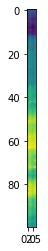

In [12]:
plt.imshow(dataset[0])

In [26]:
dataset[1259]

array([], shape=(0, 4), dtype=float64)

In [24]:
len(dataset)

1158